# CS116.P22 - ĐỒ ÁN

## DANH SÁCH THÀNH VIÊN

1. **Đinh Lê Bình An** - `23520004`
2. **Vũ Gia Khang** - `23520713`
3. **Bùi Nhật Anh Khôi** - `23520761`
4. **Nguyễn Khang Hy** - `23520662`

# Bài toán: **Product Recommendation System based on Consumer Behavior (Hệ thống đề xuất sản phẩm dựa trên hành vi mua sắm của khách hàng)**

## Tên bộ dữ liệu:  [Consumer Behavior and Shopping Habits Dataset](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset)

## Download dataset from Kaggle

In [1]:
import os
import kaggle

root_dir = os.getcwd()
print(f"Root_dir path: [ {root_dir} ]")
data_dir = os.path.join(root_dir, "Data")
print(f"Data_dir path: [ {data_dir} ]")


Root_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp ]
Data_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data ]


In [2]:
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"=> Created [data_dir] successfully!")
    
    kaggle.api.authenticate()  # Xác thực bằng API key từ tệp kaggle.json
    dataset_name = "zeesolver/consumer-behavior-and-shopping-habits-dataset" # Đổi tên biến dataset_name theo dataset mong muốn:
    kaggle.api.dataset_download_files(dataset_name, path=data_dir, unzip=True)
    print(f"Dataset đã được tải về tại: [ {data_dir} ]")
else:
    print(f"Dataset exists!")


=> Created [data_dir] successfully!
Dataset URL: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset
Dataset đã được tải về tại: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data ]


## Path to Dataset

In [3]:
dataset_path = os.path.join(data_dir, "shopping_behavior_updated.csv")
print(f"Dataset_path: [ {dataset_path} ]")


Dataset_path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data\shopping_behavior_updated.csv ]


## Path to Save Figures

In [4]:
figures_dir = os.path.join(root_dir, 'Figures')
print(f"Figures_dir path: [ {figures_dir} ]")

if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print(f"Created Figures dir successfully!")
else:
    print(f"Figures dir exists!")


Figures_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures ]
Created Figures dir successfully!


# Bước 1: Đăng ký đề tài


## [1.1] - Lý do chọn dữ liệu

Bộ dữ liệu này rất phù hợp để phân tích hành vi mua sắm của khách hàng:
- Cung cấp một cái nhìn toàn diện về các yếu tố ảnh hưởng đến quyết định mua hàng như độ tuổi, giới tính, sở thích sản phẩm, phương thức thanh toán, hình thức giao hàng và tần suất mua sắm.
- Thông qua việc khai thác các thông tin như sản phẩm đã mua, mức chi tiêu, đánh giá của khách hàng, và lịch sử mua hàng trước đó, chúng ta có thể hiểu rõ hơn về xu hướng tiêu dùng, mức độ trung thành và khả năng quay lại của từng nhóm khách hàng.

**Những hiểu biết này sẽ hỗ trợ mạnh mẽ cho việc xây dựng hệ thống gợi ý sản phẩm cá nhân hóa, giúp các doanh nghiệp thương mại điện tử tối ưu hóa chiến lược tiếp thị, nâng cao trải nghiệm người dùng, và phát triển các chương trình giữ chân khách hàng một cách hiệu quả hơn**.



## [1.2] - Các thông tin về bộ dữ liệu

- Số dòng: 3900 dòng
- Số cột: 18 cột
- Loại bài toán: Đề xuất sản phẩm dựa trên thói quen mua đồ của khách hàng

- **Customer ID**: Là khoá chính định danh từng khách hàng, hỗ trợ theo dõi hành vi theo thời gian và phân tích mức độ trung thành.

- **Age**: Dữ liệu định lượng giúp phân khúc khách hàng theo độ tuổi, từ đó cá nhân hoá nội dung tiếp thị.

- **Gender**: Biến phân loại giúp xác định sự khác biệt trong hành vi tiêu dùng giữa nam và nữ.

- **Item Purchased**: Là mục tiêu chính trong bài toán gợi ý; thể hiện rõ sản phẩm mà khách hàng quan tâm.

- **Category**: Cho phép nhóm các sản phẩm cùng loại để phân tích xu hướng theo danh mục (ví dụ: thời trang, điện tử...).

- **Purchase Amount (USD)**: Dữ liệu định lượng cho biết sức chi tiêu, giúp đánh giá khách hàng có giá trị cao (high-value customers).

- **Location**: Cho phép phân tích sự khác biệt hành vi mua sắm theo vùng miền hoặc quốc gia.

- **Size**: Áp dụng cho các sản phẩm thời trang , hỗ trợ kiểm tra mức độ phù hợp kho hàng theo kích cỡ phổ biến.

- **Color**: Phân tích thị hiếu về màu sắc để cải thiện thiết kế và quản lý tồn kho hiệu quả hơn.

- **Season**: Hữu ích trong việc dự đoán nhu cầu theo mùa và lập kế hoạch nhập hàng.

- **Review Rating**: Đo lường sự hài lòng của khách hàng, có thể dùng làm chỉ số đầu vào cho mô hình gợi ý chất lượng.

- **Subscription Status**: Phân biệt giữa khách hàng thường và khách hàng trung thành (đăng ký dịch vụ định kỳ).

- **Shipping Type**: Phân tích lựa chọn giao hàng để tối ưu thời gian & chi phí vận chuyển.

- **Discount Applied**: Xác định mức độ nhạy cảm với giá và tác động của giảm giá đến hành vi mua hàng.

- **Promo Code Used**: Cho biết hiệu quả của các chiến dịch marketing qua mã khuyến mãi.

- **Previous Purchases**: Là một chỉ số quan trọng để xác định khách hàng trung thành và mô hình dự đoán mua lại.

- **Payment Method**: Giúp doanh nghiệp xác định phương thức thanh toán phổ biến và cải thiện cổng thanh toán.

- **Frequency of Purchases**: Đánh giá tần suất mua hàng, là chỉ số then chốt trong mô hình dự đoán giá trị vòng đời khách hàng (CLV).

## [1.3] - Một số nhận xét ban đầu về bộ dữ liệu

● **Thông tin dữ liệu**: Dataset bao gồm các trường quan trọng phản ánh hành vi tiêu dùng như: `thông tin khách hàng` (Customer ID, Age, Gender, Location), `thông tin sản phẩm` (Item Purchased, Category, Size, Color, Season), `chi tiêu và đánh giá` (Purchase Amount, Review Rating), cũng như `thói quen và hình thức mua sắm` (Previous Purchases, Frequency of Purchases, Subscription Status, Payment Method, Shipping Type, Promo Code Used, Discount Applied).

● **Tình trạng dữ liệu**: Bộ dữ liệu được mô tả khá đầy đủ, đa dạng và có tính ứng dụng cao. Các trường thông tin có giá trị rõ ràng, thuận lợi cho việc xử lý và phân tích dữ liệu. Chưa có dấu hiệu rõ ràng về thiếu hụt dữ liệu ở mức nghiêm trọng trong phần mô tả.

● **Định dạng dữ liệu**: Kết hợp giữa nhiều kiểu dữ liệu như số nguyên (int64), số thực (float64) và chuỗi (object), phù hợp để thực hiện các phân tích mô tả, trích xuất insight và huấn luyện các mô hình học máy.

● **Phân tích khách hàng**: Dữ liệu cho phép phân khúc người dùng theo nhân khẩu **học, hành vi chi tiêu, xu hướng sử dụng mã khuyến mãi, lựa chọn phương thức thanh toán hay hình thức vận chuyển. Đây là cơ sở vững chắc để xây dựng hệ thống cá nhân hóa và đề xuất thông minh.

# Bước 2: Phân tích dữ liệu - EDA

## Path to Save EDA Figures

In [5]:
EDA_dir = os.path.join(figures_dir, "EDA")
print(f"EDA_dir path: [ {EDA_dir} ]")

if not os.path.exists(EDA_dir):
    os.makedirs(EDA_dir)
    print(f"Created EDA dir successfully!")
else:
    print(f"EDA dir exists!")


EDA_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA ]
Created EDA dir successfully!


## [2.1] - Import thư viện

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [7]:
df = pd.read_csv(dataset_path)
print(f"Read [ {dataset_path} ] successfully!")


Read [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data\shopping_behavior_updated.csv ] successfully!


## [2.2] - Kiểm tra dữ liệu ban đầu

### 2.2.1) 5 dòng đầu dữ liệu

In [8]:
print("5 dòng đầu tiên của dữ liệu:")
display(df.head())


5 dòng đầu tiên của dữ liệu:


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

### 2.2.2) Thông tin tổng quan vê DataFrame

In [9]:
print("\nThông tin tổng quan về DataFrame:")
df.info()



Thông tin tổng quan về DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo

### 2.2.3) Kích thước DataFrame

In [10]:
print(f"Kích thước DataFrame: {df.shape}")


Kích thước DataFrame: (3900, 18)


### 2.2.4) Thống kê các đặc trưng trong DataFrame

In [11]:
print("Thống kê mô tả cho các cột số:")
display(df.describe())


Thống kê mô tả cho các cột số:


Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

### 2.2.5) Thống kê các đặc trưng phân loại trong DataFrame

In [12]:
print("Thống kê mô tả cho các cột phân loại:")
display(df.describe(include='object'))


Thống kê mô tả cho các cột phân loại:


Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases  
count            3900                   3900  
unique              6                      7  
top            PayPal         Every 3 Months  
freq              677                    584

## [2.3] - Kiểm tra giá trị bi thiếu (NULL)

In [13]:
print("Kiểm tra số lượng giá trị thiếu (NULL) cho mỗi cột:")
missing_values = df.isnull().sum()
missing_info = pd.DataFrame({
    'Số lượng thiếu': missing_values,
})
display(missing_info)


Kiểm tra số lượng giá trị thiếu (NULL) cho mỗi cột:


Số lượng thiếu
Customer ID                          0
Age                                  0
Gender                               0
Item Purchased                       0
Category                             0
Purchase Amount (USD)                0
Location                             0
Size                                 0
Color                                0
Season                               0
Review Rating                        0
Subscription Status                  0
Shipping Type                        0
Discount Applied                     0
Promo Code Used                      0
Previous Purchases                   0
Payment Method                       0
Frequency of Purchases               0

## [2.4] - Kiểm tra dữ liệu trùng lặp

In [14]:
print(f"Các dữ liệu bị trùng lặp: \n{df.duplicated()}")
print(f"\nSố lượng bị trùng lặp: {df.duplicated().sum()}")


Các dữ liệu bị trùng lặp: 
0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

Số lượng bị trùng lặp: 0


## [2.5] - **Nhận xét ban đầu**

- **Kích thước:** Tập dữ liệu gồm 3900 hàng và 19 cột.

- **Kiểu dữ liệu:** Các cột có vẻ có kiểu dữ liệu phù hợp (số nguyên, số thực, object/chuỗi). Cột `Customer ID` là định danh.

- **Giá trị thiếu:** Kiểm tra bằng `df.isnull().sum()` xác nhận **không có giá trị thiếu (NULL)** nào trong toàn bộ dữ liệu. Điều này rất tốt cho việc phân tích.

- **Gia trị trùng lặp**: Kiểm tra bằng `df.duplicated().sum()` xác nhận **không có giá trị trùng lặp** nào trong toàn bộ dữ liệu. Điều này rất tốt cho việc phân tích.


- **Nhóm thông tin về dữ liệu**
  + Thông tin khách hàng: `Customer ID`, `Gender`, `Age`, `Location`, `Subscripttion status`
  + Thông tin sản phẩm và giao dịch: `Item Purchased`, `Category`, `Size`, `Color`, `Season`, `Purchase Amount (USD)`, `Discount Applied`, `Promo Code Used`
  + Thông tin về hành vi mua sắm: `Frequency of Purchases`, `Previous Purchases`, `Review Rating`, `Shipping type`, `Payment Method`

- **Thống kê số:**
  - `Age`: Tuổi từ 18 đến 70, trung bình khoảng 44. Tuổi phân bố khá rộng.
  - `Purchase Amount (USD)`: Số tiền mua hàng từ 20 đến 100 USD, trung bình khoảng 60 USD. Phân bố đều.
  - `Review Rating`: Đánh giá từ 2.5 đến 5.0, trung bình 3.7. Đa số đánh giá ở mức khá cao.
  - `Previous Purchases`: Số lượt mua trước đó từ 1 đến 50, trung bình 25. Phân bố đều.

- **Thống kê phân loại:**
  - Có nhiều cột phân loại cần khám phá chi tiết hơn (ví dụ: `Gender`, `Item Purchased`, `Category`, `Location`, `Payment Method`).
  - `Gender`: Có 2 giá trị duy nhất, `Male` là phổ biến nhất cho thấy nam giới có xu hướng mua sắm nhiều hơn nữ giới.
  - `Item Purchased`: Có 25 mặt hàng khác nhau, `Blouse` phổ biến nhất
  - `Category`: Có 4 danh mục, `Clothing` phổ biến nhất.
  - `Location`: Có 50 địa điểm khác nhau, `Montana` phổ biến nhất.
  - `Size`: có 4 loại, `M` là phổ biến nhất.
  - `Color`: Có 7 màu sắc khác nhau, `Olive` là phổ biến nhất.
  - `Season`: Có 4 mùa, `Spring` phổ biến nhất vì đây là mùa xuân mát mẻ và dễ chịu cho việc mua sắm dẫn đến người dân chi tiêu nhiều hơn cho các sản phẩm về quần áo vì dụ như áo blouse, đặc biệt là thành phố `Montana` nơi có khí hậu lạnh hơn.
  - `Payment Method`: Có 6 phương thức, `Credit Card` là phương thức thường được dùng để thanh toán vì độ tiện lợi và nhanh chóng nhưng phương thích ưu thích của khách hàng lại là `PayPal` vì tính bảo mật và an toàn hơn, đặc biệt là khi mua sắm trực tuyến.
  - `Shipping type`: có 6 loại, `Free Shipping` là lựa chọn ưu tiên của khách hàng với mong muốn tiết kiệm chi tiết cho phí vận chuyển và tập trung số tiền vào sản phẩm
  - `Frequency of Purchases`: Có 7 tần suất mua hàng, `Every 3 Months` là tần suất mua hàng phố biến nhất vì đây là thời điểm mà người tiêu dùng thường có nhu cầu mua sắm nhiều hơn, đặc biệt là vào mùa xuân và mùa hè.


## [2.6] - Phân tích đơn biến (Univariate Analysis)

### Path to save Univariate Figures

In [15]:
univariate_dir = os.path.join(EDA_dir, "Univariate")
print(f"Univariate_dir path: [ {univariate_dir} ]")

if not os.path.exists(univariate_dir):
    os.makedirs(univariate_dir)
    print(f"Created Univariate dir successfully!")
else:
    print(f"Univariate dir exists!")


Univariate_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Univariate ]
Created Univariate dir successfully!


### 2.6.1) Phân tích biến số (Numerical Variales)

#### Path to save Numerical Figures

In [16]:
numerical_dir = os.path.join(univariate_dir, "Numerical")
print(f"Numerical_dir path: [ {numerical_dir} ]")

if not os.path.exists(numerical_dir):
    os.makedirs(numerical_dir)
    print(f"Created Numerical dir successfully!")
else:
    print(f"Numerical dir is exists!")


Numerical_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Univariate\Numerical ]
Created Numerical dir successfully!


#### **Age**

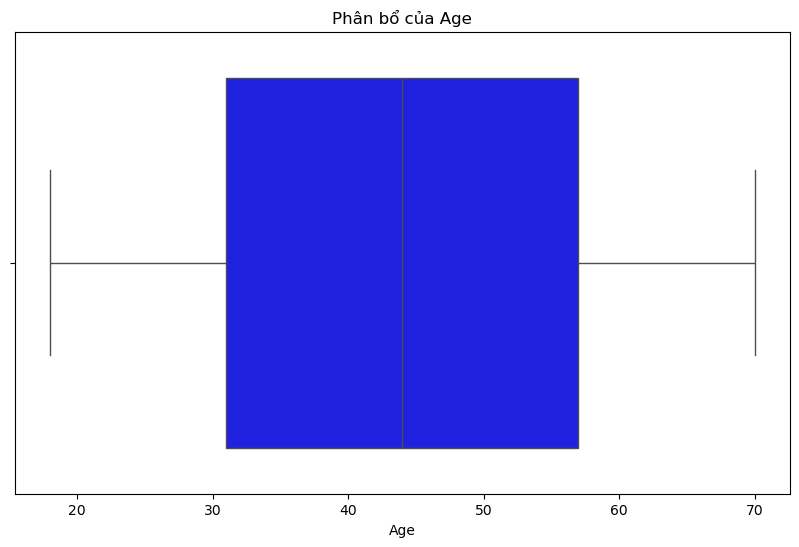

In [17]:
col = 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=col, color='blue')
plt.title('Phân bổ của Age')
plt.xlabel('Age')
save_path = os.path.join(numerical_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()


#### **Purchase Amount (USD)**

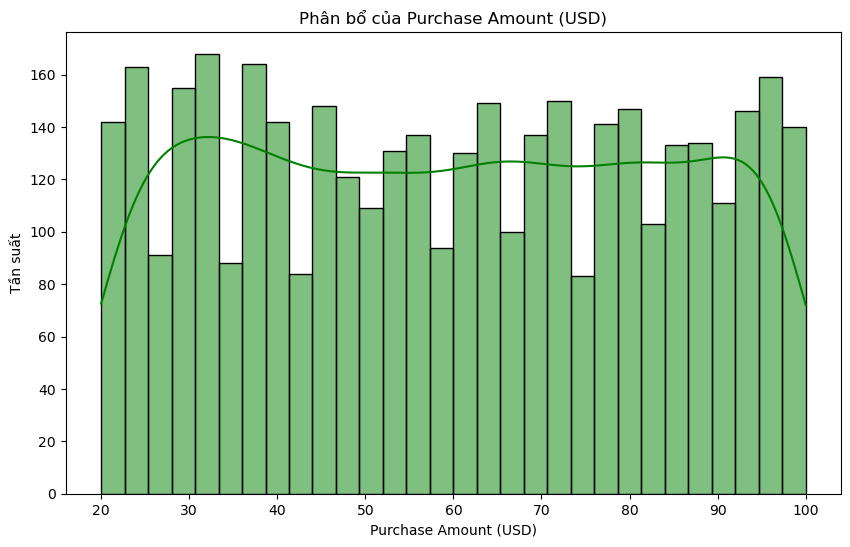

In [18]:
col = 'Purchase Amount (USD)'
plt.figure(figsize=(10, 6))
sns.histplot(df, x=col, bins=30, kde=True, color='green')
plt.title('Phân bổ của Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Tần suất')
save_path = os.path.join(numerical_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()


#### **Review Rating**

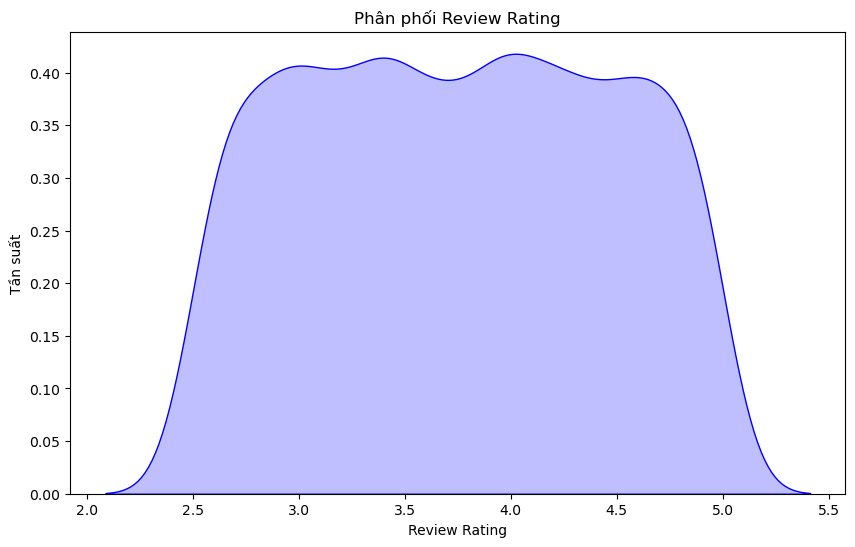

In [19]:
col = 'Review Rating'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=col, fill=True, color='blue')
plt.title("Phân phối Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Tần suất")
save_path = os.path.join(numerical_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()


#### **Previous Purchases**

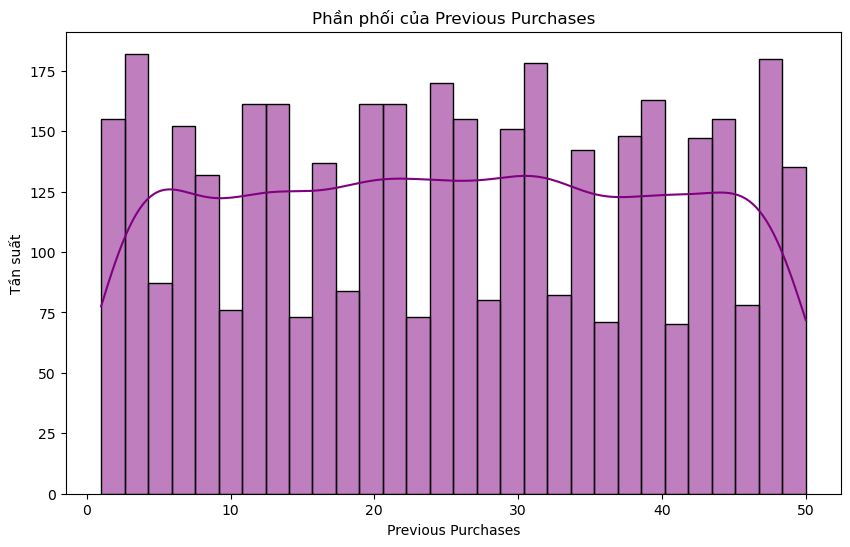

In [20]:
col = 'Previous Purchases'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=col, bins=30, kde=True, color='purple')
plt.title("Phần phối của Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Tần suất")
save_path = os.path.join(numerical_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()


#### **Nhận xét về phân tích đơn biến số**

- **Age** phân bố đều trong khoảng 18-70, không có ngoại lai đáng kể, với trung vị khoảng 45 tuổi.
- **Purchase Amount** tập trung quanh 40-80 USD và phân bố đối xứng, cho thấy phân khúc giá trung bình của các sản phẩm khá ổn định.
- **Review Rating** có phân phối lệch trái với đa số đánh giá ở mức 3.5-4.5, điều này phổ biến trong dữ liệu đánh giá và gợi ý hệ thống recommendation cần xử lý sự thiên lệch này.
- **Previous Purchases** phân bố đều ở mức 10-40 lần, cho thấy dữ liệu có sự cân bằng giữa khách hàng mới và cũ.

=> **Những đặc điểm phân phối này sẽ ảnh hưởng đến cách thiết kế hệ thống recommendation, đặc biệt là việc chuẩn hóa và xử lý outliers**.

### 2.6.2) Phân tích biến phân loai (Categorical Variables)

#### Path to save Category Figures

In [21]:
category_dir = os.path.join(univariate_dir, "Category")
print(f"Category_dir path: [ {category_dir} ]")

if not os.path.exists(category_dir):
    os.makedirs(category_dir)
    print(f"Created Category dir successfully!")
else:
    print(f"Category dir is exists!")


Category_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Univariate\Category ]
Created Category dir successfully!


#### **Columns categorical variables to plot**

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
cols_to_plot = ['Gender', 'Category', 'Item Purchased', 'Size', 'Season', 'Location',
                    'Subscription Status', 'Payment Method', 'Shipping Type',
                    'Discount Applied', 'Promo Code Used', 'Frequency of Purchases']
print(f"Columns categorical variables to plot:")
for col in cols_to_plot:
    print(f"- [{col}]")


Columns categorical variables to plot:
- [Gender]
- [Category]
- [Item Purchased]
- [Size]
- [Season]
- [Location]
- [Subscription Status]
- [Payment Method]
- [Shipping Type]
- [Discount Applied]
- [Promo Code Used]
- [Frequency of Purchases]


#### **Gender**

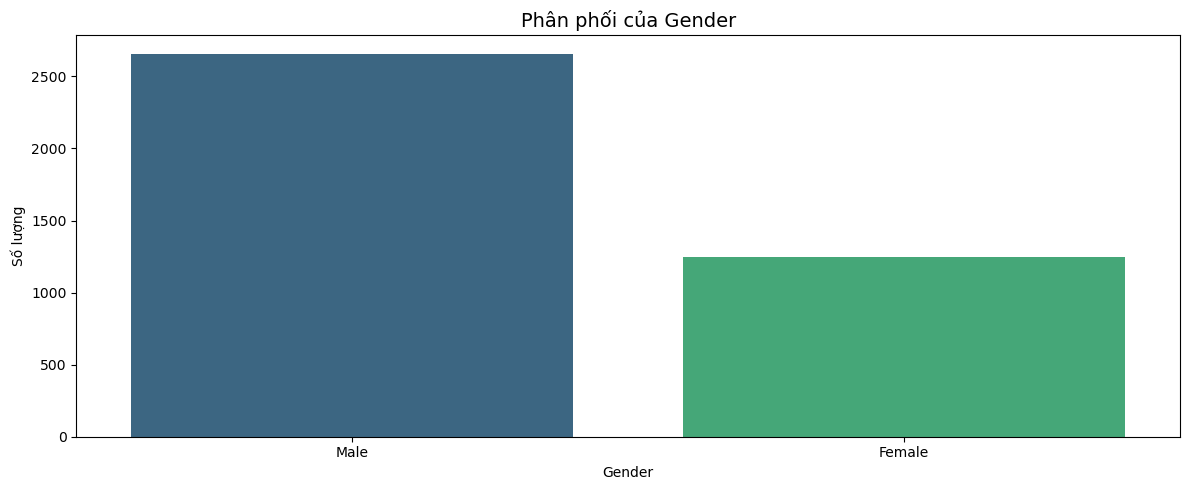

Tần suất của [Gender]:
------------------------------------------------------------
Gender
Male      2652
Female    1248
Name: count, dtype: int64
------------------------------------------------------------


In [23]:
col = "Gender"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Category**

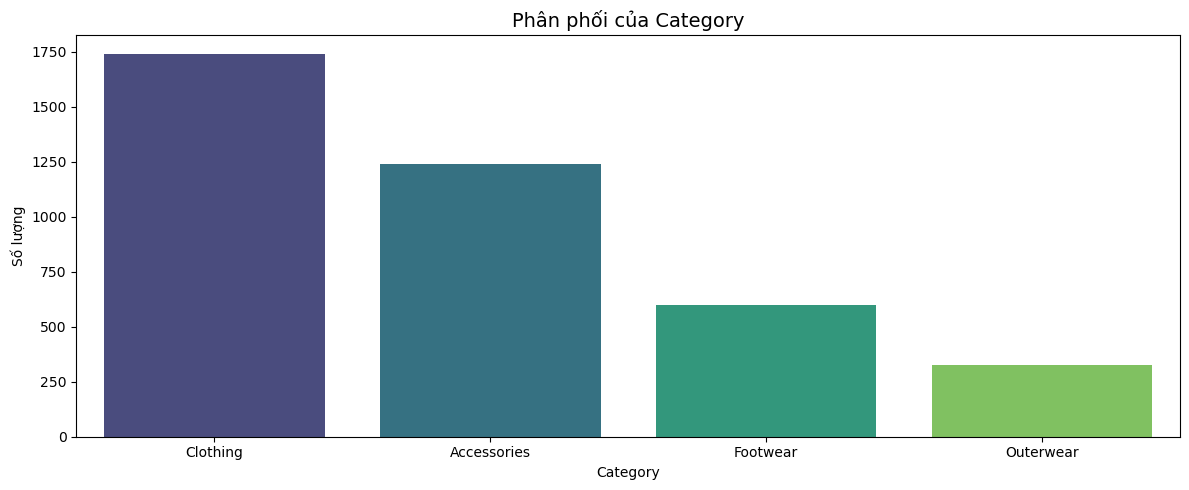

Tần suất của [Category]:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
------------------------------------------------------------


In [24]:
col = "Category"
order = df[col].value_counts().index
value_counts = df[col].value_counts()


plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()
save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print(value_counts)
print("-" * 60)


#### **Item Purchased**

* Hiển thị Top 15 loại phổ biến nhất (Tổng số loại: 25)


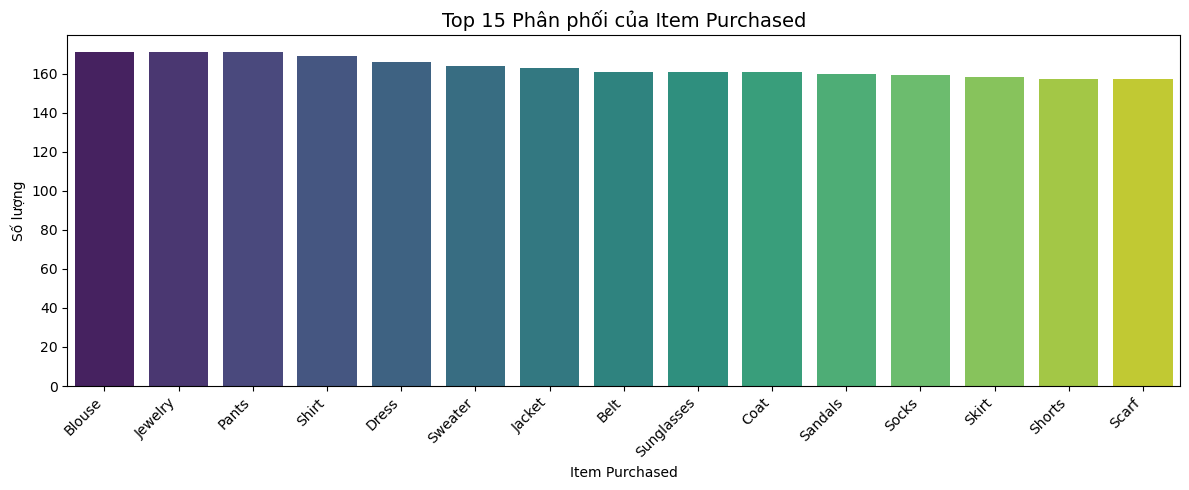

Tần suất của [Item Purchased]:
------------------------------------------------------------
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Name: count, dtype: int64
------------------------------------------------------------


In [25]:
col = "Item Purchased"
top_n = 15
n_unique = df[col].nunique()
order = df[col].value_counts().index
value_counts = df[col].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=value_counts.index,
    legend=False,
)

plt.title(f"Top {top_n} Phân phối của {col}", fontsize=14)
print(f"* Hiển thị Top {top_n} loại phổ biến nhất (Tổng số loại: {n_unique})")

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Size**

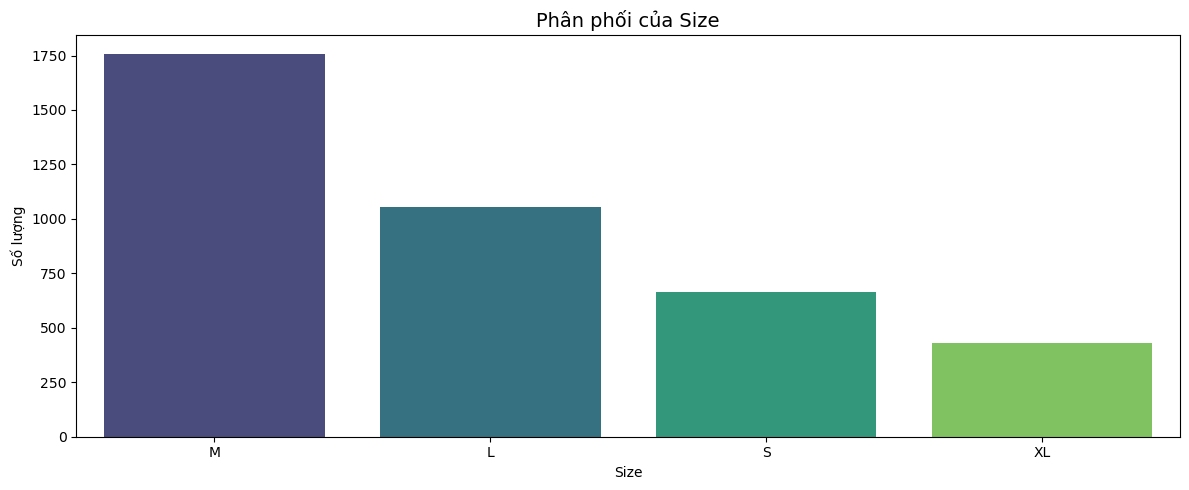

Tần suất của [Size]:
------------------------------------------------------------
Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64
------------------------------------------------------------


In [26]:
col = "Size"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Season**

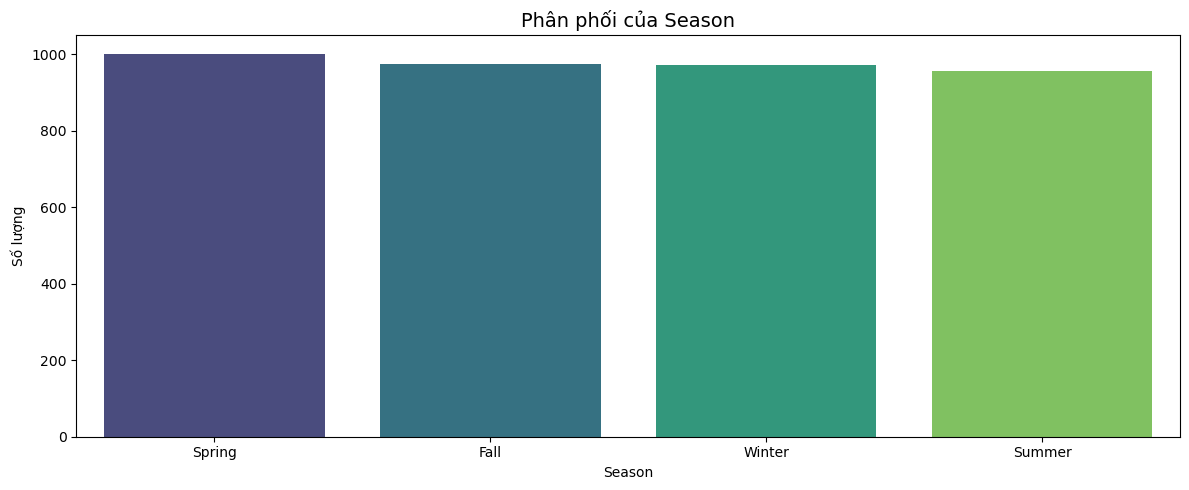

Tần suất của [Season]:
------------------------------------------------------------
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64
------------------------------------------------------------


In [27]:
col = "Season"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Location**

* Hiển thị Top 15 loại phổ biến nhất (Tổng số loại: 50)


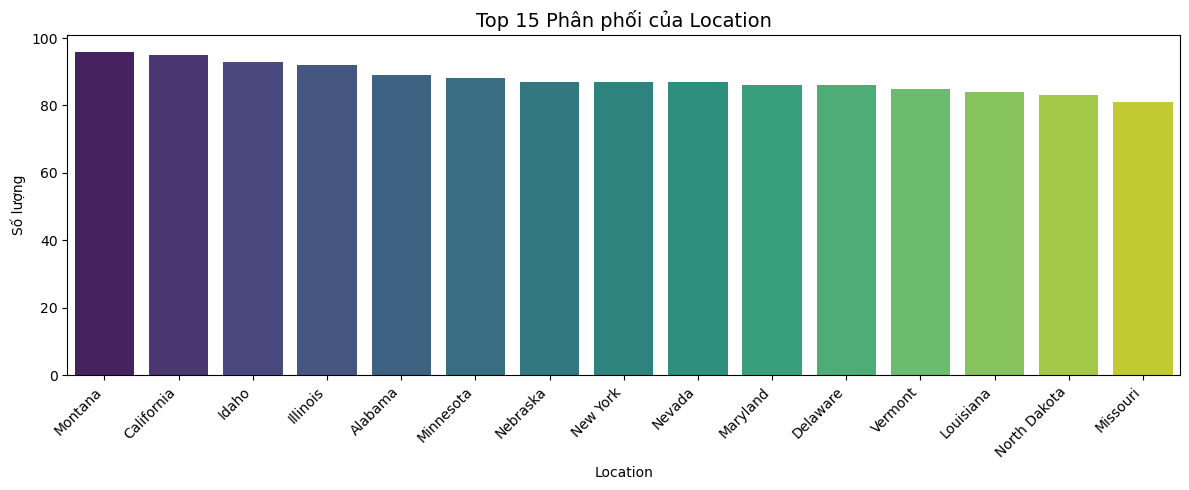

Tần suất của [Location]:
------------------------------------------------------------
Location
Montana         96
California      95
Idaho           93
Illinois        92
Alabama         89
Minnesota       88
Nebraska        87
New York        87
Nevada          87
Maryland        86
Delaware        86
Vermont         85
Louisiana       84
North Dakota    83
Missouri        81
Name: count, dtype: int64
------------------------------------------------------------


In [28]:
col = "Location"
top_n = 15
n_unique = df[col].nunique()
order = df[col].value_counts().index
value_counts = df[col].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=value_counts.index,
    legend=False,
)

plt.title(f"Top {top_n} Phân phối của {col}", fontsize=14)
print(f"* Hiển thị Top {top_n} loại phổ biến nhất (Tổng số loại: {n_unique})")

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Subscription Status**

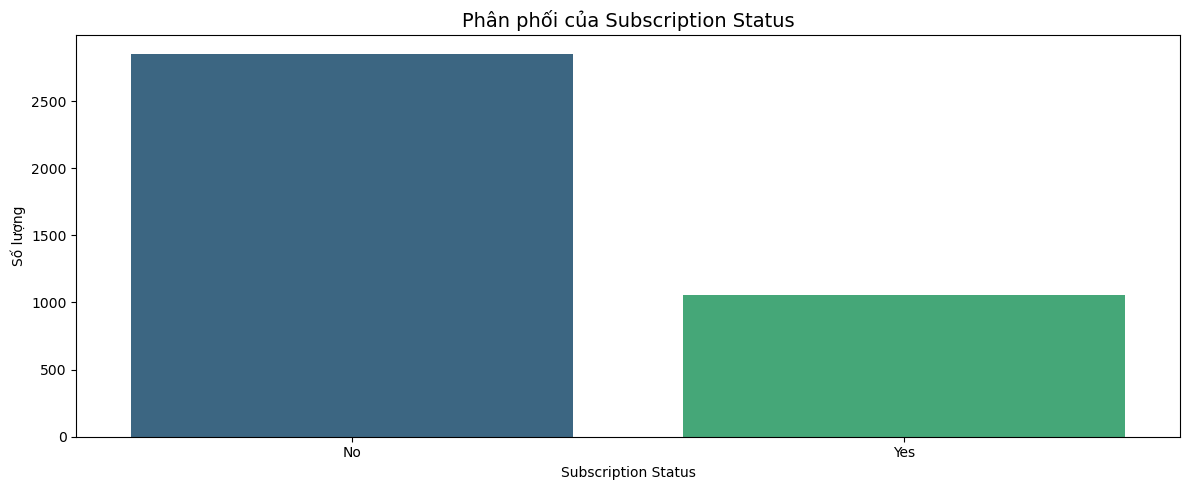

Tần suất của [Subscription Status]:
------------------------------------------------------------
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64
------------------------------------------------------------


In [29]:
col = "Subscription Status"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Payment Method**

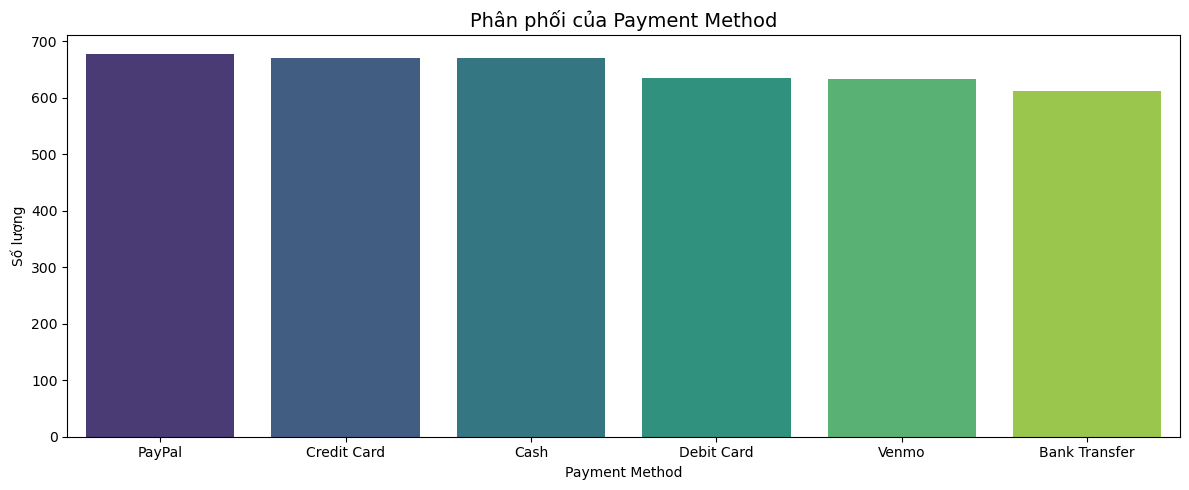

Tần suất của [Payment Method]:
------------------------------------------------------------
Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64
------------------------------------------------------------


In [30]:
col = "Payment Method"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Shipping Type**

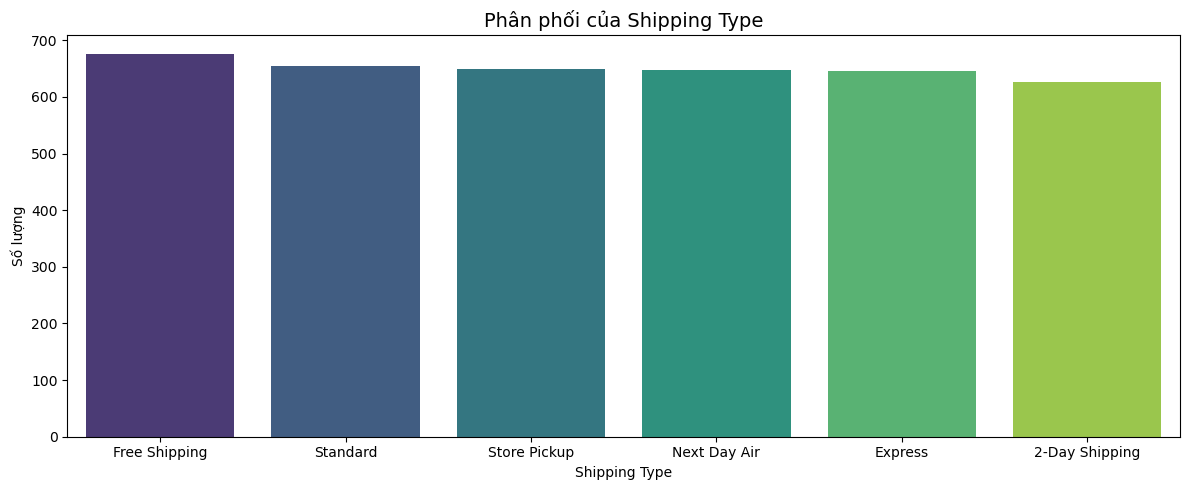

Tần suất của [Shipping Type]:
------------------------------------------------------------
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64
------------------------------------------------------------


In [31]:
col = "Shipping Type"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Discount Applied**

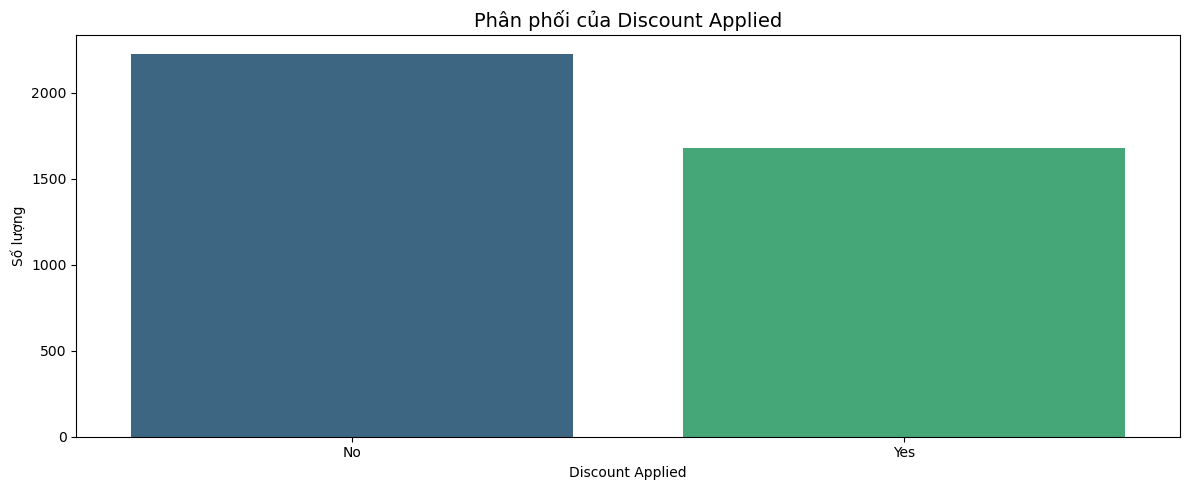

Tần suất của [Discount Applied]:
------------------------------------------------------------
Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64
------------------------------------------------------------


In [32]:
col = "Discount Applied"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Promo Code Used**

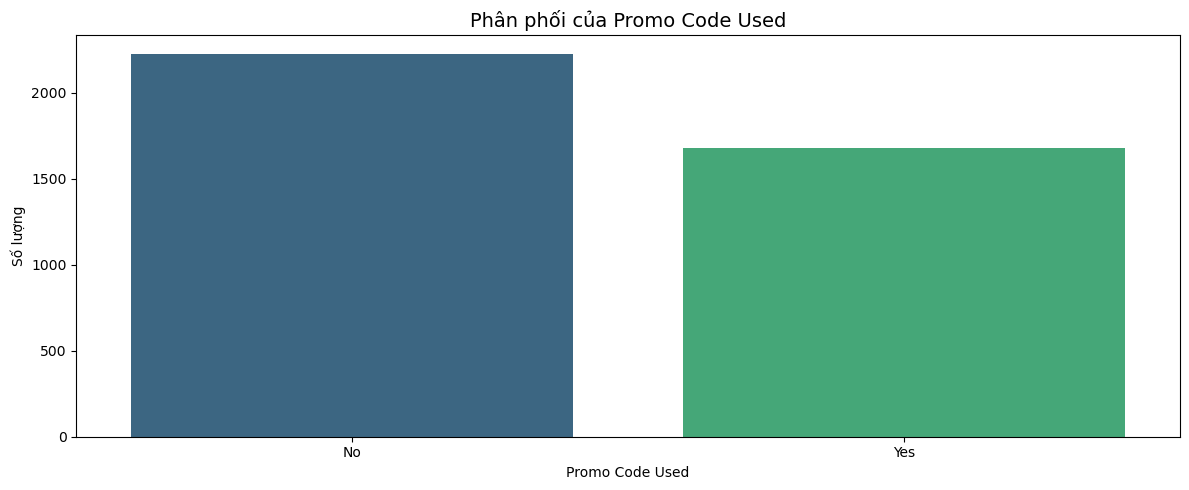

Tần suất của [Promo Code Used]:
------------------------------------------------------------
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64
------------------------------------------------------------


In [33]:
col = "Promo Code Used"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Frequency of Purchases**

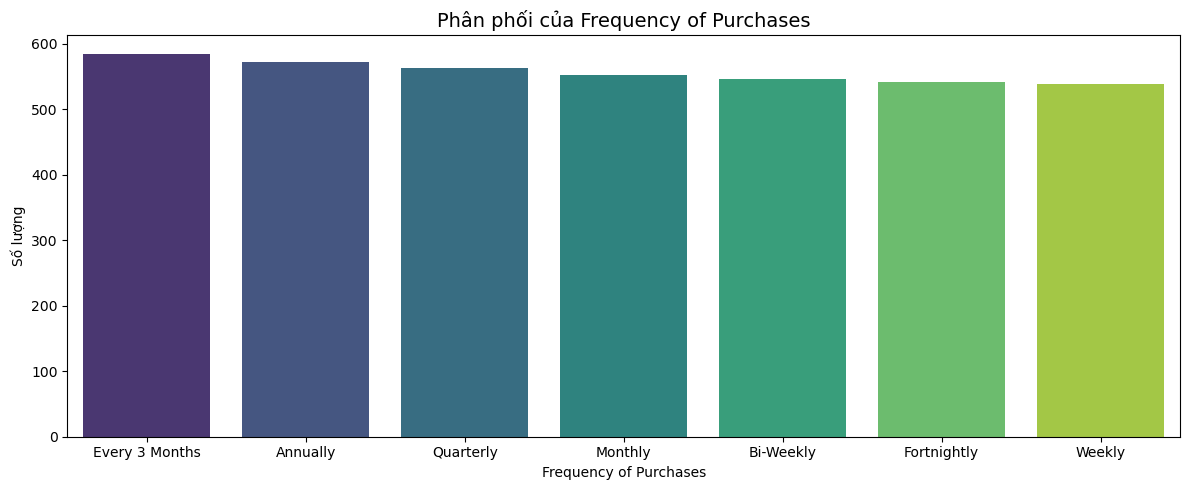

Tần suất của [Frequency of Purchases]:
------------------------------------------------------------
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64
------------------------------------------------------------


In [34]:
col = "Frequency of Purchases"
order = df[col].value_counts().index
value_counts = df[col].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(
    x=value_counts.index,
    y=value_counts.values,
    hue=value_counts.index,
    palette="viridis",
    order=order,
    legend=False,
)
plt.title(f"Phân phối của {col}", fontsize=14)

plt.xlabel(col)
plt.ylabel("Số lượng")
plt.tight_layout()

save_path = os.path.join(category_dir, f'{col}_plot.png')
plt.savefig(save_path)
plt.show()

print(f"Tần suất của [{col}]:")
print("-" * 60)
print(value_counts)
print("-" * 60)


#### **Nhận xét về phân tích đơn biến phân loại:**


- `Gender`: **Nam (Male) chiếm đa số** (khoảng 68%), gấp đôi Nữ (Female). Đây là một điểm mất cân bằng cần lưu ý.
- `Category` (Nhãn tiềm năng): **Clothing (Quần áo)** là danh mục phổ biến nhất, chiếm gần một nửa số giao dịch. Tiếp theo là Accessories (Phụ kiện), Footwear (Giày dép) và Outerwear (Áo khoác ngoài). Phân phối không cân bằng.
- `Item Purchased` (Nhãn tiềm năng): Có 25 loại mặt hàng. **Blouse, Jeans, Pants, Shirt, Dress** là những mặt hàng được mua nhiều nhất. Phân phối khá đa dạng, không quá tập trung vào một vài mặt hàng.
- `Location`, `Color`: Có quá nhiều giá trị duy nhất (50 và 25), biểu đồ đầy đủ sẽ khó đọc. Montana là địa điểm phổ biến nhất, Olive/Yellow/Silver/Teal/Green là các màu phổ biến.
- `Size`: Size **M (Medium)** là phổ biến nhất, chiếm hơn 40%. Tiếp theo là L (Large), S (Small), và XL (Extra Large).
- `Season`: Các mùa có số lượng mua hàng **khá cân bằng**, với Spring (Xuân) và Fall (Thu) nhỉnh hơn một chút so với Winter (Đông) và Summer (Hè).
- `Subscription Status`: Đa số khách hàng **không đăng ký (No)**, chiếm khoảng 73%.
- `Payment Method`, `Preferred Payment Method`: **PayPal và Credit Card** là hai phương thức thanh toán/ưu tiên thống trị. Các phương thức khác ít phổ biến hơn. Cần xem xét mối quan hệ giữa hai cột này.
- `Shipping Type`: **Free Shipping (Miễn phí vận chuyển)** là lựa chọn phổ biến nhất, tiếp theo là Standard (Tiêu chuẩn) và Store Pickup (Nhận tại cửa hàng). Các loại hình vận chuyển nhanh ít được sử dụng hơn.
- `Discount Applied`, `Promo Code Used`: Phần lớn các giao dịch **có áp dụng giảm giá/mã khuyến mãi (Yes)**, chiếm khoảng 57%. Hai cột này có vẻ liên quan chặt chẽ.
- `Frequency of Purchases`: Tần suất mua hàng **phân bố khá đều** giữa các lựa chọn (Weekly, Fortnightly, Monthly, Quarterly, Bi-Weekly, Annually, Every 3 Months), mỗi loại chiếm khoảng 13-15%.

## [2.7] - Phân tích hai biến (Bivariate Analysis)

### Path to save Bivariate Figures

In [35]:
bivariate_dir = os.path.join(EDA_dir, "Bivariate")
print(f"Bivariate_dir path: [ {bivariate_dir} ]")

if not os.path.exists(bivariate_dir):
    os.makedirs(bivariate_dir)
    print(f"Created Bivariate dir successfully!")
else:
    print(f"Bivariate dir exists!")


Bivariate_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Bivariate ]
Created Bivariate dir successfully!


### 2.7.1) Mối quan hệ giữa các biến số (Feature-Feature: Numerical)

#### Path to save Numerical-Numerical Figures

In [36]:
numerical_numerical_dir = os.path.join(bivariate_dir, "Numerical_Numerical")
print(f"Numerical_Numerical_dir path: [ {numerical_numerical_dir} ]")

if not os.path.exists(numerical_numerical_dir):
    os.makedirs(numerical_numerical_dir)
    print(f"Created Numerical Numerical dir successfully!")
else:
    print(f"Numerical Numerical dir exists!")


Numerical_Numerical_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Bivariate\Numerical_Numerical ]
Created Numerical Numerical dir successfully!


#### Tương quan giữa các biến số **(Feature-Feature: Numerical)**

In [37]:
numerical_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_columns].corr()

print("Ma trận tương quan Pearson:")
display(correlation_matrix)


Ma trận tương quan Pearson:


Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000

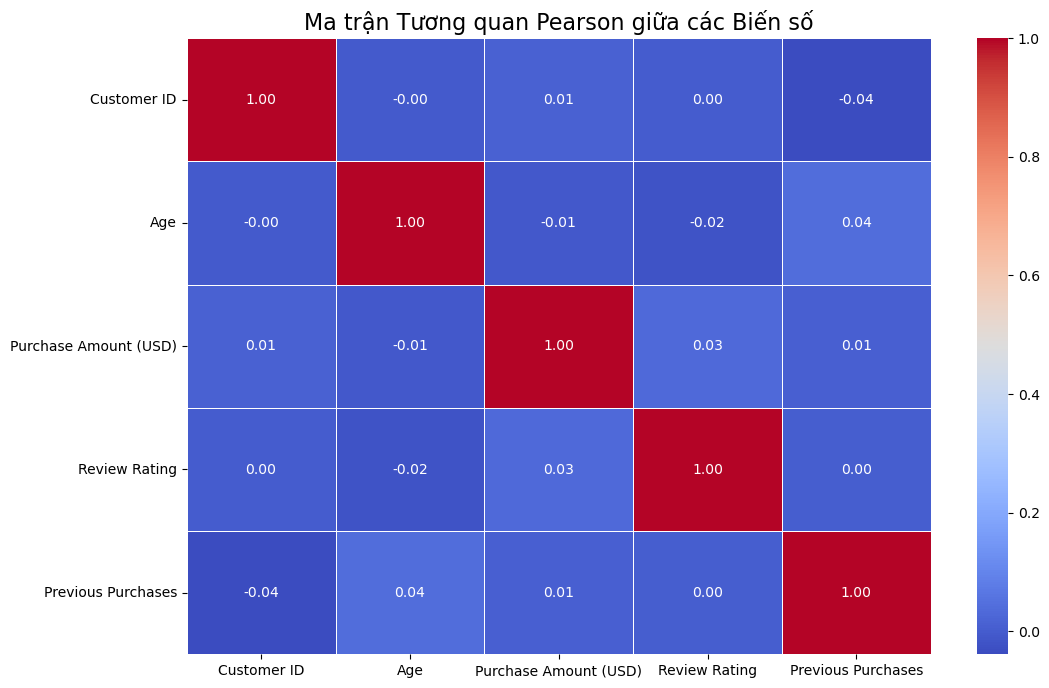

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận Tương quan Pearson giữa các Biến số', fontsize=16)

save_path = os.path.join(numerical_numerical_dir, f'numerical_numerical_pearson_correlation_matrix_plot.png')
plt.savefig(save_path)
plt.show()


#### **Nhận xét ma trận tương quan Numerical vs Numerical**


- Các hệ số tương quan Pearson giữa các cặp biến số (`Age`, `Purchase Amount (USD)`, `Review Rating`, `Previous Purchases`) đều **rất gần 0** (giá trị tuyệt đối < 0.04).
- Điều này cho thấy **hầu như không có mối quan hệ tuyến tính** nào đáng kể giữa các biến số này.
- Ví dụ: Tuổi của khách hàng không liên quan tuyến tính đến số tiền họ chi tiêu, đánh giá của họ, hay số lần mua hàng trước đó.
- Các biến số này cung cấp thông tin tương đối độc lập với nhau.

### 2.7.2) Mối quan hệ giữa biến số và biến phân loại (Feature-Feature/Label: Numerical vs Categorical)

#### Path to save Numerical-Categorical Figures

In [39]:
numerical_categorical_dir = os.path.join(bivariate_dir, "Numerical_Categorical")
print(f"numerical_categorical_dir path: [ {numerical_categorical_dir} ]")

if not os.path.exists(numerical_categorical_dir):
    os.makedirs(numerical_categorical_dir)
    print(f"Created Numerical Categorical dir successfully!")
else:
    print(f"Numerical Categorical dir exists!")


numerical_categorical_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Bivariate\Numerical_Categorical ]
Created Numerical Categorical dir successfully!


#### **Numerical variables**

In [40]:
num_vars = ['Purchase Amount (USD)', 'Review Rating', 'Age']
print(f"Danh sách biến số (num_vars):")
for i, num in enumerate(num_vars):
    print(f"{i + 1}. [{num}]")


Danh sách biến số (num_vars):
1. [Purchase Amount (USD)]
2. [Review Rating]
3. [Age]


#### **Categorical variables**

In [41]:
cat_vars = ['Category', 'Gender', 'Subscription Status', 'Season', 'Frequency of Purchases']
print(f"Danh sách biến phân loại (cat_vars):")
for i, cat in enumerate(cat_vars):
    print(f"{i + 1}. [{cat}]")


Danh sách biến phân loại (cat_vars):
1. [Category]
2. [Gender]
3. [Subscription Status]
4. [Season]
5. [Frequency of Purchases]


#### **Valid numerical-categorical pairs**

In [42]:
valid_pairs = []
for num_var in num_vars:
    for cat_var in cat_vars:
        # Kiểm tra điều kiện loại bỏ
        if (
            num_var == "Age" and cat_var not in ["Gender", "Frequency of Purchases"]
        ) or (
            num_var == "Review Rating"
            and cat_var not in ["Subscription Status", "Category"]
        ):
            continue
        # Kiểm tra số giá trị duy nhất
        n_unique_cat = df[cat_var].nunique()
        if n_unique_cat > 10:
            continue
        valid_pairs.append((num_var, cat_var))

print("\nCác cặp (num_var) và (cat_var) hợp lệ:")
for i, (num_var, cat_var) in enumerate(valid_pairs, 1):
    print(f"{i}. [{num_var} - {cat_var}]")
print(f"\nTổng số cặp hợp lệ: {len(valid_pairs)}")



Các cặp (num_var) và (cat_var) hợp lệ:
1. [Purchase Amount (USD) - Category]
2. [Purchase Amount (USD) - Gender]
3. [Purchase Amount (USD) - Subscription Status]
4. [Purchase Amount (USD) - Season]
5. [Purchase Amount (USD) - Frequency of Purchases]
6. [Review Rating - Category]
7. [Review Rating - Subscription Status]
8. [Age - Gender]
9. [Age - Frequency of Purchases]

Tổng số cặp hợp lệ: 9


#### **Purchase Amount (USD) - Category**

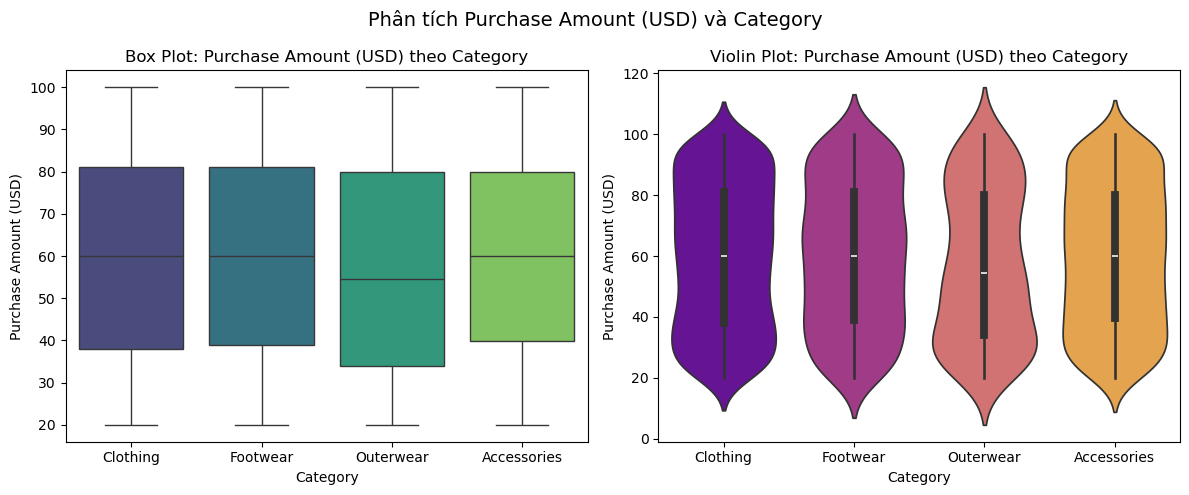

------------------------------------------------------------


In [43]:
num_var = 'Purchase Amount (USD)'
cat_var = 'Category'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Purchase Amount (USD) - Gender**

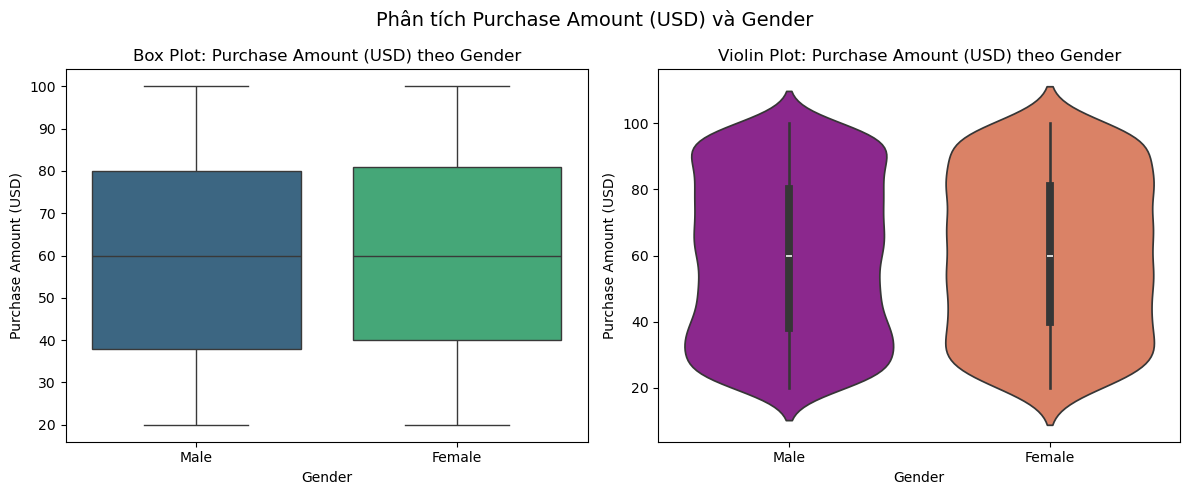

------------------------------------------------------------


In [44]:
num_var = 'Purchase Amount (USD)'
cat_var = 'Gender'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Purchase Amount (USD) - Subscription Status**

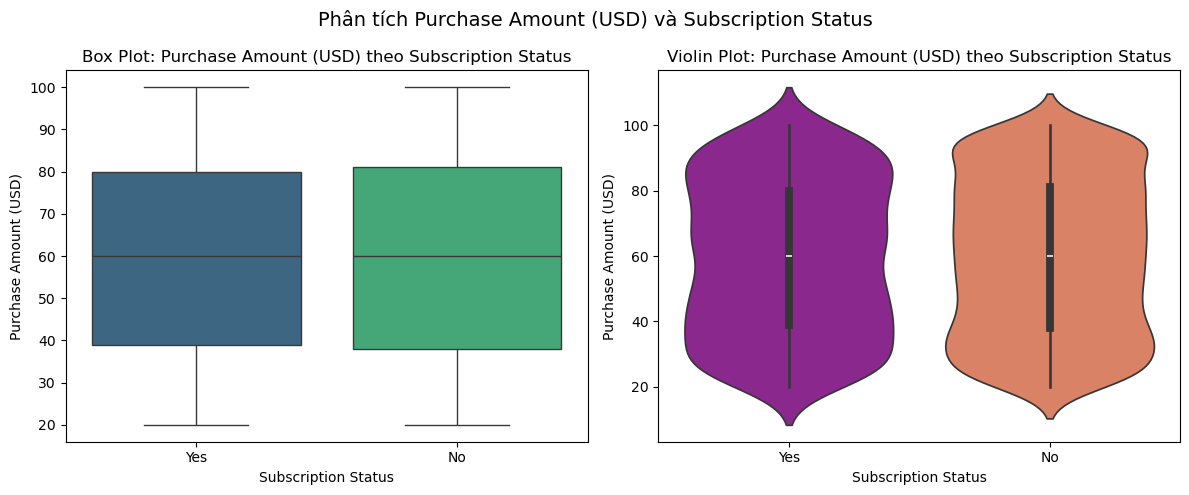

------------------------------------------------------------


In [45]:
num_var = 'Purchase Amount (USD)'
cat_var = 'Subscription Status'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Purchase Amount (USD) - Season**

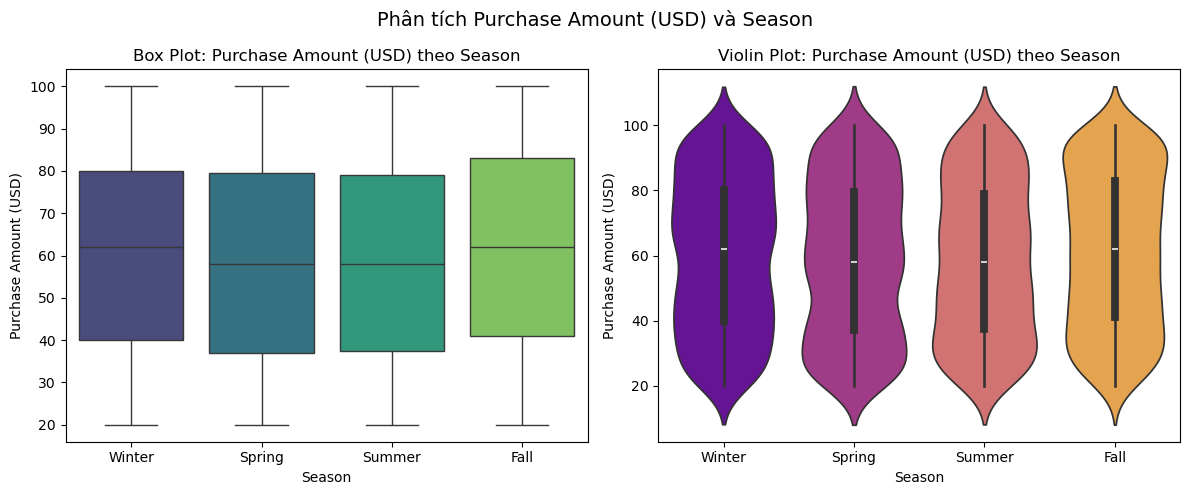

------------------------------------------------------------


In [46]:
num_var = 'Purchase Amount (USD)'
cat_var = 'Season'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Purchase Amount (USD) - Frequency of Purchases**

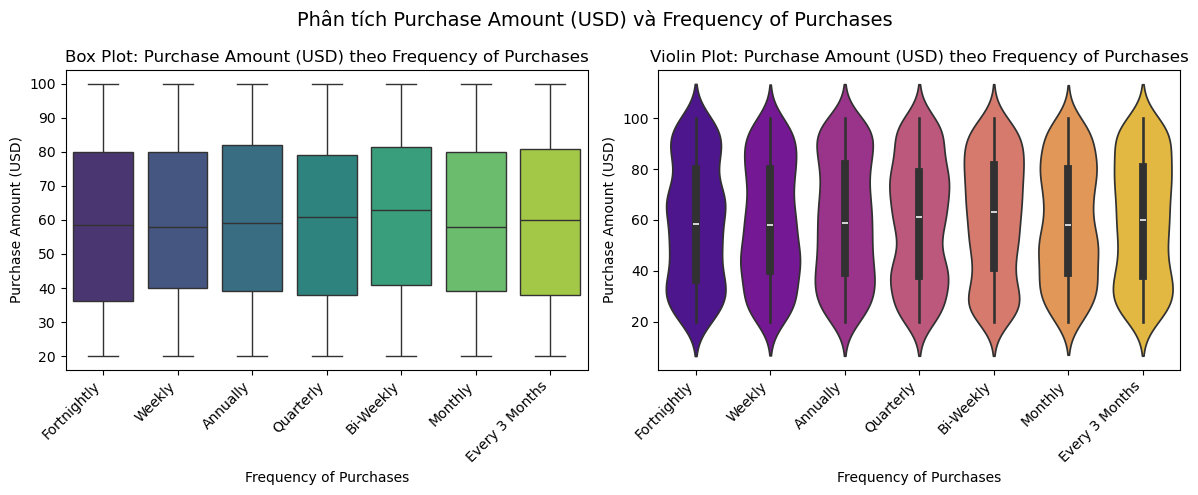

------------------------------------------------------------


In [47]:
num_var = 'Purchase Amount (USD)'
cat_var = 'Frequency of Purchases'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45, ha='right')

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Review Rating - Category**

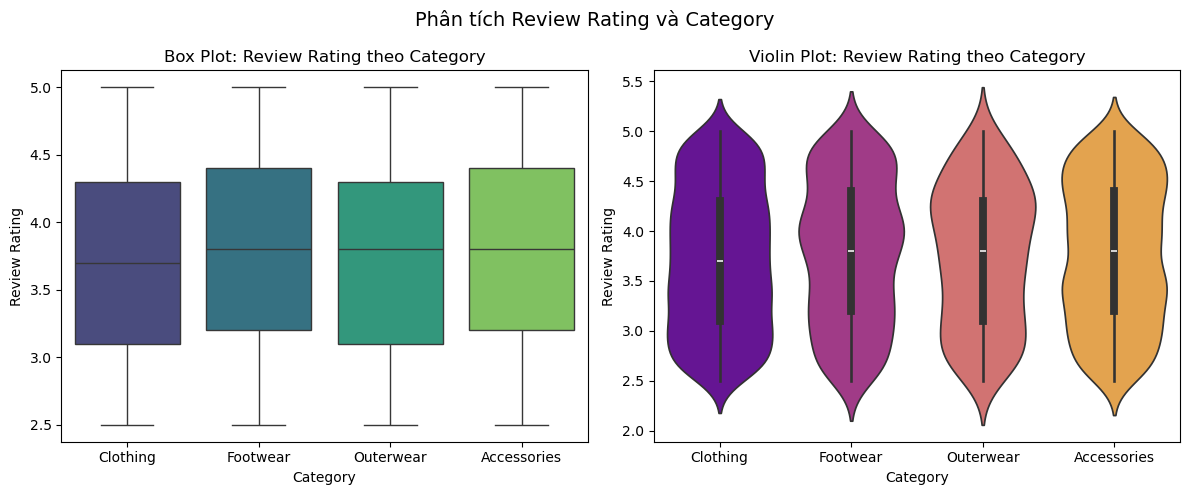

------------------------------------------------------------


In [48]:
num_var = 'Review Rating'
cat_var = 'Category'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Review Rating - Subscription Status**

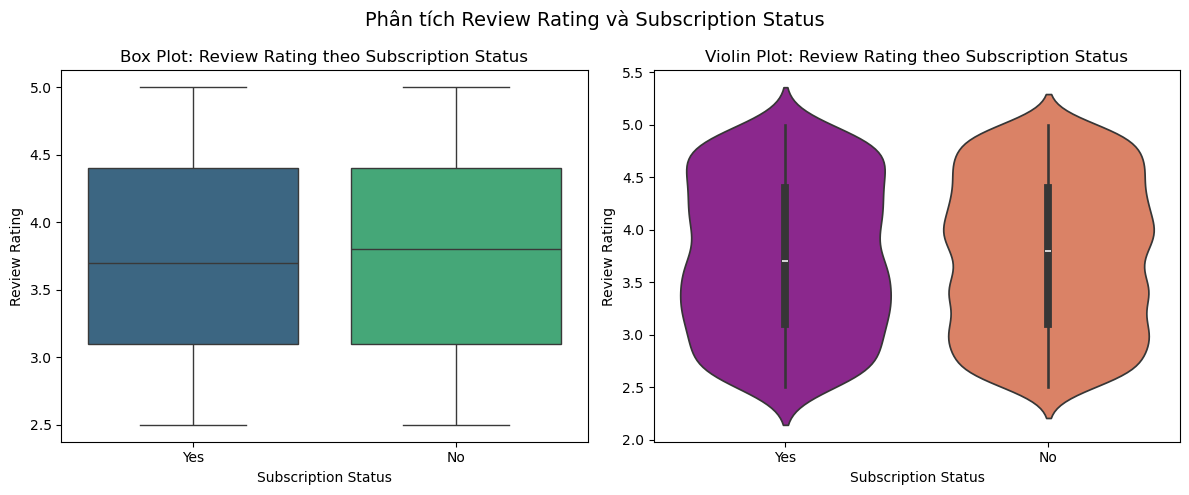

------------------------------------------------------------


In [49]:
num_var = 'Review Rating'
cat_var = 'Subscription Status'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Age - Gender**

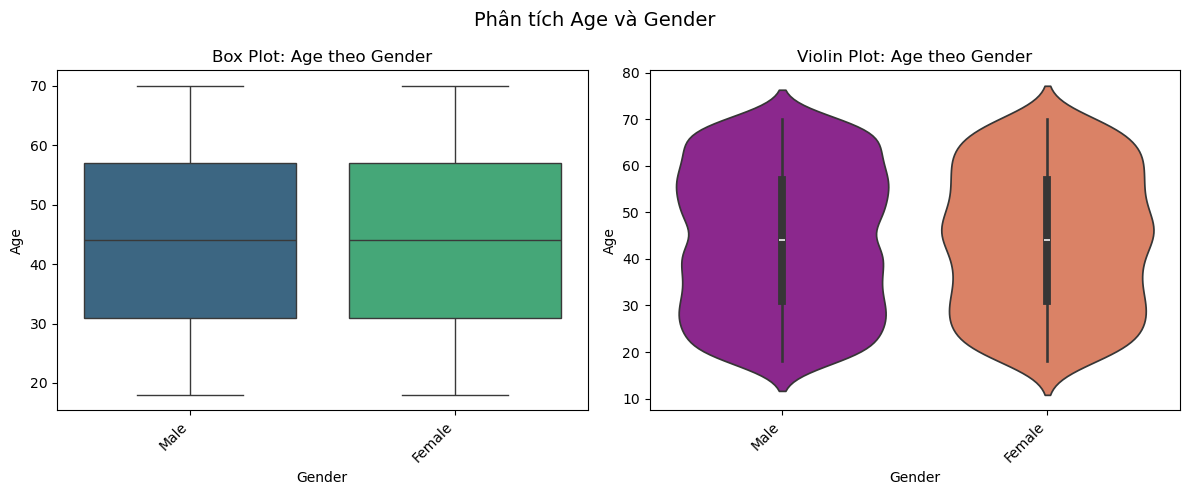

------------------------------------------------------------


In [50]:
num_var = 'Age'
cat_var = 'Gender'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45, ha='right')

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Age - Frequency of Purchases**

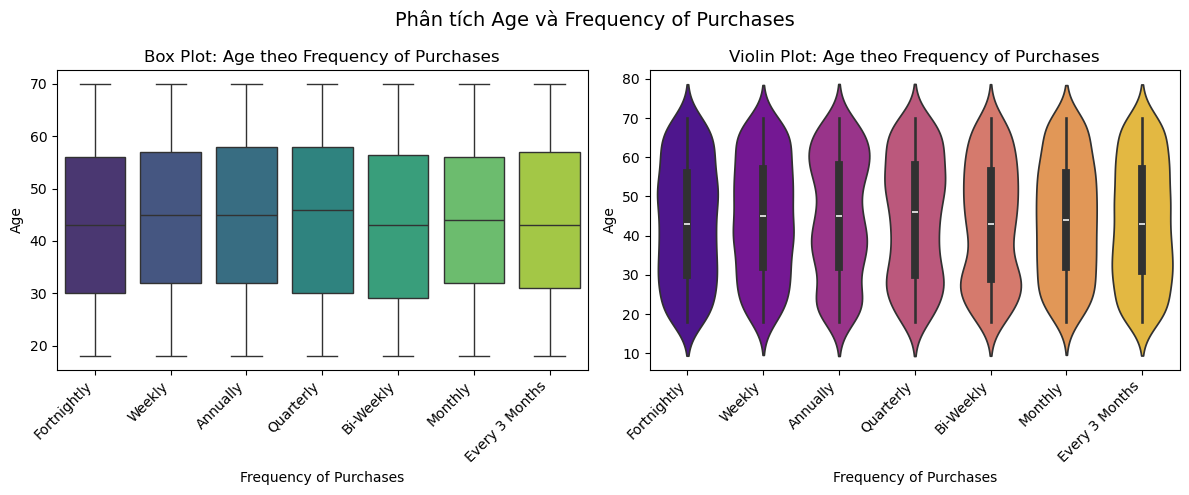

------------------------------------------------------------


In [51]:
num_var = 'Age'
cat_var = 'Frequency of Purchases'
n_unique_cat = df[cat_var].nunique()

if n_unique_cat <= 10:
    plt.figure(figsize=(12, 5))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='viridis', legend=False)
    plt.title(f'Box Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, palette='plasma', legend=False)
    plt.title(f'Violin Plot: {num_var} theo {cat_var}', fontsize=12)
    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.xticks(rotation=45, ha='right')

    plt.suptitle(f'Phân tích {num_var} và {cat_var}', fontsize=14, y=0.98)
    plt.tight_layout()

    # Lưu biểu đồ
    save_path = os.path.join(numerical_categorical_dir, f'{num_var.replace(" ", "_")}_{cat_var.replace(" ", "_")}_plot.png')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    print("-"*60)


#### **Nhận xét (Numerical vs Categorical):**


- `Purchase Amount vs Category`: Phân phối số tiền mua hàng (trung vị, tứ phân vị, mật độ) **khá tương đồng** giữa các danh mục (`Clothing`, `Footwear`, `Outerwear`, `Accessories`). Violin plot xác nhận phân phối gần như đồng đều trong mỗi danh mục. Không có danh mục nào nổi bật về mức chi tiêu cao hơn hẳn.
- `Purchase Amount vs Gender`: Phân phối số tiền mua hàng giữa **Nam và Nữ gần như giống hệt nhau**. Giới tính dường như không ảnh hưởng đến số tiền chi tiêu trung bình cho mỗi giao dịch.
- `Purchase Amount vs Season`: Phân phối số tiền mua hàng **không thay đổi đáng kể theo mùa**. Mức chi tiêu trung bình và khoảng biến thiên tương tự nhau qua các mùa.
- `Review Rating vs Category`: Đánh giá trung bình có vẻ **cao hơn một chút cho Footwear và Outerwear** so với Clothing và Accessories, nhưng sự khác biệt không lớn. Phân phối đánh giá lệch trái (nhiều điểm cao) ở tất cả các danh mục.
- `Review Rating vs Subscription Status`: Khách hàng đã đăng ký (`Yes`) có xu hướng đưa ra **đánh giá trung bình cao hơn một chút** so với khách hàng không đăng ký (`No`). Violin plot cho thấy mật độ đánh giá cao (4-5) dày đặc hơn ở nhóm 'Yes'.
- `Age vs Gender`: Phân phối tuổi giữa **Nam và Nữ rất giống nhau**, đều gần như đồng đều.
- `Age vs Frequency of Purchases`: Phân phối tuổi **khá tương đồng** giữa các nhóm tần suất mua hàng khác nhau. Không có nhóm tuổi nào đặc biệt ưa chuộng một tần suất mua hàng cụ thể.

### 2.7.3) Mối quan hệ giữa các biến phân loại (Feature-Feature: Categorical vs Categorical)

#### Path to save Categorical-Categorical Figures

In [52]:
categorical_categorical_dir = os.path.join(bivariate_dir, "Categorical_Categorical")
print(f"Categorical_Categorical_dir path: [ {categorical_categorical_dir} ]")

if not os.path.exists(categorical_categorical_dir):
    os.makedirs(categorical_categorical_dir)
    print(f"Created Categorical Categorical dir successfully!")
else:
    print(f"Categorical Categorical dir exists!")


Categorical_Categorical_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Bivariate\Categorical_Categorical ]
Created Categorical Categorical dir successfully!


#### Categorical Variables

In [53]:
cat_vars = ['Category', 'Gender', 'Subscription Status', 'Season', 'Discount Applied', 'Promo Code Used', 'Item Purchased', 'Size']

print("Danh sách biến phân loại (cat_vars):")
for i, var in enumerate(cat_vars, 1):
    print(f"{i}. [{var}]")


Danh sách biến phân loại (cat_vars):
1. [Category]
2. [Gender]
3. [Subscription Status]
4. [Season]
5. [Discount Applied]
6. [Promo Code Used]
7. [Item Purchased]
8. [Size]


In [54]:
valid_pairs = [
    ('Category', 'Gender'),
    ('Season', 'Subscription Status'),
    ('Discount Applied', 'Promo Code Used'),
    ('Item Purchased', 'Gender'),
    ('Gender', 'Size'),
    ('Discount Applied', 'Gender')
]

print("Các cặp hợp lệ phù hợp với Product Recommendation System:")
for i, (x_var, hue_var) in enumerate(valid_pairs, 1):
    print(f"{i}. {x_var} - {hue_var}")
print(f"\nTổng số cặp hợp lệ: {len(valid_pairs)}")


Các cặp hợp lệ phù hợp với Product Recommendation System:
1. Category - Gender
2. Season - Subscription Status
3. Discount Applied - Promo Code Used
4. Item Purchased - Gender
5. Gender - Size
6. Discount Applied - Gender

Tổng số cặp hợp lệ: 6


#### **Category - Gender**

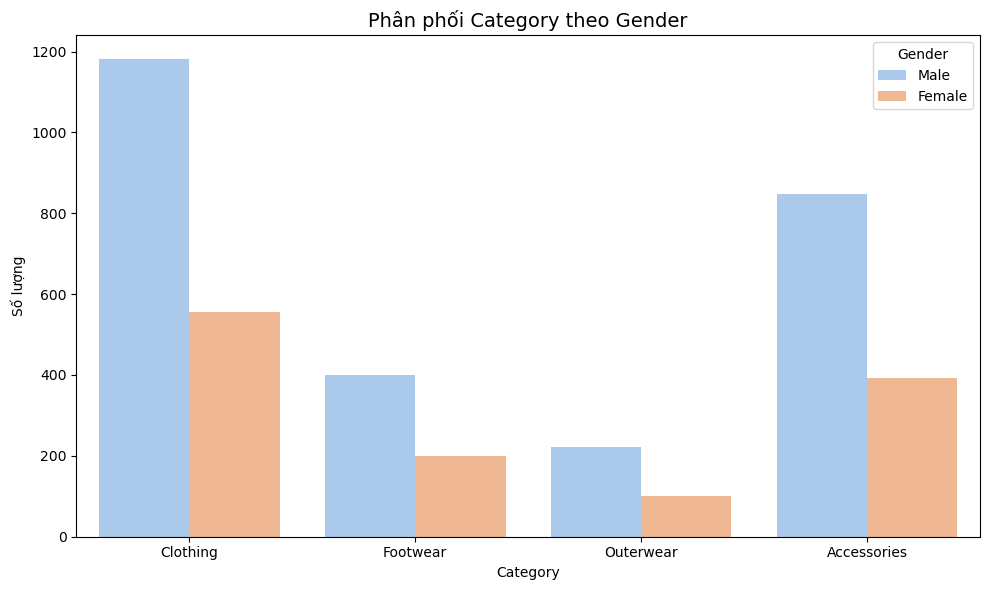

------------------------------------------------------------


In [55]:
x_var = "Category"
hue_var = "Gender"

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=x_var, hue=hue_var, palette="pastel")
plt.title(f"Phân phối {x_var} theo {hue_var}", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Số lượng")
plt.tight_layout()

# Lưu biểu đồ
save_path = os.path.join(
    categorical_categorical_dir,
    f'{x_var.replace(" ", "_")}_{hue_var.replace(" ", "_")}_plot.png',
)
plt.savefig(save_path, bbox_inches="tight")
plt.show()
print("-" * 60)


#### **Season - Subscription Status**

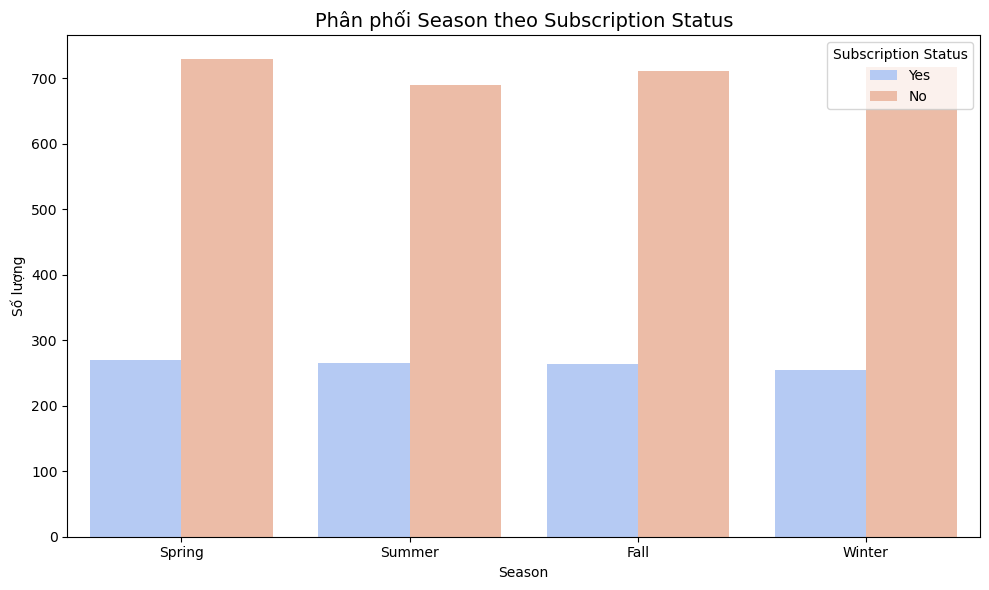

------------------------------------------------------------


In [56]:
x_var = "Season"
hue_var = "Subscription Status"
order = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=x_var, hue=hue_var, palette="coolwarm", order=order)
plt.title(f"Phân phối {x_var} theo {hue_var}", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Số lượng")
plt.tight_layout()

# Lưu biểu đồ
save_path = os.path.join(
    categorical_categorical_dir,
    f'{x_var.replace(" ", "_")}_{hue_var.replace(" ", "_")}_plot.png',
)
plt.savefig(save_path, bbox_inches="tight")
plt.show()
print("-" * 60)


#### **Discount Applied - Promo Code Used**

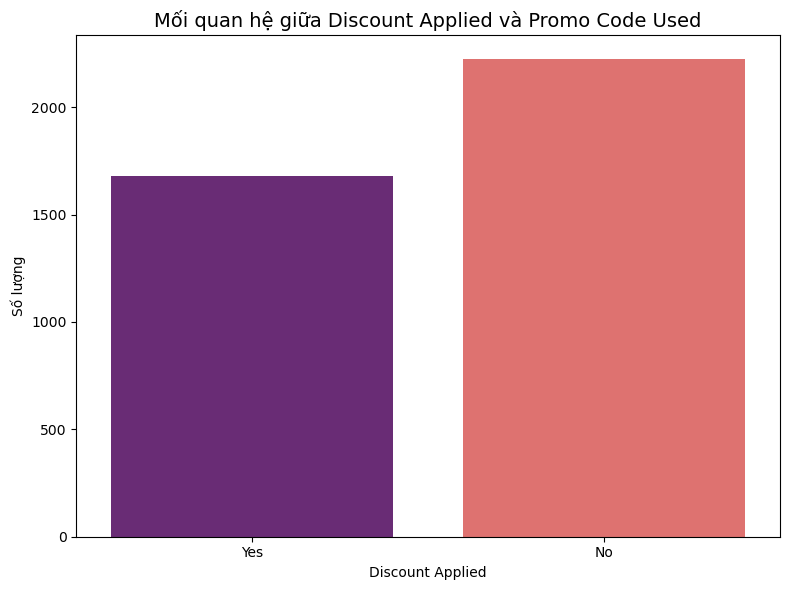

Bảng chéo: Discount Applied vs Promo Code Used


Promo Code Used     No   Yes
Discount Applied            
No                2223     0
Yes                  0  1677

------------------------------------------------------------


In [57]:
x_var = "Discount Applied"
hue_var = "Promo Code Used"

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=x_var, hue=hue_var, palette="magma")
plt.title(f"Mối quan hệ giữa {x_var} và {hue_var}", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Số lượng")
plt.tight_layout()

# Lưu biểu đồ
save_path = os.path.join(
    categorical_categorical_dir,
    f'{x_var.replace(" ", "_")}_{hue_var.replace(" ", "_")}_plot.png',
)
plt.savefig(save_path, bbox_inches="tight")
plt.show()
print("Bảng chéo: Discount Applied vs Promo Code Used")
display(pd.crosstab(df["Discount Applied"], df["Promo Code Used"]))
print("-" * 60)


#### **Item Purchased - Gender**

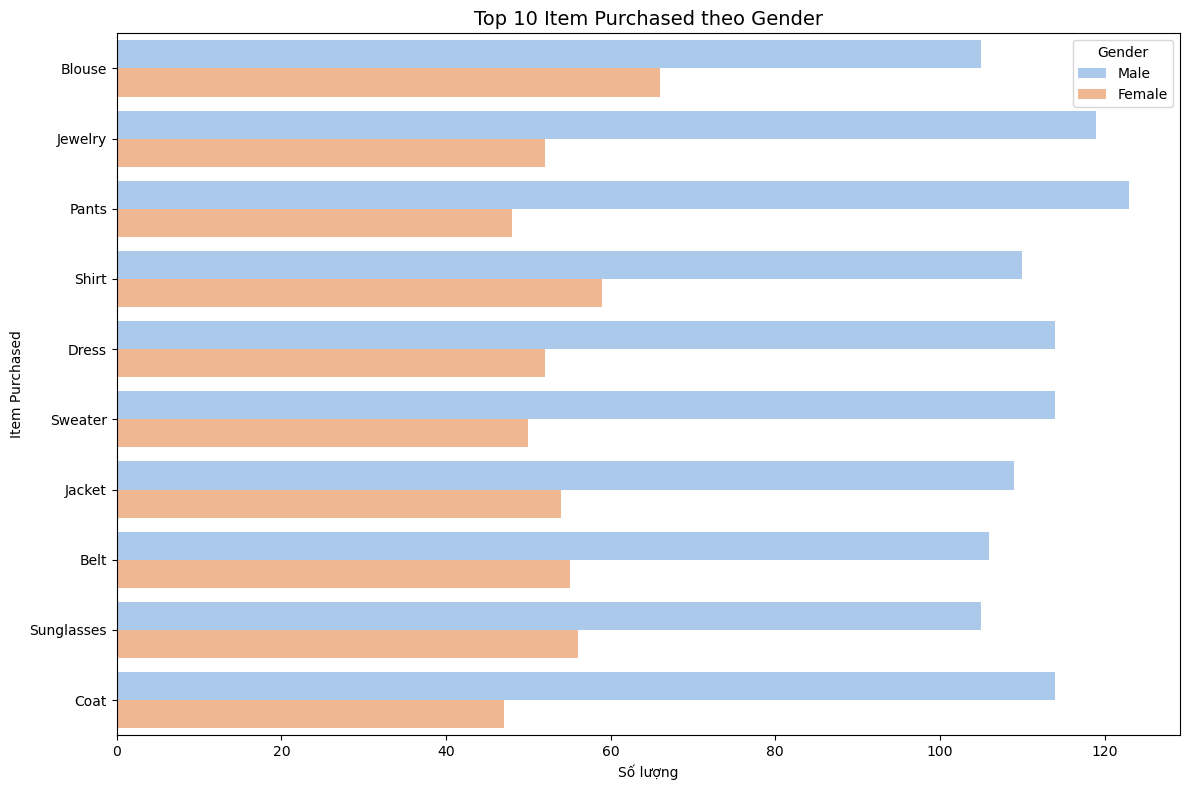

------------------------------------------------------------


In [58]:
x_var = "Item Purchased"
hue_var = "Gender"
top_items = df[x_var].value_counts().nlargest(10).index

plt.figure(figsize=(12, 8))
sns.countplot(
    data=df[df[x_var].isin(top_items)],
    y=x_var,
    hue=hue_var,
    palette="pastel",
    order=top_items,
)
plt.title(f"Top 10 {x_var} theo {hue_var}", fontsize=14)
plt.xlabel("Số lượng")
plt.ylabel(x_var)
plt.legend(title=hue_var)
plt.tight_layout()

# Lưu biểu đồ
save_path = os.path.join(
    categorical_categorical_dir,
    f'{x_var.replace(" ", "_")}_{hue_var.replace(" ", "_")}_plot.png',
)
plt.savefig(save_path, bbox_inches="tight")
plt.show()
print("-" * 60)


#### **Gender - Size**

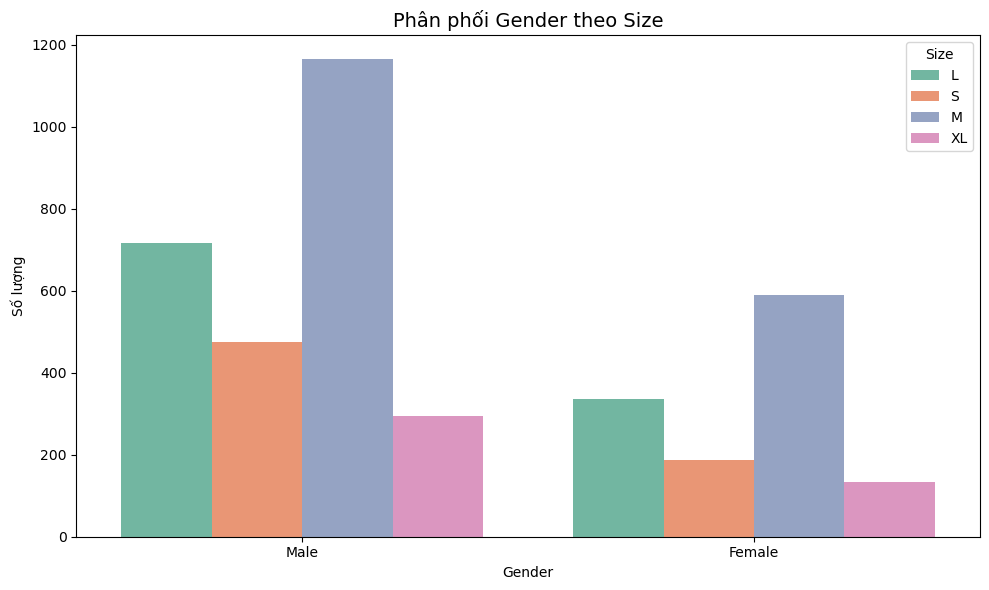

------------------------------------------------------------


In [59]:
x_var = "Gender"
hue_var = "Size"

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=x_var, hue=hue_var, palette="Set2")
plt.title(f"Phân phối {x_var} theo {hue_var}", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Số lượng")
plt.legend(title=hue_var)
plt.tight_layout()

# Lưu biểu đồ
save_path = os.path.join(
    categorical_categorical_dir,
    f'{x_var.replace(" ", "_")}_{hue_var.replace(" ", "_")}_plot.png',
)
plt.savefig(save_path, bbox_inches="tight")
plt.show()
print("-" * 60)


#### **Discount Applied - Gender**

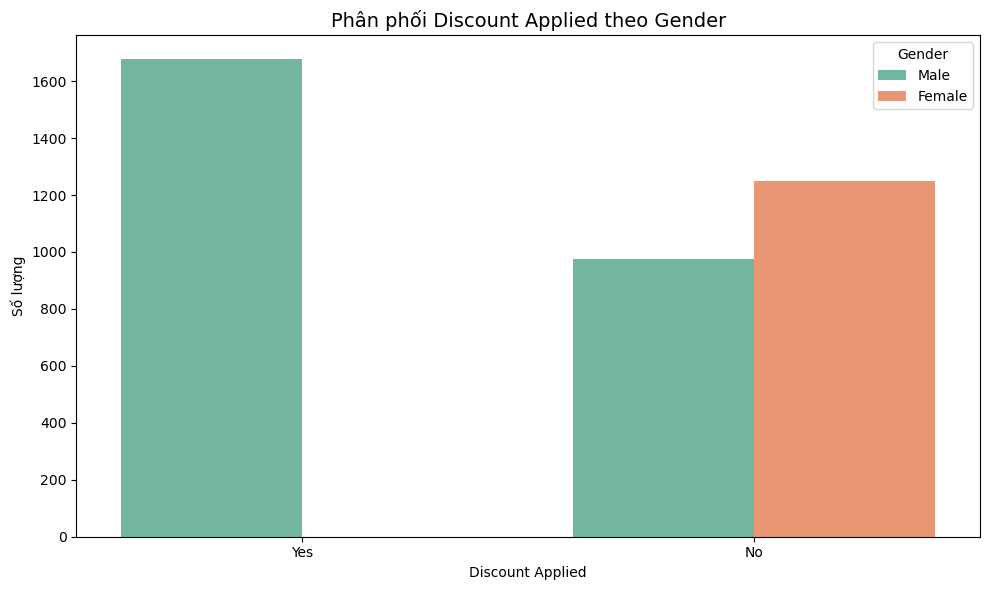

------------------------------------------------------------


In [60]:
x_var = "Discount Applied"
hue_var = "Gender"

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=x_var, hue=hue_var, palette="Set2")
plt.title(f"Phân phối {x_var} theo {hue_var}", fontsize=14)
plt.xlabel(x_var)
plt.ylabel("Số lượng")
plt.legend(title=hue_var)
plt.tight_layout()

# Lưu biểu đồ
save_path = os.path.join(
    categorical_categorical_dir,
    f'{x_var.replace(" ", "_")}_{hue_var.replace(" ", "_")}_plot.png',
)
plt.savefig(save_path, bbox_inches="tight")
plt.show()
print("-" * 60)


#### **Nhận xét (Categorical vs Categorical):**


- `Category vs Gender`: Ở **mọi danh mục**, số lượng mua hàng của **Nam đều nhiều hơn Nữ**, phản ánh tỷ lệ giới tính chung trong dữ liệu (Nam chiếm ~68%). Tỷ lệ phân bố các danh mục trong nhóm Nam và Nữ có vẻ tương tự nhau (Clothing là phổ biến nhất cho cả hai).
- `Season vs Subscription Status`: Tỷ lệ khách hàng **không đăng ký (No) luôn cao hơn** khách hàng có đăng ký (Yes) ở tất cả các mùa. Không có sự khác biệt rõ rệt về xu hướng đăng ký theo mùa; tỷ lệ Yes/No khá ổn định qua các mùa.
- `Discount Applied vs Promo Code Used`: Có một **mối quan hệ cực kỳ chặt chẽ** giữa hai biến này. Bảng chéo cho thấy 100% các trường hợp `Discount Applied = Yes` đều tương ứng với `Promo Code Used = Yes`, và 100% trường hợp `Discount Applied = No` tương ứng với `Promo Code Used = No`. Điều này xác nhận hai cột này chứa **thông tin hoàn toàn trùng lặp**.
- `Item Purchased vs Gender` (Phân tích nhãn tiềm năng): Xem xét top 10 mặt hàng phổ biến nhất, tỷ lệ Nam mua nhiều hơn Nữ được duy trì ở hầu hết các mặt hàng, phù hợp với tỷ lệ giới tính chung. Không có mặt hàng nào trong top 10 cho thấy sự ưa chuộng đặc biệt rõ rệt của một giới tính so với giới tính còn lại (ví dụ: tỷ lệ Nam/Nữ mua Blouse tương tự tỷ lệ Nam/Nữ mua Jeans).

## [2.8] - Phân tích đa biến (Multivariate Analysis)

#### Path to save Multivariate Figures

In [61]:
multivariate_dir = os.path.join(EDA_dir, "Multivariate")
print(f"Multivariate_dir path: [ {multivariate_dir} ]")

if not os.path.exists(multivariate_dir):
    os.makedirs(multivariate_dir)
    print(f"Created Multivariate dir successfully!")
else:
    print(f"Multivariate dir exists!")


Multivariate_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\EDA\Multivariate ]
Created Multivariate dir successfully!


#### 2.8.1) **Numerical variables - Gender**

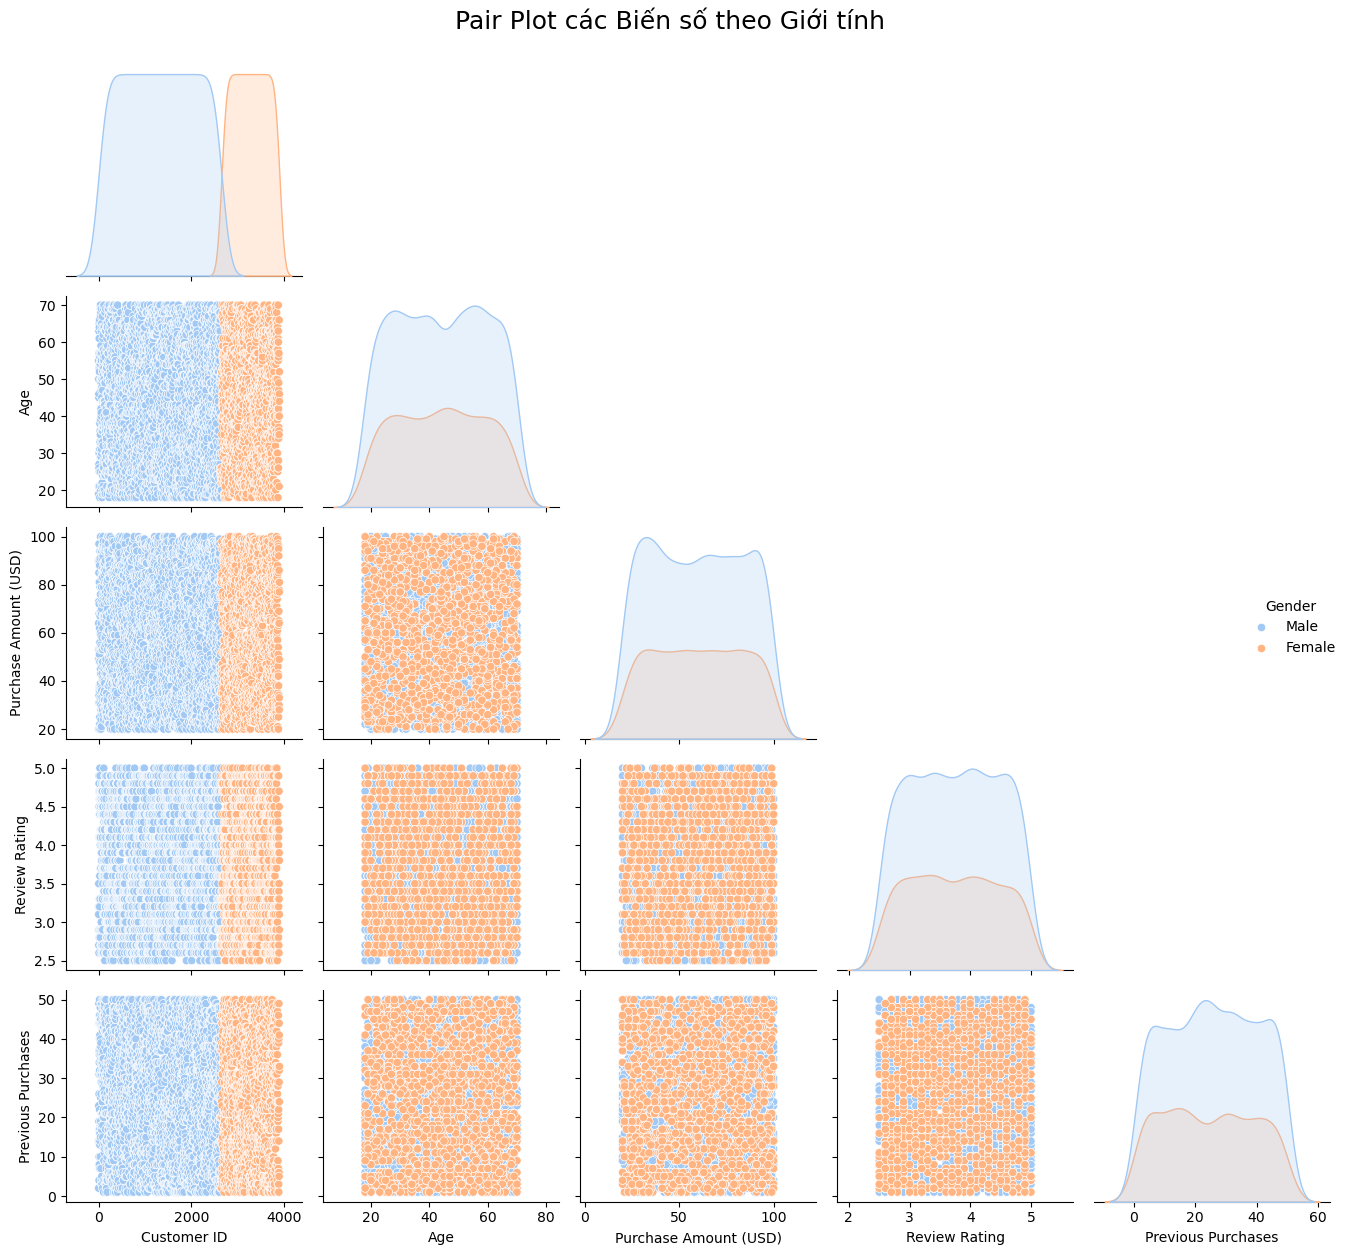

In [62]:
cols_for_pairplot = numerical_columns.tolist() + ["Gender"]
g = sns.pairplot(
    df[cols_for_pairplot], hue="Gender", diag_kind="kde", corner=True, palette="pastel"
)  # Tạo pairplot và lấy figure
g.fig.suptitle(
    "Pair Plot các Biến số theo Giới tính", y=1, fontsize=18
)  # Thêm suptitle vào figure của pairplot

plt.tight_layout()

save_path = os.path.join(multivariate_dir, "Pair_Plot_Numerical_by_Gender.png")
g.savefig(save_path, bbox_inches="tight")
plt.show()


##### **Nhận xét Pair Plot:**


- **Tương quan:** Các biểu đồ phân tán (scatter plots) ở các ô không nằm trên đường chéo xác nhận lại kết quả từ ma trận tương quan: **không có mối quan hệ tuyến tính rõ ràng** giữa các cặp biến số (`Age`, `Purchase Amount (USD)`, `Review Rating`, `Previous Purchases`). Các điểm dữ liệu phân bố khá ngẫu nhiên.
- **Phân phối theo Giới tính:** Các biểu đồ phân phối mật độ (KDE) trên đường chéo cho thấy hình dạng phân phối của từng biến số là **tương tự nhau giữa Nam và Nữ**. Mặc dù số lượng Nam nhiều hơn, nhưng hình dạng chung của phân phối tuổi, số tiền mua hàng, đánh giá, và số lượt mua trước đó không khác biệt đáng kể giữa hai giới.

#### 2.8.2) **Purchase Amount - Category - Gender**

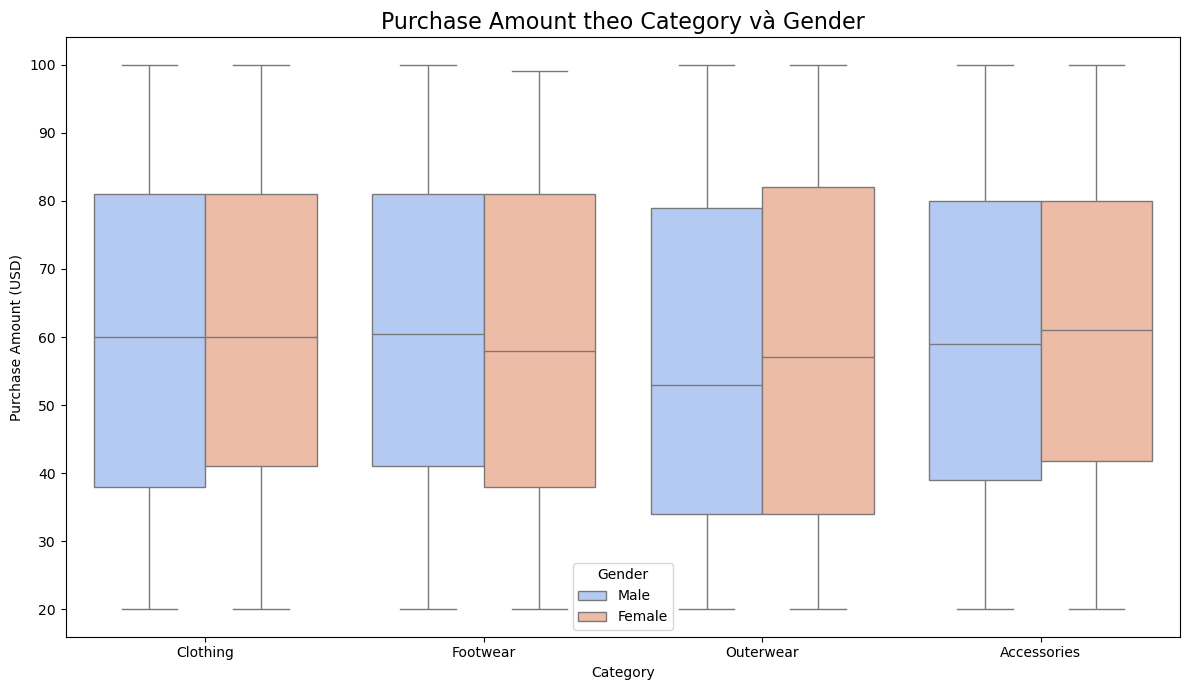

In [63]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df, x="Category", y="Purchase Amount (USD)", hue="Gender", palette="coolwarm"
)
plt.title("Purchase Amount theo Category và Gender", fontsize=16)
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Gender')
plt.tight_layout()

save_path = os.path.join(
    multivariate_dir, "Box_Plot_Purchase_Amount_by_Category_Gender.png"
)

plt.savefig(save_path, bbox_inches="tight")
plt.show()


##### **Nhận xét (Số tiền mua hàng theo Danh mục và Giới tính):**


- Biểu đồ này kết hợp thông tin từ `Purchase Amount`, `Category`, và `Gender`.
- Nó tái khẳng định những gì đã thấy trong phân tích hai biến:
  - Phân phối số tiền mua hàng **khá giống nhau giữa các danh mục**.
  - Phân phối số tiền mua hàng **gần như giống hệt nhau giữa Nam và Nữ** trong từng danh mục.
- Không có sự tương tác đáng kể nào giữa Giới tính và Danh mục đối với Số tiền mua hàng. Ví dụ, không có chuyện Nam chi tiêu nhiều hơn Nữ đáng kể chỉ ở một danh mục cụ thể nào đó.

## [2.9] - **Tổng kết và Nhận xét chung**

### 2.9.1) **Chất lượng dữ liệu:** 



- Dữ liệu rất tốt, đầy đủ, **không có giá trị thiếu (NULL)** như đã kiểm tra. Các kiểu dữ liệu phù hợp.

### 2.9.2) **Phân phối biến:**

- Các biến số (`Age`, `Purchase Amount`, `Previous Purchases`) có phân phối gần như đồng đều.
- `Review Rating` lệch trái nhẹ (nhiều đánh giá cao).
- Biến `Gender` mất cân bằng (Nam nhiều hơn Nữ).
- Các biến phân loại khác như `Category`, `Size`, `Payment Method`, `Shipping Type` có sự tập trung vào một vài giá trị phổ biến (`Clothing`, `M`, `PayPal`/`Credit Card`, `Free Shipping`).
- `Season` và `Frequency of Purchases` phân bố khá đều.

### 2.9.3) **Ngoại lai:** 

- Các biến số chính (`Age`, `Purchase Amount`, `Previous Purchases`) **không có ngoại lai đáng kể** theo phương pháp IQR. `Review Rating` có một số điểm thấp nhưng nằm trong phạm vi hợp lệ và không ảnh hưởng lớn.

### 2.9.4) **Mối quan hệ:**


- **Không có tương quan tuyến tính** mạnh giữa các biến số.
- Số tiền mua hàng (`Purchase Amount`) **không phụ thuộc nhiều** vào `Category`, `Gender`, hay `Season`.
- Khách hàng đăng ký (`Subscription Status=Yes`) có xu hướng **đánh giá cao hơn một chút**.
- `Discount Applied` và `Promo Code Used` chứa **thông tin hoàn toàn trùng lặp**.

### 2.9.5) **Phân tích nhãn tiềm năng (cho bài toán đề xuất):**

- `Category`: 'Clothing' chiếm đa số, các danh mục khác ít hơn đáng kể.
- `Item Purchased`: Phân phối đa dạng hơn `Category`, có 25 mặt hàng, top 5 là Blouse, Jeans, Pants, Shirt, Dress. Không có sự khác biệt lớn về sở thích mặt hàng (trong top 10) giữa Nam và Nữ.

### 2.9.6) **Hướng tiếp theo:**

- Dữ liệu sạch và có cấu trúc tốt, sẵn sàng cho các bước tiếp theo như tiền xử lý (mã hóa biến phân loại) và xây dựng mô hình.
- **Cần loại bỏ một trong hai cột `Discount Applied` hoặc `Promo Code Used`** do tính dư thừa.
- Sự mất cân bằng giới tính cần được lưu ý nếu xây dựng mô hình dự đoán liên quan đến giới tính, nhưng có thể không ảnh hưởng nhiều đến mô hình đề xuất dựa trên sản phẩm/danh mục.
- Dữ liệu phù hợp để xây dựng các mô hình đề xuất (ví dụ: lọc cộng tác dựa trên `Customer ID`, `Item Purchased`, `Review Rating`; hoặc lọc dựa trên nội dung/thuộc tính sản phẩm như `Category`, `Color`, `Season`) hoặc phân cụm khách hàng (dựa trên `Age`, `Frequency of Purchases`, `Category` ưa thích, v.v.).

## [2.10] - Tổng quan về luồng xử lý dữ liệu


Dự án này xử lý dữ liệu theo hai luồng song song, hỗ trợ cho các phương pháp recommendation khác nhau:


### 2.10.1)  **Feature Dataset** (`shopping_behavior_final_features.csv`):


- Chứa các đặc trưng của người dùng, sản phẩm và tương tác
- Được sử dụng cho Content-Based Filtering và các mô hình Machine Learning


### 2.10.2) **User-Item Matrix** (`user_item_matrix.csv`):


- Ma trận thể hiện mức độ tương tác giữa người dùng và sản phẩm
- Được sử dụng cho Collaborative Filtering (phương pháp dựa trên sự tương đồng)

**Trong các bước tiếp theo, chúng ta sẽ tiền xử lý dữ liệu, tạo các đặc trưng mới, và áp dụng các phương pháp khác nhau để xây dựng một hệ thống đề xuất hybrid (kết hợp).**

# Bước 3: Tiền xử lý dữ liệu - Preprocessing

## Path to Save Preprocessing Figures

In [64]:
preprocessing_dir = os.path.join(figures_dir, "Preprocessing")
print(f"Preprocessing_dir path: [ {preprocessing_dir} ]")

if not os.path.exists(preprocessing_dir):
    os.makedirs(preprocessing_dir)
    print(f"Created Preprocessing dir successfully!")
else:
    print(f"Preprocessing dir exists!")


Preprocessing_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Preprocessing ]
Created Preprocessing dir successfully!


## [3.1] - Import thư viện

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv(dataset_path)


In [67]:
pd.set_option('display.max_columns', None)


In [68]:
df.head()


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

## [3.2] - Kiểm tra lại giá trị thiêu

In [69]:
print("Kiểm tra giá trị thiếu:")
print(df.isnull().sum())


Kiểm tra giá trị thiếu:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


## [3.3] - Kiểm tra ngoại lai cho các cột số (sử dụng IQR)

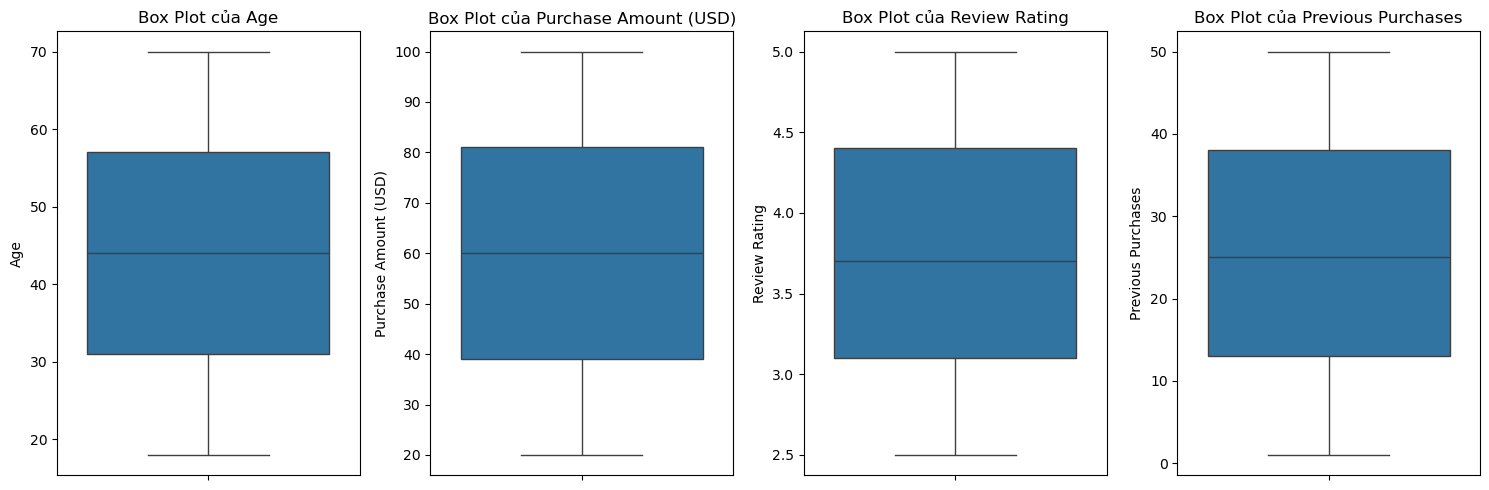

In [70]:
numeric_cols_initial = [
    "Age",
    "Purchase Amount (USD)",
    "Review Rating",
    "Previous Purchases",
]

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols_initial, 1):
    plt.subplot(1, len(numeric_cols_initial), i)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot của {col}")
plt.tight_layout()

save_path = os.path.join(preprocessing_dir, "Outlier_Check_Numerical_Box_Plot_IQR.png")
plt.savefig(save_path, bbox_inches="tight")
plt.show()


In [71]:
print("Số lượng giá trị duy nhất trong mỗi cột:")
unique_counts = df.nunique()
for col in numeric_cols_initial:
    print(f"- [{col}]: {unique_counts[col]}")


Số lượng giá trị duy nhất trong mỗi cột:
- [Age]: 53
- [Purchase Amount (USD)]: 81
- [Review Rating]: 26
- [Previous Purchases]: 50


In [72]:
# Dựa trên EDA trước đó, không có ngoại lai đáng kể cần loại bỏ ở bước này.
# Nếu có, có thể xử lý bằng cách loại bỏ hoặc capping (ví dụ: thay thế bằng percentile 1 và 99).
# Ví dụ capping (chưa áp dụng):
# lower_bound = df['Review Rating'].quantile(0.01)
# upper_bound = df['Review Rating'].quantile(0.99)
# df['Review Rating'] = np.where(df['Review Rating'] < lower_bound, lower_bound, df['Review Rating'])
# df['Review Rating'] = np.where(df['Review Rating'] > upper_bound, upper_bound, df['Review Rating'])


In [73]:
print("Kiểm tra ngoại lai bằng phương pháp IQR:")
for col in numeric_cols_initial:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"- [{col}]: Số lượng ngoại lai = {len(outliers)}, Giá trị ngoại lai = {outliers.tolist()}")


Kiểm tra ngoại lai bằng phương pháp IQR:
- [Age]: Số lượng ngoại lai = 0, Giá trị ngoại lai = []
- [Purchase Amount (USD)]: Số lượng ngoại lai = 0, Giá trị ngoại lai = []
- [Review Rating]: Số lượng ngoại lai = 0, Giá trị ngoại lai = []
- [Previous Purchases]: Số lượng ngoại lai = 0, Giá trị ngoại lai = []


## [3.4] - Mã hóa đặc trưng phân loại

- Sử dụng `One-Hot Encoding` cho các biến có ít giá trị duy nhất và không có thứ tự tự nhiên **(Gender, Category)**.

- Sử dụng `Label Encoding` cho các biến có nhiều giá trị hơn hoặc có thể có thứ tự tiềm ẩn (mặc dù LabelEncoder không bảo toàn thứ tự, nó tiết kiệm chiều dữ liệu).

### 3.4.1) One-hot encoding cho biến **Gender** và **Category**

#### Dữ liệu trước khi one-hot encoding

In [74]:
df.head()


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

#### Dữ liệu sau khi one-hot encoding

In [75]:
one_hot_cols = ['Gender', 'Category', ]
df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols, dtype=int)


In [76]:
df.head()


Customer ID  Age Item Purchased  Purchase Amount (USD)       Location Size  \
0            1   55         Blouse                     53       Kentucky    L   
1            2   19        Sweater                     64          Maine    L   
2            3   50          Jeans                     73  Massachusetts    S   
3            4   21        Sandals                     90   Rhode Island    M   
4            5   45         Blouse                     49         Oregon    M   

       Color  Season  Review Rating Subscription Status  Shipping Type  \
0       Gray  Winter            3.1                 Yes        Express   
1     Maroon  Winter            3.1                 Yes        Express   
2     Maroon  Spring            3.1                 Yes  Free Shipping   
3     Maroon  Spring            3.5                 Yes   Next Day Air   
4  Turquoise  Spring            2.7                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes                  14          Venmo   
1              Yes             Yes                   2           Cash   
2              Yes             Yes                  23    Credit Card   
3              Yes             Yes                  49         PayPal   
4              Yes             Yes                  31         PayPal   

  Frequency of Purchases  Gender_Female  Gender_Male  Category_Accessories  \
0            Fortnightly              0            1                     0   
1            Fortnightly              0            1                     0   
2                 Weekly              0            1                     0   
3                 Weekly              0            1                     0   
4               Annually              0            1                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  
0                  1                  0                   0  
1                  1                  0                   0  
2                  1                  0                   0  
3                  0                  1                   0  
4                  1                  0                   0

### 3.4.2) Chuẩn hóa các biến phân loại

#### Danh sách các biến phân loại đem đi chuẩn hóa (encoder

In [77]:
categorical_cols = [
    "Location",
    "Size",
    "Color",
    "Subscription Status",
    "Shipping Type",
    "Discount Applied",
    "Promo Code Used",
    "Payment Method",
]

print(f"Danh sách các biến phân loại đem đi chuẩn hóa (encoder):")
for i, col in enumerate(categorical_cols):
    print(f"{i + 1}. [{col}]")


Danh sách các biến phân loại đem đi chuẩn hóa (encoder):
1. [Location]
2. [Size]
3. [Color]
4. [Subscription Status]
5. [Shipping Type]
6. [Discount Applied]
7. [Promo Code Used]
8. [Payment Method]


#### Kiểm tra chuẩn hóa

In [78]:
le = LabelEncoder()
label_mappings = {}
encoding_success = True

try:
    for col in categorical_cols:
        # Chuẩn hóa cột và thêm vào DataFrame
        df[col + "_encoded"] = le.fit_transform(df[col])
        # Lưu ánh xạ
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    # Kiểm tra xem các cột mới có được tạo không
    for col in categorical_cols:
        if col + "_encoded" not in df.columns:
            encoding_success = False
            print(f"Lỗi: Cột {col}_encoded không được tạo.")
            break

except Exception as e:
    encoding_success = False
    print(f"Lỗi trong quá trình chuẩn hóa: {str(e)}")


if encoding_success:
    print("Chuẩn hóa thành công")
    # In ánh xạ để kiểm tra (tùy chọn)
    print("\nÁnh xạ giá trị sau chuẩn hóa:")
    for col, mapping in label_mappings.items():
        print(f"- {col}: {mapping}")
else:
    print("Chuẩn hóa thất bại. Vui lòng kiểm tra lại dữ liệu và quá trình xử lý.")


Chuẩn hóa thành công

Ánh xạ giá trị sau chuẩn hóa:
- Location: {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'New Hampshire': 28, 'New Jersey': 29, 'New Mexico': 30, 'New York': 31, 'North Carolina': 32, 'North Dakota': 33, 'Ohio': 34, 'Oklahoma': 35, 'Oregon': 36, 'Pennsylvania': 37, 'Rhode Island': 38, 'South Carolina': 39, 'South Dakota': 40, 'Tennessee': 41, 'Texas': 42, 'Utah': 43, 'Vermont': 44, 'Virginia': 45, 'Washington': 46, 'West Virginia': 47, 'Wisconsin': 48, 'Wyoming': 49}
- Size: {'L': 0, 'M': 1, 'S': 2, 'XL': 3}
- Color: {'Beige': 0, 'Black': 1, 'Blue': 2, 'Brown': 3, 'Charcoal': 4, 'Cyan': 5

In [79]:
df.head()


Customer ID  Age Item Purchased  Purchase Amount (USD)       Location Size  \
0            1   55         Blouse                     53       Kentucky    L   
1            2   19        Sweater                     64          Maine    L   
2            3   50          Jeans                     73  Massachusetts    S   
3            4   21        Sandals                     90   Rhode Island    M   
4            5   45         Blouse                     49         Oregon    M   

       Color  Season  Review Rating Subscription Status  Shipping Type  \
0       Gray  Winter            3.1                 Yes        Express   
1     Maroon  Winter            3.1                 Yes        Express   
2     Maroon  Spring            3.1                 Yes  Free Shipping   
3     Maroon  Spring            3.5                 Yes   Next Day Air   
4  Turquoise  Spring            2.7                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes                  14          Venmo   
1              Yes             Yes                   2           Cash   
2              Yes             Yes                  23    Credit Card   
3              Yes             Yes                  49         PayPal   
4              Yes             Yes                  31         PayPal   

  Frequency of Purchases  Gender_Female  Gender_Male  Category_Accessories  \
0            Fortnightly              0            1                     0   
1            Fortnightly              0            1                     0   
2                 Weekly              0            1                     0   
3                 Weekly              0            1                     0   
4               Annually              0            1                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  Location_encoded  \
0                  1                  0                   0                16   
1                  1                  0                   0                18   
2                  1                  0                   0                20   
3                  0                  1                   0                38   
4                  1                  0                   0                36   

   Size_encoded  Color_encoded  Subscription Status_encoded  \
0             0              7                            1   
1             0             12                            1   
2             2             12                            1   
3             1             12                            1   
4             1             21                            1   

   Shipping Type_encoded  Discount Applied_encoded  Promo Code Used_encoded  \
0                      1                         1                        1   
1                      1                         1                        1   
2                      2                         1                        1   
3                      3                         1                        1   
4                      2                         1                        1   

   Payment Method_encoded  
0                       5  
1                       1  
2                       2  
3                       4  
4                       4

### 3.4.3) Kiểm tra tương quan giữa các đặc trưng đã mã hóa (**Redundancy Check**)

#### Danh sách các cột đã mã hóa (encoded)

In [80]:
encoded_cols = [col for col in df.columns if '_encoded' in col or 'Gender_' in col or 'Category_' in col]

print(f"Danh sách các cột đã mã hóa (encoded):")
for i, encoded_col in enumerate(encoded_cols):
    print(f"{i + 1}. [{encoded_col}]")


Danh sách các cột đã mã hóa (encoded):
1. [Gender_Female]
2. [Gender_Male]
3. [Category_Accessories]
4. [Category_Clothing]
5. [Category_Footwear]
6. [Category_Outerwear]
7. [Location_encoded]
8. [Size_encoded]
9. [Color_encoded]
10. [Subscription Status_encoded]
11. [Shipping Type_encoded]
12. [Discount Applied_encoded]
13. [Promo Code Used_encoded]
14. [Payment Method_encoded]


#### Ma trận tương quan giữa các đặc trưng đã mã hóa:

In [81]:
corr_matrix_encoded = df[encoded_cols].corr()
corr_matrix_encoded


Gender_Female  Gender_Male  Category_Accessories  \
Gender_Female                     1.000000    -1.000000             -0.005666   
Gender_Male                      -1.000000     1.000000              0.005666   
Category_Accessories             -0.005666     0.005666              1.000000   
Category_Clothing                 0.000177    -0.000177             -0.611845   
Category_Footwear                 0.011160    -0.011160             -0.290844   
Category_Outerwear               -0.005337     0.005337             -0.205515   
Location_encoded                 -0.000747     0.000747              0.000754   
Size_encoded                     -0.018764     0.018764              0.033260   
Color_encoded                     0.000560    -0.000560             -0.024460   
Subscription Status_encoded      -0.417197     0.417197             -0.000992   
Shipping Type_encoded            -0.016490     0.016490              0.008173   
Discount Applied_encoded         -0.595823     0.595823              0.010899   
Promo Code Used_encoded          -0.595823     0.595823              0.010899   
Payment Method_encoded           -0.003369     0.003369              0.017178   

                             Category_Clothing  Category_Footwear  \
Gender_Female                         0.000177           0.011160   
Gender_Male                          -0.000177          -0.011160   
Category_Accessories                 -0.611845          -0.290844   
Category_Clothing                     1.000000          -0.381735   
Category_Footwear                    -0.381735           1.000000   
Category_Outerwear                   -0.269740          -0.128223   
Location_encoded                     -0.007941           0.017624   
Size_encoded                         -0.009671          -0.012903   
Color_encoded                         0.026566          -0.001141   
Subscription Status_encoded          -0.013933           0.014849   
Shipping Type_encoded                -0.003782           0.001215   
Discount Applied_encoded             -0.016579           0.002054   
Promo Code Used_encoded              -0.016579           0.002054   
Payment Method_encoded               -0.028651           0.014357   

                             Category_Outerwear  Location_encoded  \
Gender_Female                         -0.005337         -0.000747   
Gender_Male                            0.005337          0.000747   
Category_Accessories                  -0.205515          0.000754   
Category_Clothing                     -0.269740         -0.007941   
Category_Footwear                     -0.128223          0.017624   
Category_Outerwear                     1.000000         -0.009997   
Location_encoded                      -0.009997          1.000000   
Size_encoded                          -0.021848          0.000275   
Color_encoded                         -0.005079         -0.004944   
Subscription Status_encoded            0.007366          0.004529   
Shipping Type_encoded                 -0.008567         -0.001458   
Discount Applied_encoded               0.008782          0.011926   
Promo Code Used_encoded                0.008782          0.011926   
Payment Method_encoded                 0.003854         -0.006931   

                             Size_encoded  Color_encoded  \
Gender_Female                   -0.018764       0.000560   
Gender_Male                      0.018764      -0.000560   
Category_Accessories             0.033260      -0.024460   
Category_Clothing               -0.009671       0.026566   
Category_Footwear               -0.012903      -0.001141   
Category_Outerwear              -0.021848      -0.005079   
Location_encoded                 0.000275      -0.004944   
Size_encoded                     1.000000      -0.005124   
Color_encoded                   -0.005124       1.000000   
Subscription Status_encoded     -0.014501       0.021333   
Shipping Type_encoded            0.001020      -0.000034   
Discount Applied_enco

In [82]:
corr_matrix_encoded_abs = corr_matrix_encoded.abs()
corr_matrix_encoded_abs 


Gender_Female  Gender_Male  Category_Accessories  \
Gender_Female                     1.000000     1.000000              0.005666   
Gender_Male                       1.000000     1.000000              0.005666   
Category_Accessories              0.005666     0.005666              1.000000   
Category_Clothing                 0.000177     0.000177              0.611845   
Category_Footwear                 0.011160     0.011160              0.290844   
Category_Outerwear                0.005337     0.005337              0.205515   
Location_encoded                  0.000747     0.000747              0.000754   
Size_encoded                      0.018764     0.018764              0.033260   
Color_encoded                     0.000560     0.000560              0.024460   
Subscription Status_encoded       0.417197     0.417197              0.000992   
Shipping Type_encoded             0.016490     0.016490              0.008173   
Discount Applied_encoded          0.595823     0.595823              0.010899   
Promo Code Used_encoded           0.595823     0.595823              0.010899   
Payment Method_encoded            0.003369     0.003369              0.017178   

                             Category_Clothing  Category_Footwear  \
Gender_Female                         0.000177           0.011160   
Gender_Male                           0.000177           0.011160   
Category_Accessories                  0.611845           0.290844   
Category_Clothing                     1.000000           0.381735   
Category_Footwear                     0.381735           1.000000   
Category_Outerwear                    0.269740           0.128223   
Location_encoded                      0.007941           0.017624   
Size_encoded                          0.009671           0.012903   
Color_encoded                         0.026566           0.001141   
Subscription Status_encoded           0.013933           0.014849   
Shipping Type_encoded                 0.003782           0.001215   
Discount Applied_encoded              0.016579           0.002054   
Promo Code Used_encoded               0.016579           0.002054   
Payment Method_encoded                0.028651           0.014357   

                             Category_Outerwear  Location_encoded  \
Gender_Female                          0.005337          0.000747   
Gender_Male                            0.005337          0.000747   
Category_Accessories                   0.205515          0.000754   
Category_Clothing                      0.269740          0.007941   
Category_Footwear                      0.128223          0.017624   
Category_Outerwear                     1.000000          0.009997   
Location_encoded                       0.009997          1.000000   
Size_encoded                           0.021848          0.000275   
Color_encoded                          0.005079          0.004944   
Subscription Status_encoded            0.007366          0.004529   
Shipping Type_encoded                  0.008567          0.001458   
Discount Applied_encoded               0.008782          0.011926   
Promo Code Used_encoded                0.008782          0.011926   
Payment Method_encoded                 0.003854          0.006931   

                             Size_encoded  Color_encoded  \
Gender_Female                    0.018764       0.000560   
Gender_Male                      0.018764       0.000560   
Category_Accessories             0.033260       0.024460   
Category_Clothing                0.009671       0.026566   
Category_Footwear                0.012903       0.001141   
Category_Outerwear               0.021848       0.005079   
Location_encoded                 0.000275       0.004944   
Size_encoded                     1.000000       0.005124   
Color_encoded                    0.005124       1.000000   
Subscription Status_encoded      0.014501       0.021333   
Shipping Type_encoded            0.001020       0.000034   
Discount Applied_enco

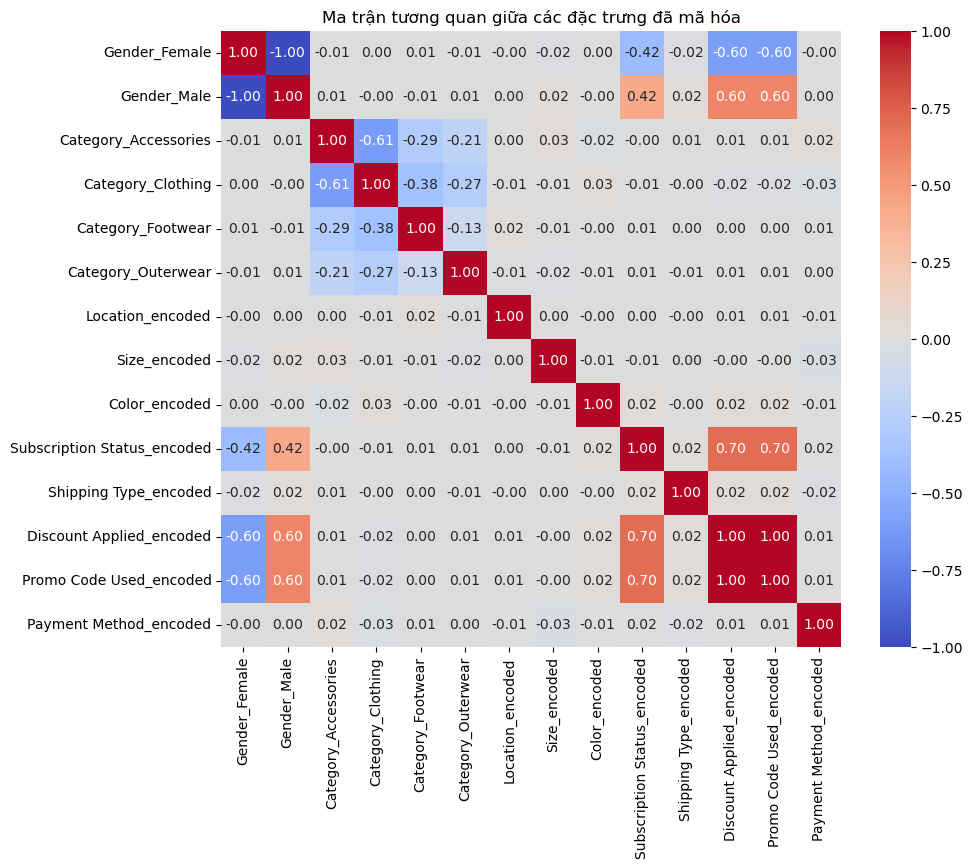

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Ma trận tương quan giữa các đặc trưng đã mã hóa')

save_path = os.path.join(preprocessing_dir, "Correlation_Heatmap_of_Encoded_Features.png")
plt.savefig(save_path, bbox_inches="tight")
plt.show()


#### Heatmap cho các đặc trưng có độ tương quan cao

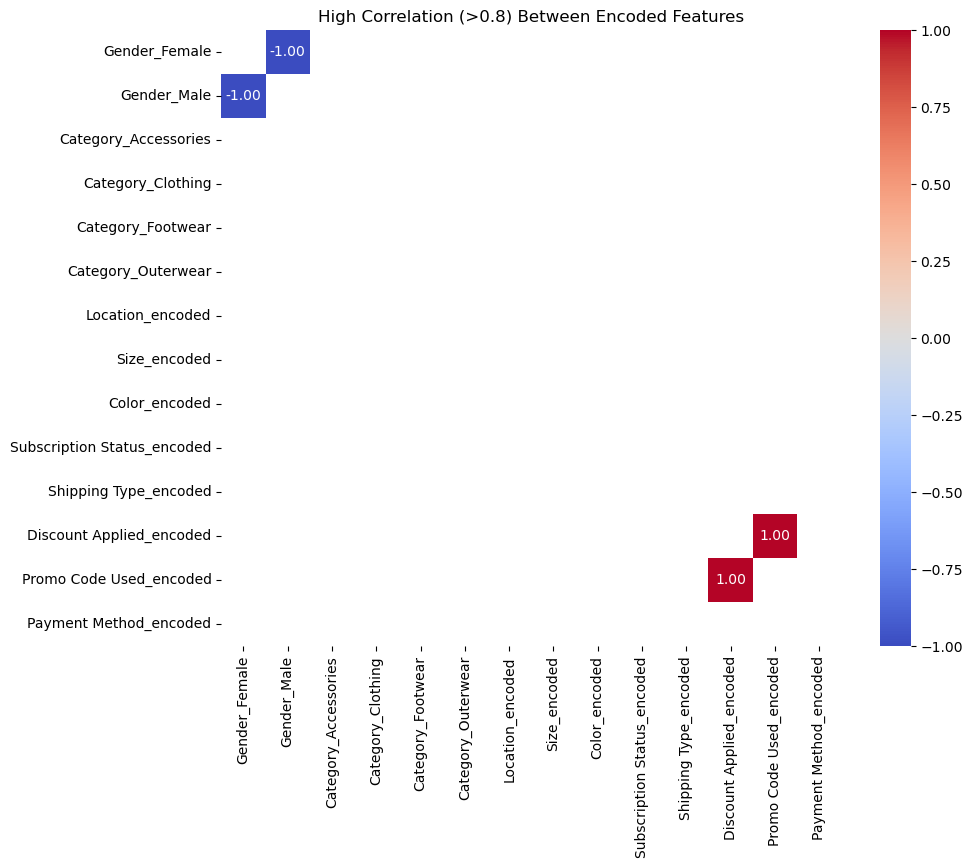

In [84]:
high_corr_threshold = 0.8

# Tạo mask để che đường chéo chính và các giá trị lặp lại
mask = np.eye(len(corr_matrix_encoded), dtype=bool)
high_coor = (corr_matrix_encoded_abs > high_corr_threshold) & ~mask

high_corr_matrix = corr_matrix_encoded.where(high_coor)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"High Correlation (>{high_corr_threshold}) Between Encoded Features")

# Save the plot
threshold_str = str(high_corr_threshold)#.replace(".", "")
filename = f"High_Correlation_Heatmap_Encoded_Features_thr{threshold_str}.png"
save_path = os.path.join(preprocessing_dir, filename)
plt.savefig(save_path, bbox_inches="tight")

# Display the plot
plt.show()


- `Gender_Female` và `Gender_Male` có hệ số tương quan hoàn hảo là `-1`. Đây là dấu hiệu của tính **dư thừa thông tin**, vì hai biến này hoàn toàn đối lập. Do đó, một trong hai cột nên được loại bỏ để tránh **đa cộng tuyến (multicollinearity)**.

- `Discount Applied_encoded` và `Promo Code Used_encoded` có **hệ số tương quan hoàn hảo** là `+1`. Điều này cho thấy hai cột này **mang thông tin giống hệt nhau**, vì vậy một trong hai cũng nên bị loại bỏ.

#### Loại bỏ cột dư thừa (Gender_Male và Promo Code Used_encoded)

In [85]:
columns_to_drop = ['Gender_Male', 'Promo Code Used_encoded']

for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])
        print(f"Đã loại bỏ cột: {col}")
    else:
        print(f"Cột '{col}' không còn tồn tại trong DataFrame.")


Đã loại bỏ cột: Gender_Male
Đã loại bỏ cột: Promo Code Used_encoded


## [3.5] - Chuẩn hóa đặc trưng số

- Sử dụng MinMaxScaler để đưa các cột số về khoảng [0, 1], vì dữ liệu không có phân phối chuẩn
- Điều này phù hợp với bài toán đề xuất vì dữ liệu không có ngoại lai (xác nhận ở 3.3).
- Điều này quan trọng cho các thuật toán nhạy cảm với thang đo như KNN, SVM, hoặc các phương pháp dựa trên khoảng cách.

### 3.5.1) Danh sách các cột số cần chuẩn hóa

In [86]:
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

print(f"Danh sách các cột số cần chuẩn hóa")
for i, numeric_col in enumerate(numeric_cols):
    print(f"{i+ 1}. [{numeric_col}]")


Danh sách các cột số cần chuẩn hóa
1. [Age]
2. [Purchase Amount (USD)]
3. [Review Rating]
4. [Previous Purchases]


### 3.5.2) Chuẩn hóa

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols].head(5)



Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0  0.711538                 0.4125           0.24            0.265306
1  0.019231                 0.5500           0.24            0.020408
2  0.615385                 0.6625           0.24            0.448980
3  0.057692                 0.8750           0.40            0.979592
4  0.519231                 0.3625           0.08            0.612245

### 3.5.3) Phân bố các đặc trưng đã chuẩn hóa

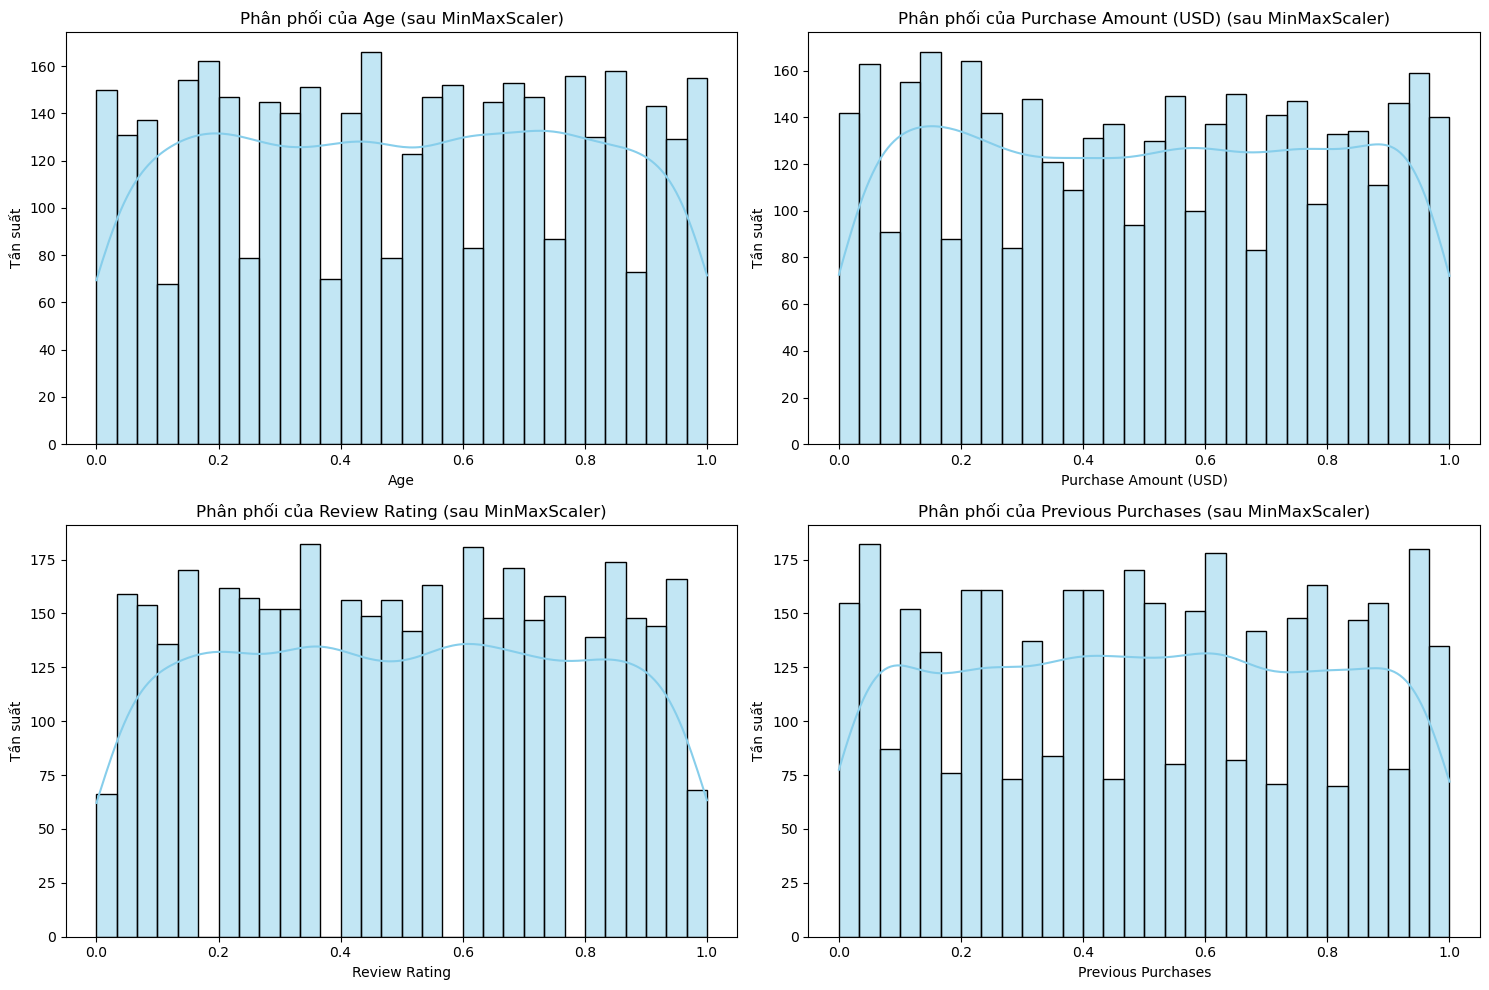

In [88]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Phân phối của {col} (sau MinMaxScaler)', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Tần suất', fontsize=10)

# Điều chỉnh bố cục
plt.tight_layout()

# Lưu biểu đồ
filename = "MinMaxScaler_Numerical_Histogram_Plots.png"
save_path = os.path.join(preprocessing_dir, filename)
plt.savefig(save_path, bbox_inches="tight")

# Hiển thị biểu đồ
plt.show()


In [89]:
display(df.head())


Customer ID       Age Item Purchased  Purchase Amount (USD)       Location  \
0            1  0.711538         Blouse                 0.4125       Kentucky   
1            2  0.019231        Sweater                 0.5500          Maine   
2            3  0.615385          Jeans                 0.6625  Massachusetts   
3            4  0.057692        Sandals                 0.8750   Rhode Island   
4            5  0.519231         Blouse                 0.3625         Oregon   

  Size      Color  Season  Review Rating Subscription Status  Shipping Type  \
0    L       Gray  Winter           0.24                 Yes        Express   
1    L     Maroon  Winter           0.24                 Yes        Express   
2    S     Maroon  Spring           0.24                 Yes  Free Shipping   
3    M     Maroon  Spring           0.40                 Yes   Next Day Air   
4    M  Turquoise  Spring           0.08                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes            0.265306          Venmo   
1              Yes             Yes            0.020408           Cash   
2              Yes             Yes            0.448980    Credit Card   
3              Yes             Yes            0.979592         PayPal   
4              Yes             Yes            0.612245         PayPal   

  Frequency of Purchases  Gender_Female  Category_Accessories  \
0            Fortnightly              0                     0   
1            Fortnightly              0                     0   
2                 Weekly              0                     0   
3                 Weekly              0                     0   
4               Annually              0                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  Location_encoded  \
0                  1                  0                   0                16   
1                  1                  0                   0                18   
2                  1                  0                   0                20   
3                  0                  1                   0                38   
4                  1                  0                   0                36   

   Size_encoded  Color_encoded  Subscription Status_encoded  \
0             0              7                            1   
1             0             12                            1   
2             2             12                            1   
3             1             12                            1   
4             1             21                            1   

   Shipping Type_encoded  Discount Applied_encoded  Payment Method_encoded  
0                      1                         1                       5  
1                      1                         1                       1  
2                      2                         1                       2  
3                      3                         1                       4  
4                      2                         1                       4

## [3.6] - Tổng kết và Lưu dữ liệu đã xử lý

### **Các bước đã thực hiện:**


1.  Kiểm tra và nhận xét về dữ liệu thiếu/ngoại lai.
3.  Mã hóa biến phân loại (One-Hot và Label Encoding).
4.  Kiểm tra và loại bỏ đặc trưng dư thừa (multicollinearity).
5.  Chuẩn hóa biến số (`MinMaxScaler`).

Dữ liệu đã được tiền xử lý và sẵn sàng cho các bước xây dựng mô hình tiếp theo.

## [3.7] - Path to Save Processed DataFrame

In [90]:
processed_file_path = os.path.join(data_dir, "shopping_behavior_processed.csv")
print(f"Processed_file path: [ {processed_file_path} ]")

try:
    df.to_csv(processed_file_path, index=False)
    print(f"Đã lưu Processed file: [ {processed_file_path} ] đã xử lý vào Data dir: [ {data_dir} ]")
    
    # Kiểm tra 
    if os.path.exists(processed_file_path):
        df_check = pd.read_csv(processed_file_path)
        print("Dữ liệu vừa lưu (5 hàng đầu tiên):")
        display(df_check.head())
    else:
        print(f"File {processed_file_path} không tồn tại!")
    
except Exception as e:
    print(f"Lỗi khi lưu file: {e}")



Processed_file path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data\shopping_behavior_processed.csv ]
Đã lưu Processed file: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data\shopping_behavior_processed.csv ] đã xử lý vào Data dir: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data ]
Dữ liệu vừa lưu (5 hàng đầu tiên):


Customer ID       Age Item Purchased  Purchase Amount (USD)       Location  \
0            1  0.711538         Blouse                 0.4125       Kentucky   
1            2  0.019231        Sweater                 0.5500          Maine   
2            3  0.615385          Jeans                 0.6625  Massachusetts   
3            4  0.057692        Sandals                 0.8750   Rhode Island   
4            5  0.519231         Blouse                 0.3625         Oregon   

  Size      Color  Season  Review Rating Subscription Status  Shipping Type  \
0    L       Gray  Winter           0.24                 Yes        Express   
1    L     Maroon  Winter           0.24                 Yes        Express   
2    S     Maroon  Spring           0.24                 Yes  Free Shipping   
3    M     Maroon  Spring           0.40                 Yes   Next Day Air   
4    M  Turquoise  Spring           0.08                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes            0.265306          Venmo   
1              Yes             Yes            0.020408           Cash   
2              Yes             Yes            0.448980    Credit Card   
3              Yes             Yes            0.979592         PayPal   
4              Yes             Yes            0.612245         PayPal   

  Frequency of Purchases  Gender_Female  Category_Accessories  \
0            Fortnightly              0                     0   
1            Fortnightly              0                     0   
2                 Weekly              0                     0   
3                 Weekly              0                     0   
4               Annually              0                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  Location_encoded  \
0                  1                  0                   0                16   
1                  1                  0                   0                18   
2                  1                  0                   0                20   
3                  0                  1                   0                38   
4                  1                  0                   0                36   

   Size_encoded  Color_encoded  Subscription Status_encoded  \
0             0              7                            1   
1             0             12                            1   
2             2             12                            1   
3             1             12                            1   
4             1             21                            1   

   Shipping Type_encoded  Discount Applied_encoded  Payment Method_encoded  
0                      1                         1                       5  
1                      1                         1                       1  
2                      2                         1                       2  
3                      3                         1                       4  
4                      2                         1                       4

## [3.8] - Kết nối với Bước 4

Sau khi hoàn thành tiền xử lý dữ liệu cơ bản ở Bước 3, chúng ta đã có một tập dữ liệu sạch với các biến đã được mã hóa và chuẩn hóa. Trong Bước 4 tiếp theo, chúng ta sẽ sử dụng tập dữ liệu này để tạo ra các đặc trưng mới có ý nghĩa hơn cho bài toán đề xuất sản phẩm.

# Bước 4: Xử lý và lựa chọn đặc trưng - Feature Engineering - Feature Selection

## **Mục tiêu**


- Tạo các đặc trưng mới từ dữ liệu đã tiền xử lý ở Bước 3
- Xây dựng các đặc trưng tổng hợp phản ánh hành vi và sở thích người dùng
- Lựa chọn các đặc trưng quan trọng nhất cho mô hình đề xuất
- Chuẩn bị tập dữ liệu cuối cùng cho việc xây dựng mô hình


## **Cấu trúc**


1. Tải dữ liệu đã tiền xử lý
2. Tạo đặc trưng mới (sản phẩm, người dùng, tương tác)
3. Loại bỏ đặc trưng không cần thiết
4. Lựa chọn đặc trưng quan trọng
5. Đánh giá tầm quan trọng của đặc trưng
6. Tổng kết và xuất dữ liệu


## Path to Save Feature Engineering Figures

In [91]:
feature_engineering_dir = os.path.join(figures_dir, "Feature_Engineering")
print(f"Feature_engineering_dir path: [ {feature_engineering_dir} ]")

if not os.path.exists(feature_engineering_dir):
    os.makedirs(feature_engineering_dir)
    print(f"Created Feature Engineering dir successfully!")
else:
    print(f"Feature Engineering dir exists!")


Feature_engineering_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering ]
Created Feature Engineering dir successfully!


## [4.1] - Import thư viện

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from scipy import stats

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


## [4.2] - Tải dữ liệu đã tiền xử lý

In [93]:
df_processed = pd.read_csv(processed_file_path)
display(df_processed)


Customer ID       Age Item Purchased  Purchase Amount (USD)  \
0               1  0.711538         Blouse                 0.4125   
1               2  0.019231        Sweater                 0.5500   
2               3  0.615385          Jeans                 0.6625   
3               4  0.057692        Sandals                 0.8750   
4               5  0.519231         Blouse                 0.3625   
...           ...       ...            ...                    ...   
3895         3896  0.423077         Hoodie                 0.1000   
3896         3897  0.653846       Backpack                 0.3625   
3897         3898  0.538462           Belt                 0.1625   
3898         3899  0.500000          Shoes                 0.7125   
3899         3900  0.653846        Handbag                 0.7625   

           Location Size      Color  Season  Review Rating  \
0          Kentucky    L       Gray  Winter           0.24   
1             Maine    L     Maroon  Winter           0.24   
2     Massachusetts    S     Maroon  Spring           0.24   
3      Rhode Island    M     Maroon  Spring           0.40   
4            Oregon    M  Turquoise  Spring           0.08   
...             ...  ...        ...     ...            ...   
3895       Virginia    L  Turquoise  Summer           0.68   
3896           Iowa    L      White  Spring           0.80   
3897     New Jersey    L      Green  Spring           0.16   
3898      Minnesota    S      Brown  Summer           0.52   
3899     California    M      Beige  Spring           0.24   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                    Yes         Express              Yes             Yes   
1                    Yes         Express              Yes             Yes   
2                    Yes   Free Shipping              Yes             Yes   
3                    Yes    Next Day Air              Yes             Yes   
4                    Yes   Free Shipping              Yes             Yes   
...                  ...             ...              ...             ...   
3895                  No  2-Day Shipping               No              No   
3896                  No    Store Pickup               No              No   
3897                  No        Standard               No              No   
3898                  No         Express               No              No   
3899                  No    Store Pickup               No              No   

      Previous Purchases Payment Method Frequency of Purchases  Gender_Female  \
0               0.265306          Venmo            Fortnightly              0   
1               0.020408           Cash            Fortnightly              0   
2               0.448980    Credit Card                 Weekly              0   
3               0.979592         PayPal                 Weekly              0   
4               0.612245         PayPal               Annually              0   
...                  ...            ...                    ...            ...   
3895            0.632653          Venmo                 Weekly              1   
3896            0.816327  Bank Transfer              Bi-Weekly              1   
3897            0.469388          Venmo              Quarterly              1   
3898            0.469388          Venmo                 Weekly              1   
3899            0.653061          Venmo              Quarterly              1   

      Category_Accessories  Category_Clothing  Category_Footwear  \
0                        0                  1                  0   
1                        0                  1                  0   
2                        0                  1                  0   
3                        0                  0                  1   
4                        0                  1                  0   
...                    ...                ...                ...   
3895                     0                  1             

In [94]:
df_processed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  3900 non-null   int64  
 1   Age                          3900 non-null   float64
 2   Item Purchased               3900 non-null   object 
 3   Purchase Amount (USD)        3900 non-null   float64
 4   Location                     3900 non-null   object 
 5   Size                         3900 non-null   object 
 6   Color                        3900 non-null   object 
 7   Season                       3900 non-null   object 
 8   Review Rating                3900 non-null   float64
 9   Subscription Status          3900 non-null   object 
 10  Shipping Type                3900 non-null   object 
 11  Discount Applied             3900 non-null   object 
 12  Promo Code Used              3900 non-null   object 
 13  Previous Purchases

In [95]:
df_processed.describe()


Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000     0.501317               0.497054       0.499979   
std    1125.977353     0.292454               0.296067       0.286489   
min       1.000000     0.000000               0.000000       0.000000   
25%     975.750000     0.250000               0.237500       0.240000   
50%    1950.500000     0.500000               0.500000       0.480000   
75%    2925.250000     0.750000               0.762500       0.760000   
max    3900.000000     1.000000               1.000000       1.000000   

       Previous Purchases  Gender_Female  Category_Accessories  \
count         3900.000000    3900.000000           3900.000000   
mean             0.496970       0.320000              0.317949   
std              0.294839       0.466536              0.465739   
min              0.000000       0.000000              0.000000   
25%              0.244898       0.000000              0.000000   
50%              0.489796       0.000000              0.000000   
75%              0.755102       1.000000              1.000000   
max              1.000000       1.000000              1.000000   

       Category_Clothing  Category_Footwear  Category_Outerwear  \
count        3900.000000        3900.000000         3900.000000   
mean            0.445385           0.153590            0.083077   
std             0.497072           0.360601            0.276034   
min             0.000000           0.000000            0.000000   
25%             0.000000           0.000000            0.000000   
50%             0.000000           0.000000            0.000000   
75%             1.000000           0.000000            0.000000   
max             1.000000           1.000000            1.000000   

       Location_encoded  Size_encoded  Color_encoded  \
count       3900.000000   3900.000000    3900.000000   
mean          24.266410      1.120000      12.109487   
std           14.343299      0.930496       7.221592   
min            0.000000      0.000000       0.000000   
25%           12.000000      0.000000       6.000000   
50%           24.000000      1.000000      12.000000   
75%           36.000000      2.000000      18.000000   
max           49.000000      3.000000      24.000000   

       Subscription Status_encoded  Shipping Type_encoded  \
count                  3900.000000            3900.000000   
mean                      0.270000               2.514359   
std                       0.444016               1.697591   
min                       0.000000               0.000000   
25%                       0.000000               1.000000   
50%                       0.000000               3.000000   
75%                       1.000000               4.000000   
max                       1.000000               5.000000   

       Discount Applied_encoded  Payment Method_encoded  
count               3900.000000             3900.000000  
mean                   0.430000                2.512308  
std                    0.495139                1.690643  
min                    0.000000                0.000000  
25%                    0.000000                1.000000  
50%                    0.000000                2.000000  
75%                    1.000000                4.000000  
max                    1.000000                5.000000

## [4.3] - Tạo đặc trưng mới

### 4.3.1) Tạo đặc trưng liên quan đến sản phẩm

#### Đặc trưng mới - `Product_ID`

**Mục tiêu**: Tạo mã định danh duy nhất cho sản phẩm, vì `Item Purchased` không đủ chi tiết để phân biệt các sản phẩm khác nhau.

**Vấn đề:** Trong dữ liệu gốc, cột `Item Purchased` chỉ chứa tên sản phẩm (như "Blouse", "Sweater") mà không bao gồm thông tin chi tiết như `Category`, `Size`, hoặc `Color`. Điều này gây khó khăn trong việc phân biệt các sản phẩm cụ thể (ví dụ: Blouse màu Gray size L khác với Blouse màu Black size M).

**Giải pháp:** Tạo một định danh sản phẩm duy nhất bằng cách kết hợp các thuộc tính sản phẩm thành một chuỗi:

In [96]:
new_features_dir = os.path.join(feature_engineering_dir, "New_features")
print(f"New_features path: [ {new_features_dir} ]")

os.makedirs(new_features_dir, exist_ok=True)
print(f"Created New_features dir [ {new_features_dir} ] successfully!")


New_features path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\New_features ]
Created New_features dir [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\New_features ] successfully!


##### Tìm tất cả các cột one-hot của Category

In [97]:
display(df_processed)


Customer ID       Age Item Purchased  Purchase Amount (USD)  \
0               1  0.711538         Blouse                 0.4125   
1               2  0.019231        Sweater                 0.5500   
2               3  0.615385          Jeans                 0.6625   
3               4  0.057692        Sandals                 0.8750   
4               5  0.519231         Blouse                 0.3625   
...           ...       ...            ...                    ...   
3895         3896  0.423077         Hoodie                 0.1000   
3896         3897  0.653846       Backpack                 0.3625   
3897         3898  0.538462           Belt                 0.1625   
3898         3899  0.500000          Shoes                 0.7125   
3899         3900  0.653846        Handbag                 0.7625   

           Location Size      Color  Season  Review Rating  \
0          Kentucky    L       Gray  Winter           0.24   
1             Maine    L     Maroon  Winter           0.24   
2     Massachusetts    S     Maroon  Spring           0.24   
3      Rhode Island    M     Maroon  Spring           0.40   
4            Oregon    M  Turquoise  Spring           0.08   
...             ...  ...        ...     ...            ...   
3895       Virginia    L  Turquoise  Summer           0.68   
3896           Iowa    L      White  Spring           0.80   
3897     New Jersey    L      Green  Spring           0.16   
3898      Minnesota    S      Brown  Summer           0.52   
3899     California    M      Beige  Spring           0.24   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                    Yes         Express              Yes             Yes   
1                    Yes         Express              Yes             Yes   
2                    Yes   Free Shipping              Yes             Yes   
3                    Yes    Next Day Air              Yes             Yes   
4                    Yes   Free Shipping              Yes             Yes   
...                  ...             ...              ...             ...   
3895                  No  2-Day Shipping               No              No   
3896                  No    Store Pickup               No              No   
3897                  No        Standard               No              No   
3898                  No         Express               No              No   
3899                  No    Store Pickup               No              No   

      Previous Purchases Payment Method Frequency of Purchases  Gender_Female  \
0               0.265306          Venmo            Fortnightly              0   
1               0.020408           Cash            Fortnightly              0   
2               0.448980    Credit Card                 Weekly              0   
3               0.979592         PayPal                 Weekly              0   
4               0.612245         PayPal               Annually              0   
...                  ...            ...                    ...            ...   
3895            0.632653          Venmo                 Weekly              1   
3896            0.816327  Bank Transfer              Bi-Weekly              1   
3897            0.469388          Venmo              Quarterly              1   
3898            0.469388          Venmo                 Weekly              1   
3899            0.653061          Venmo              Quarterly              1   

      Category_Accessories  Category_Clothing  Category_Footwear  \
0                        0                  1                  0   
1                        0                  1                  0   
2                        0                  1                  0   
3                        0                  0                  1   
4                        0                  1                  0   
...                    ...                ...                ...   
3895                     0                  1             

In [98]:
category_columns = [col for col in df_processed.columns if col.startswith('Category_')]
print("Danh sách các cột one-hot của Category:")
for i, cat_col in enumerate(category_columns):
    print(f"{i + 1}. [{cat_col}]")


Danh sách các cột one-hot của Category:
1. [Category_Accessories]
2. [Category_Clothing]
3. [Category_Footwear]
4. [Category_Outerwear]


##### Khôi phục các cột đã one-hot của Category

In [99]:
# Định nghĩa các giá trị category có thể có
categories = ["Accessories", "Clothing", "Footwear", "Outerwear"]


# Hàm để khôi phục lại giá trị Category từ các cột one-hot
def get_category(row):
    for cat in categories:
        if row.get(f"Category_{cat}", 0) == 1:
            return cat
    return "Unknown"  # Trả về Unknown nếu không tìm thấy


# Tạo cột Category_reconstructed
df_processed["Category_reconstructed"] = df_processed.apply(get_category, axis=1)
display(df_processed["Category_reconstructed"])
display(df_processed["Category_reconstructed"].value_counts())


0          Clothing
1          Clothing
2          Clothing
3          Footwear
4          Clothing
           ...     
3895       Clothing
3896    Accessories
3897    Accessories
3898       Footwear
3899    Accessories
Name: Category_reconstructed, Length: 3900, dtype: object

Category_reconstructed
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

##### Sử dụng cột **Item Purchased** - **Category_reconstructed** - **Size** - **Color** để tạo `Product_ID`

In [100]:
df_processed["Product_ID"] = (
    df_processed["Item Purchased"]
    + "_"
    + df_processed["Category_reconstructed"]
    + "_"
    + df_processed["Size"]
    + "_"
    + df_processed["Color"]
)

display(df_processed.head())


Customer ID       Age Item Purchased  Purchase Amount (USD)       Location  \
0            1  0.711538         Blouse                 0.4125       Kentucky   
1            2  0.019231        Sweater                 0.5500          Maine   
2            3  0.615385          Jeans                 0.6625  Massachusetts   
3            4  0.057692        Sandals                 0.8750   Rhode Island   
4            5  0.519231         Blouse                 0.3625         Oregon   

  Size      Color  Season  Review Rating Subscription Status  Shipping Type  \
0    L       Gray  Winter           0.24                 Yes        Express   
1    L     Maroon  Winter           0.24                 Yes        Express   
2    S     Maroon  Spring           0.24                 Yes  Free Shipping   
3    M     Maroon  Spring           0.40                 Yes   Next Day Air   
4    M  Turquoise  Spring           0.08                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes            0.265306          Venmo   
1              Yes             Yes            0.020408           Cash   
2              Yes             Yes            0.448980    Credit Card   
3              Yes             Yes            0.979592         PayPal   
4              Yes             Yes            0.612245         PayPal   

  Frequency of Purchases  Gender_Female  Category_Accessories  \
0            Fortnightly              0                     0   
1            Fortnightly              0                     0   
2                 Weekly              0                     0   
3                 Weekly              0                     0   
4               Annually              0                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  Location_encoded  \
0                  1                  0                   0                16   
1                  1                  0                   0                18   
2                  1                  0                   0                20   
3                  0                  1                   0                38   
4                  1                  0                   0                36   

   Size_encoded  Color_encoded  Subscription Status_encoded  \
0             0              7                            1   
1             0             12                            1   
2             2             12                            1   
3             1             12                            1   
4             1             21                            1   

   Shipping Type_encoded  Discount Applied_encoded  Payment Method_encoded  \
0                      1                         1                       5   
1                      1                         1                       1   
2                      2                         1                       2   
3                      3                         1                       4   
4                      2                         1                       4   

  Category_reconstructed                   Product_ID  
0               Clothing       Blouse_Clothing_L_Gray  
1               Clothing    Sweater_Clothing_L_Maroon  
2               Clothing      Jeans_Clothing_S_Maroon  
3               Footwear    Sandals_Footwear_M_Maroon  
4               Clothing  Blouse_Clothing_M_Turquoise

#### Đặc trưng mới - `Product_Category`

**Mục tiêu:** Tạo một đặc trưng đơn giản hơn để phân loại sản phẩm, kết hợp thông tin từ `Item Purchased` và `Category`, nhưng không bao gồm `Size` và `Color`.

**Sự khác biệt với `Product_ID`:**
- `Product_ID`: Định danh đầy đủ và duy nhất cho mỗi sản phẩm (bao gồm size, color) → Dùng cho Collaborative Filtering
- `Product_Category`: Phân loại sản phẩm ở cấp độ cao hơn → Dùng cho Content-Based và phân tích xu hướng

**Lợi ích:**
- Giảm số chiều dữ liệu so với `Product_ID` mà vẫn giữ đủ thông tin
- Tạo nhóm sản phẩm tương tự giúp phân tích xu hướng mua sắm hiệu quả hơn
- Hỗ trợ cold-start problem bằng cách gợi ý dựa trên loại sản phẩm thay vì sản phẩm cụ thể
- **Collaborative Filtering:** Tạo ma trận User-Item chính xác hơn với các sản phẩm được định danh rõ r
- **Content-Based Filtering:** Giữ nguyên thông tin chi tiết về sản phẩm, giúp tìm sản phẩm tương tự chính xác hơn
- **Gợi ý sản phẩm:** Tránh đề xuất cùng một mặt hàng nhưng không phù hợp về kích thước hoặc màu sắc

Đặc trưng này rất quan trọng cho việc xây dựng hồ sơ sở thích người dùng (user preference profiles) trong Content-Based Filtering. => Dùng cho Xây dựng `User-Item matrix`

##### Sử dung cột **Item Purchased** - **Category_reconstructed** tạo `Product_Category`

In [101]:
df_processed["Product_Category"] = (
    df_processed["Item Purchased"] + "_" + df_processed["Category_reconstructed"]
)

display(df_processed['Product_Category'])


0            Blouse_Clothing
1           Sweater_Clothing
2             Jeans_Clothing
3           Sandals_Footwear
4            Blouse_Clothing
                ...         
3895         Hoodie_Clothing
3896    Backpack_Accessories
3897        Belt_Accessories
3898          Shoes_Footwear
3899     Handbag_Accessories
Name: Product_Category, Length: 3900, dtype: object

In [102]:
print(f"=> Đã tạo đặc trưng Product_Category.\n - Số lượng danh mục sản phẩm: {df_processed['Product_Category'].nunique()}")


=> Đã tạo đặc trưng Product_Category.
 - Số lượng danh mục sản phẩm: 25


In [103]:
display(df_processed['Product_Category'].value_counts())


Product_Category
Blouse_Clothing           171
Jewelry_Accessories       171
Pants_Clothing            171
Shirt_Clothing            169
Dress_Clothing            166
Sweater_Clothing          164
Jacket_Outerwear          163
Belt_Accessories          161
Sunglasses_Accessories    161
Coat_Outerwear            161
Sandals_Footwear          160
Socks_Clothing            159
Skirt_Clothing            158
Shorts_Clothing           157
Scarf_Accessories         157
Hat_Accessories           154
Handbag_Accessories       153
Hoodie_Clothing           151
Shoes_Footwear            150
T-shirt_Clothing          147
Sneakers_Footwear         145
Boots_Footwear            144
Backpack_Accessories      143
Gloves_Accessories        140
Jeans_Clothing            124
Name: count, dtype: int64

#### Đặc trưng mới `Dominant_Season`

##### Tính số lần xuất hiện của mỗi Item Purchased trong từng Season lưu vào **product_season**

In [104]:
product_season = df_processed.groupby(['Item Purchased', 'Season']).size().unstack(fill_value=0)
display(product_season)


Season          Fall  Spring  Summer  Winter
Item Purchased                              
Backpack          34      39      45      25
Belt              41      41      39      40
Blouse            42      46      43      40
Boots             35      40      38      31
Coat              34      46      42      39
Dress             36      43      47      40
Gloves            37      42      29      32
Handbag           48      36      35      34
Hat               50      27      37      40
Hoodie            36      36      31      48
Jacket            54      35      33      41
Jeans             32      32      31      29
Jewelry           35      42      47      47
Pants             38      32      50      51
Sandals           44      44      40      32
Scarf             40      41      43      33
Shirt             39      42      38      50
Shoes             26      40      46      38
Shorts            35      47      40      35
Skirt             46      46      28      38
Sneakers          31      39      36      39
Socks             42      40      42      35
Sunglasses        39      33      37      52
Sweater           42      52      28      42
T-shirt           39      38      30      40

##### Xác định mùa có số lần xuất hiện cao nhất cho mỗi Item và tạo `Dominant_Season` tư **product_season**

In [105]:
product_season['Dominant_Season'] = product_season.idxmax(axis=1)
display(product_season['Dominant_Season'])


Item Purchased
Backpack      Summer
Belt            Fall
Blouse        Spring
Boots         Spring
Coat          Spring
Dress         Summer
Gloves        Spring
Handbag         Fall
Hat             Fall
Hoodie        Winter
Jacket          Fall
Jeans           Fall
Jewelry       Summer
Pants         Winter
Sandals         Fall
Scarf         Summer
Shirt         Winter
Shoes         Summer
Shorts        Spring
Skirt           Fall
Sneakers      Spring
Socks           Fall
Sunglasses    Winter
Sweater       Spring
T-shirt       Winter
Name: Dominant_Season, dtype: object

##### Số lượng unique item Purchased

In [106]:
print(f"Number of unique items in df_processed: {df_processed['Item Purchased'].nunique()}")


Number of unique items in df_processed: 25


##### Số lượng item trong **product_season**

In [107]:
print(f"Number of items in product_season: {len(product_season)}")


Number of items in product_season: 25


##### Gộp df_processed theo `Item Purchased`

In [108]:
if "Dominant_Season" not in df_processed.columns:
    df_processed = df_processed.merge(
        product_season["Dominant_Season"],
        left_on="Item Purchased", # khóa gộp sản phẩm
        right_index=True,
        how="left", # giữ tất cả từ df_processed
        validate="many_to_one", # # Kiểm tra rằng mỗi giá trị trong "Item Purchased" ánh xạ đến tối đa 1 giá trị Dominant_Season
    )

# Kiểm tra dữ liệu sau merge
print(
    f"Số giao dịch thiếu Dominant_Season: {df_processed['Dominant_Season'].isna().sum()}"
)


Số giao dịch thiếu Dominant_Season: 0


##### Số lượng giao dịch theo Dominant_Season

In [109]:
print("Số lượng giao dịch theo Mùa phổ biến của sản phẩm:")
print(df_processed['Dominant_Season'].value_counts())


Số lượng giao dịch theo Mùa phổ biến của sản phẩm:
Dominant_Season
Fall      1232
Spring    1082
Winter     799
Summer     787
Name: count, dtype: int64


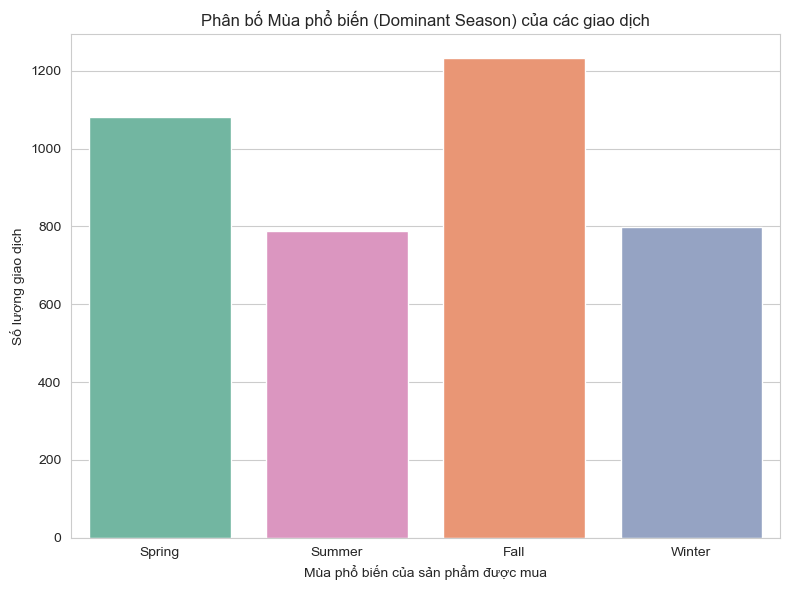

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df_processed,
    x="Dominant_Season",
    hue="Dominant_Season",
    palette="Set2",
    order=["Spring", "Summer", "Fall", "Winter"],
    legend=False,
)
plt.title("Phân bố Mùa phổ biến (Dominant Season) của các giao dịch", fontsize=12)
plt.xlabel("Mùa phổ biến của sản phẩm được mua", fontsize=10)
plt.ylabel("Số lượng giao dịch", fontsize=10)
plt.tight_layout()

save_path = os.path.join(new_features_dir, "dominant_season_distribution.png")
plt.savefig(save_path)
plt.show()


#####  Season và Dominant_Season truớc khi mã hóa bằng One-hot Encoding

In [111]:
display(df_processed)


Customer ID       Age Item Purchased  Purchase Amount (USD)  \
0               1  0.711538         Blouse                 0.4125   
1               2  0.019231        Sweater                 0.5500   
2               3  0.615385          Jeans                 0.6625   
3               4  0.057692        Sandals                 0.8750   
4               5  0.519231         Blouse                 0.3625   
...           ...       ...            ...                    ...   
3895         3896  0.423077         Hoodie                 0.1000   
3896         3897  0.653846       Backpack                 0.3625   
3897         3898  0.538462           Belt                 0.1625   
3898         3899  0.500000          Shoes                 0.7125   
3899         3900  0.653846        Handbag                 0.7625   

           Location Size      Color  Season  Review Rating  \
0          Kentucky    L       Gray  Winter           0.24   
1             Maine    L     Maroon  Winter           0.24   
2     Massachusetts    S     Maroon  Spring           0.24   
3      Rhode Island    M     Maroon  Spring           0.40   
4            Oregon    M  Turquoise  Spring           0.08   
...             ...  ...        ...     ...            ...   
3895       Virginia    L  Turquoise  Summer           0.68   
3896           Iowa    L      White  Spring           0.80   
3897     New Jersey    L      Green  Spring           0.16   
3898      Minnesota    S      Brown  Summer           0.52   
3899     California    M      Beige  Spring           0.24   

     Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                    Yes         Express              Yes             Yes   
1                    Yes         Express              Yes             Yes   
2                    Yes   Free Shipping              Yes             Yes   
3                    Yes    Next Day Air              Yes             Yes   
4                    Yes   Free Shipping              Yes             Yes   
...                  ...             ...              ...             ...   
3895                  No  2-Day Shipping               No              No   
3896                  No    Store Pickup               No              No   
3897                  No        Standard               No              No   
3898                  No         Express               No              No   
3899                  No    Store Pickup               No              No   

      Previous Purchases Payment Method Frequency of Purchases  Gender_Female  \
0               0.265306          Venmo            Fortnightly              0   
1               0.020408           Cash            Fortnightly              0   
2               0.448980    Credit Card                 Weekly              0   
3               0.979592         PayPal                 Weekly              0   
4               0.612245         PayPal               Annually              0   
...                  ...            ...                    ...            ...   
3895            0.632653          Venmo                 Weekly              1   
3896            0.816327  Bank Transfer              Bi-Weekly              1   
3897            0.469388          Venmo              Quarterly              1   
3898            0.469388          Venmo                 Weekly              1   
3899            0.653061          Venmo              Quarterly              1   

      Category_Accessories  Category_Clothing  Category_Footwear  \
0                        0                  1                  0   
1                        0                  1                  0   
2                        0                  1                  0   
3                        0                  0                  1   
4                        0                  1                  0   
...                    ...                ...                ...   
3895                     0                  1             

##### Mã hóa Season và Dominant_Season bằng One-hot Encoding

In [112]:
df_processed = pd.get_dummies(df_processed, columns=['Dominant_Season'], prefix='Dominant_Season', dtype=int)
print("Dữ liệu sau khi mã hóa Dominant_Season:")
display(df_processed.head())


Dữ liệu sau khi mã hóa Dominant_Season:


Customer ID       Age Item Purchased  Purchase Amount (USD)       Location  \
0            1  0.711538         Blouse                 0.4125       Kentucky   
1            2  0.019231        Sweater                 0.5500          Maine   
2            3  0.615385          Jeans                 0.6625  Massachusetts   
3            4  0.057692        Sandals                 0.8750   Rhode Island   
4            5  0.519231         Blouse                 0.3625         Oregon   

  Size      Color  Season  Review Rating Subscription Status  Shipping Type  \
0    L       Gray  Winter           0.24                 Yes        Express   
1    L     Maroon  Winter           0.24                 Yes        Express   
2    S     Maroon  Spring           0.24                 Yes  Free Shipping   
3    M     Maroon  Spring           0.40                 Yes   Next Day Air   
4    M  Turquoise  Spring           0.08                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes            0.265306          Venmo   
1              Yes             Yes            0.020408           Cash   
2              Yes             Yes            0.448980    Credit Card   
3              Yes             Yes            0.979592         PayPal   
4              Yes             Yes            0.612245         PayPal   

  Frequency of Purchases  Gender_Female  Category_Accessories  \
0            Fortnightly              0                     0   
1            Fortnightly              0                     0   
2                 Weekly              0                     0   
3                 Weekly              0                     0   
4               Annually              0                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  Location_encoded  \
0                  1                  0                   0                16   
1                  1                  0                   0                18   
2                  1                  0                   0                20   
3                  0                  1                   0                38   
4                  1                  0                   0                36   

   Size_encoded  Color_encoded  Subscription Status_encoded  \
0             0              7                            1   
1             0             12                            1   
2             2             12                            1   
3             1             12                            1   
4             1             21                            1   

   Shipping Type_encoded  Discount Applied_encoded  Payment Method_encoded  \
0                      1                         1                       5   
1                      1                         1                       1   
2                      2                         1                       2   
3                      3                         1                       4   
4                      2                         1                       4   

  Category_reconstructed                   Product_ID  Product_Category  \
0               Clothing       Blouse_Clothing_L_Gray   Blouse_Clothing   
1               Clothing    Sweater_Clothing_L_Maroon  Sweater_Clothing   
2               Clothing      Jeans_Clothing_S_Maroon    Jeans_Clothing   
3               Footwear    Sandals_Footwear_M_Maroon  Sandals_Footwear   
4               Clothing  Blouse_Clothing_M_Turquoise   Blouse_Clothing   

   Dominant_Season_Fall  Dominant_Season_Spring  Dominant_Season_Summer  \
0                     0                       1                       0   
1                     0                       1                       0   
2                     1                       0                       0   
3                     1                       0                       0   
4                     0                       1   

**Mục tiêu**: Xác định mùa phổ biến nhất cho mỗi loại mặt hàng (`Item Purchased`), giúp hiểu rõ hơn về tính thời vụ của sản phẩm.
- **Vấn đề:**
  - Mùa ảnh hưởng mạnh đến lựa chọn sản phẩm (ví dụ: áo khoác vào Winter), giúp gợi ý chính xác hơn.
- **Ý nghĩa:**
  - Đặc trưng này có thể hữu ích cho việc gợi ý sản phẩm theo ngữ cảnh mùa hiện tại.
  - Ví dụ: Nếu đang là mùa đông, hệ thống có thể ưu tiên gợi ý các sản phẩm có `Dominant_Season` là 'Winter'.

### 4.3.2) Tạo đặc trưng liên quan đến tương tác

#### Đặc trưng mới - `Customer_Loyalty_Score`

##### **Mục tiêu**: 

Tạo một điểm số tổng hợp thể hiện mức độ trung thành của khách hàng, kết hợp số lần mua trước, tần suất mua và trạng thái đăng ký.


##### **Lưu ý về trọng số:**

- Các trọng số (0.4, 0.4, 0.2) được chọn dựa trên phán đoán heuristic. Trong thực tế, các trọng số này có thể được tối ưu hóa bằng các kỹ thuật như phân tích thành phần chính (PCA) hoặc dựa trên kết quả đánh giá mô hình (ví dụ: grid search nếu điểm số này được dùng trực tiếp trong mô hình).

##### Danh sách tần suất mua hàng hiện tại

In [113]:
for freq in df_processed['Frequency of Purchases'].unique():
    print(f"[{freq}]")



[Fortnightly]
[Weekly]
[Annually]
[Quarterly]
[Bi-Weekly]
[Monthly]
[Every 3 Months]


##### Gán điểm số cho **Frequency of Purchases** dựa trên tân suất (cao hơn => thường xuyên hơn)

In [114]:
frequency_ranking = {
    "Annually": 1,
    "Quarterly": 2,
    "Every 3 Months": 2,
    "Monthly": 3,
    "Fortnightly": 4,
    "Weekly": 5,
    "Bi-Weekly": 6,
}

for item in frequency_ranking:
    print(f"[{item}] -> {frequency_ranking[item]}")


[Annually] -> 1
[Quarterly] -> 2
[Every 3 Months] -> 2
[Monthly] -> 3
[Fortnightly] -> 4
[Weekly] -> 5
[Bi-Weekly] -> 6


In [115]:
df_processed['Frequency_score'] = df_processed['Frequency of Purchases'].map(frequency_ranking)
display(df_processed['Frequency_score'])
print(f"Số lượng tần suất sau khi gán điểm:\n {df_processed['Frequency_score'].value_counts()}")


0       4
1       4
2       5
3       5
4       1
       ..
3895    5
3896    6
3897    2
3898    5
3899    2
Name: Frequency_score, Length: 3900, dtype: int64

Số lượng tần suất sau khi gán điểm:
 Frequency_score
2    1147
1     572
3     553
6     547
4     542
5     539
Name: count, dtype: int64


##### Chuẩn hóa điểm tần suất để có thể kết hợp với các biến đã chuẩn hóa khác

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler_freq = MinMaxScaler()
df_processed['Frequency_score'] = scaler_freq.fit_transform(df_processed[['Frequency_score']])
display(df_processed['Frequency_score'])


0       0.6
1       0.6
2       0.8
3       0.8
4       0.0
       ... 
3895    0.8
3896    1.0
3897    0.2
3898    0.8
3899    0.2
Name: Frequency_score, Length: 3900, dtype: float64

##### Tính `Customer_Loyalty_Score` từ **Previous Purchases** - **Frequency_score** - **Subscription Status_encoded**

- Tính điểm trung thành - sử dụng các biến đã được chuẩn hóa/mã hóa
- Previous Purchases đã được chuẩn hóa (mean 0, std 1)
- Frequency_score_scaled đã được chuẩn hóa (mean 0, std 1)
- Subscription Status_encoded là 0 (No) hoặc 1 (Yes)
- Lưu ý: Trọng số 0.4, 0.4, 0.2 là heuristic, có thể cần tối ưu hóa.

In [117]:
df_processed["Customer_Loyalty_Score"] = (
    df_processed["Previous Purchases"] * 0.4
    + df_processed["Frequency_score"] * 0.4
    + df_processed["Subscription Status_encoded"] * 0.2
)

display(df_processed["Customer_Loyalty_Score"])


0       0.546122
1       0.448163
2       0.699592
3       0.911837
4       0.444898
          ...   
3895    0.573061
3896    0.726531
3897    0.267755
3898    0.507755
3899    0.341224
Name: Customer_Loyalty_Score, Length: 3900, dtype: float64

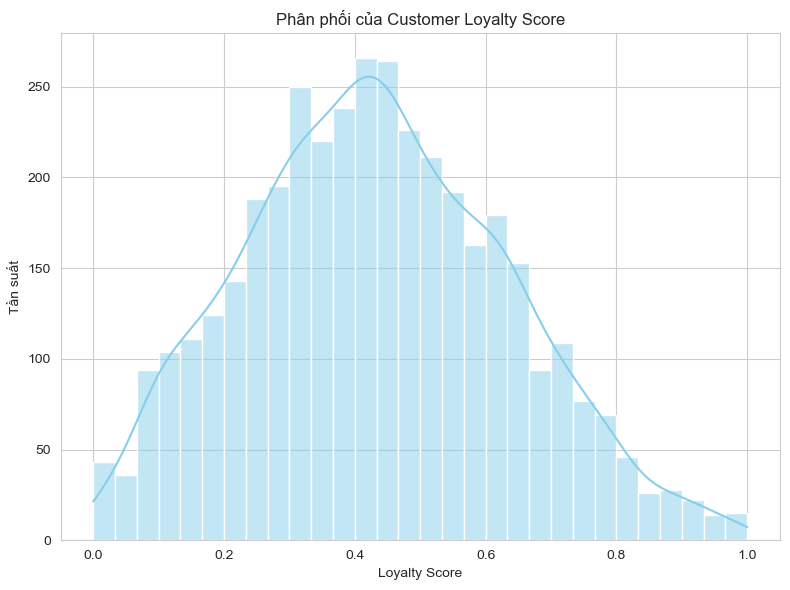

In [118]:
plt.figure(figsize=(8, 6))
sns.histplot(df_processed["Customer_Loyalty_Score"], kde=True, bins=30, color="skyblue")
plt.title("Phân phối của Customer Loyalty Score", fontsize=12)
plt.xlabel("Loyalty Score", fontsize=10)
plt.ylabel("Tần suất", fontsize=10)

save_path = os.path.join(
    new_features_dir, "Customer_Loyal_Score_distribution_MinMax.png"
)
plt.tight_layout()
plt.savefig(save_path)

plt.show()


In [119]:
display(df_processed.head())


Customer ID       Age Item Purchased  Purchase Amount (USD)       Location  \
0            1  0.711538         Blouse                 0.4125       Kentucky   
1            2  0.019231        Sweater                 0.5500          Maine   
2            3  0.615385          Jeans                 0.6625  Massachusetts   
3            4  0.057692        Sandals                 0.8750   Rhode Island   
4            5  0.519231         Blouse                 0.3625         Oregon   

  Size      Color  Season  Review Rating Subscription Status  Shipping Type  \
0    L       Gray  Winter           0.24                 Yes        Express   
1    L     Maroon  Winter           0.24                 Yes        Express   
2    S     Maroon  Spring           0.24                 Yes  Free Shipping   
3    M     Maroon  Spring           0.40                 Yes   Next Day Air   
4    M  Turquoise  Spring           0.08                 Yes  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases Payment Method  \
0              Yes             Yes            0.265306          Venmo   
1              Yes             Yes            0.020408           Cash   
2              Yes             Yes            0.448980    Credit Card   
3              Yes             Yes            0.979592         PayPal   
4              Yes             Yes            0.612245         PayPal   

  Frequency of Purchases  Gender_Female  Category_Accessories  \
0            Fortnightly              0                     0   
1            Fortnightly              0                     0   
2                 Weekly              0                     0   
3                 Weekly              0                     0   
4               Annually              0                     0   

   Category_Clothing  Category_Footwear  Category_Outerwear  Location_encoded  \
0                  1                  0                   0                16   
1                  1                  0                   0                18   
2                  1                  0                   0                20   
3                  0                  1                   0                38   
4                  1                  0                   0                36   

   Size_encoded  Color_encoded  Subscription Status_encoded  \
0             0              7                            1   
1             0             12                            1   
2             2             12                            1   
3             1             12                            1   
4             1             21                            1   

   Shipping Type_encoded  Discount Applied_encoded  Payment Method_encoded  \
0                      1                         1                       5   
1                      1                         1                       1   
2                      2                         1                       2   
3                      3                         1                       4   
4                      2                         1                       4   

  Category_reconstructed                   Product_ID  Product_Category  \
0               Clothing       Blouse_Clothing_L_Gray   Blouse_Clothing   
1               Clothing    Sweater_Clothing_L_Maroon  Sweater_Clothing   
2               Clothing      Jeans_Clothing_S_Maroon    Jeans_Clothing   
3               Footwear    Sandals_Footwear_M_Maroon  Sandals_Footwear   
4               Clothing  Blouse_Clothing_M_Turquoise   Blouse_Clothing   

   Dominant_Season_Fall  Dominant_Season_Spring  Dominant_Season_Summer  \
0                     0                       1                       0   
1                     0                       1                       0   
2                     1                       0                       0   
3                     1                       0                       0   
4                     0                       1   

#### Đặc trưng mới - `Interaction_Score`

##### **Mục tiêu**:


- Tạo ma trận biểu diễn sự tương tác giữa người dùng và sản phẩm, cần thiết cho các thuật toán lọc cộng tác.

- Tạo `Interaction_Score`: Kết hợp `Review Rating` và `Purchase Amount (USD)` (đã chuẩn hóa) để thể hiện mức độ tương tác/quan tâm của người dùng đối với sản phẩm.


##### **Lưu ý về trọng số:** 

- Trọng số 0.7 cho `Review Rating` và 0.3 cho `Purchase Amount` là heuristic, ưu tiên đánh giá của người dùng. Có thể điều chỉnh hoặc sử dụng các phương pháp khác để xác định điểm tương tác (ví dụ: chỉ dùng rating, hoặc dùng mô hình phức tạp hơn).

##### Tính `Interaction_Score` sử dụng các cột đã chuẩn hóa **Review Rating** - **Purchase Amount (USD)**

In [120]:
# Lưu ý: Trọng số 0.7 và 0.3 là heuristic, có thể cần tối ưu hóa.
df_processed['Interaction_Score'] = (df_processed['Review Rating'] * 0.7 + df_processed['Purchase Amount (USD)'] * 0.3)
display(df_processed['Interaction_Score'])


0       0.29175
1       0.33300
2       0.36675
3       0.54250
4       0.16475
         ...   
3895    0.50600
3896    0.66875
3897    0.16075
3898    0.57775
3899    0.39675
Name: Interaction_Score, Length: 3900, dtype: float64

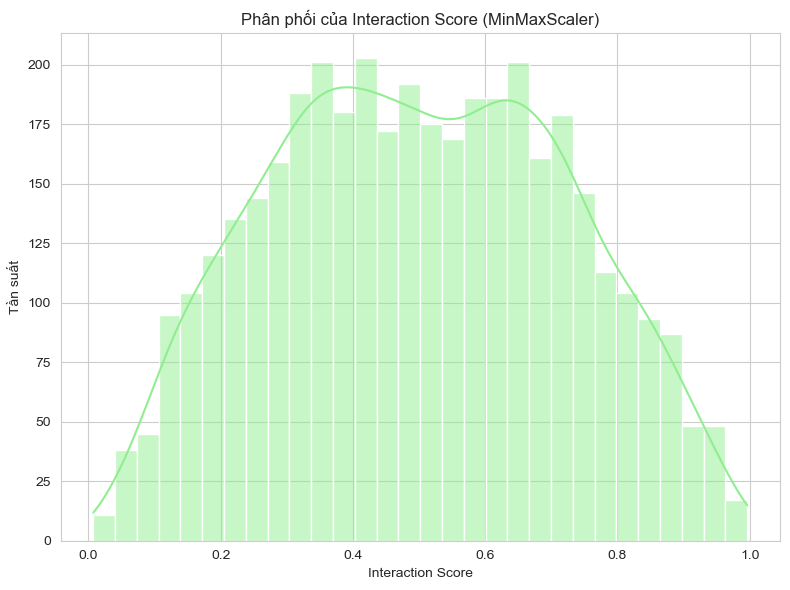

In [121]:
plt.figure(figsize=(8, 6))
sns.histplot(df_processed["Interaction_Score"], kde=True, bins=30, color="lightgreen")
plt.title("Phân phối của Interaction Score (MinMaxScaler)", fontsize=12)
plt.xlabel("Interaction Score", fontsize=10)
plt.ylabel("Tần suất", fontsize=10)

save_path = os.path.join(
    new_features_dir, "Interaction_Score_distribution_MinMax.png"
)
plt.tight_layout()
plt.savefig(save_path)

plt.show()


#### Đặc trưng mới - `User-Item` matrix

##### Tạo `User-Item` matrix từ **Interaction_Score** - **Customer ID** - **Product_Category**

In [122]:
user_item_matrix = df_processed.pivot_table(
    index="Customer ID",            # Mỗi dòng là ID
    columns="Product_Category",     # Mỗi cột là Item + category
    values="Interaction_Score",     # Mỗi ô là giá trị tương tác giữ người dùng
    aggfunc="mean",                 # Nếu có nhiều tương tác giữa 1 user & item => Lấy trung bình
).fillna(0)

display(user_item_matrix.head(10))


Product_Category  Backpack_Accessories  Belt_Accessories  Blouse_Clothing  \
Customer ID                                                                 
1                                  0.0               0.0          0.29175   
2                                  0.0               0.0          0.00000   
3                                  0.0               0.0          0.00000   
4                                  0.0               0.0          0.00000   
5                                  0.0               0.0          0.16475   
6                                  0.0               0.0          0.00000   
7                                  0.0               0.0          0.00000   
8                                  0.0               0.0          0.00000   
9                                  0.0               0.0          0.00000   
10                                 0.0               0.0          0.00000   

Product_Category  Boots_Footwear  Coat_Outerwear  Dress_Clothing  \
Customer ID                                                        
1                            0.0         0.00000             0.0   
2                            0.0         0.00000             0.0   
3                            0.0         0.00000             0.0   
4                            0.0         0.00000             0.0   
5                            0.0         0.00000             0.0   
6                            0.0         0.00000             0.0   
7                            0.0         0.00000             0.0   
8                            0.0         0.00000             0.0   
9                            0.0         0.31675             0.0   
10                           0.0         0.00000             0.0   

Product_Category  Gloves_Accessories  Handbag_Accessories  Hat_Accessories  \
Customer ID                                                                  
1                                0.0              0.00000              0.0   
2                                0.0              0.00000              0.0   
3                                0.0              0.00000              0.0   
4                                0.0              0.00000              0.0   
5                                0.0              0.00000              0.0   
6                                0.0              0.00000              0.0   
7                                0.0              0.00000              0.0   
8                                0.0              0.00000              0.0   
9                                0.0              0.00000              0.0   
10                               0.0              0.68525              0.0   

Product_Category  Hoodie_Clothing  Jacket_Outerwear  Jeans_Clothing  \
Customer ID                                                           
1                             0.0               0.0         0.00000   
2                             0.0               0.0         0.00000   
3                             0.0               0.0         0.36675   
4                             0.0               0.0         0.00000   
5                             0.0               0.0         0.00000   
6                             0.0               0.0         0.00000   
7                             0.0               0.0         0.00000   
8                             0.0               0.0         0.00000   
9                             0.0               0.0         0.00000   
10                            0.0               0.0         0.00000   

Product_Category  Jewelry_Accessories  Pants_Clothing  Sandals_Footwear  \
Customer ID                                                               
1                                 0.0             0.0            0.0000   
2                                 0.0             0.0            0.0000   
3                                 0.0             0.0            0.0000   
4                                 0.0             0.0            0.5425   
5                 

##### Kích thước ma trận `User-Item`

In [123]:
print(f"Kích thước ma trận User-Item: {user_item_matrix.shape}")


Kích thước ma trận User-Item: (3900, 25)


##### Hiển thị một phần nhỏ của heatmap do ma trận User-Item lớn

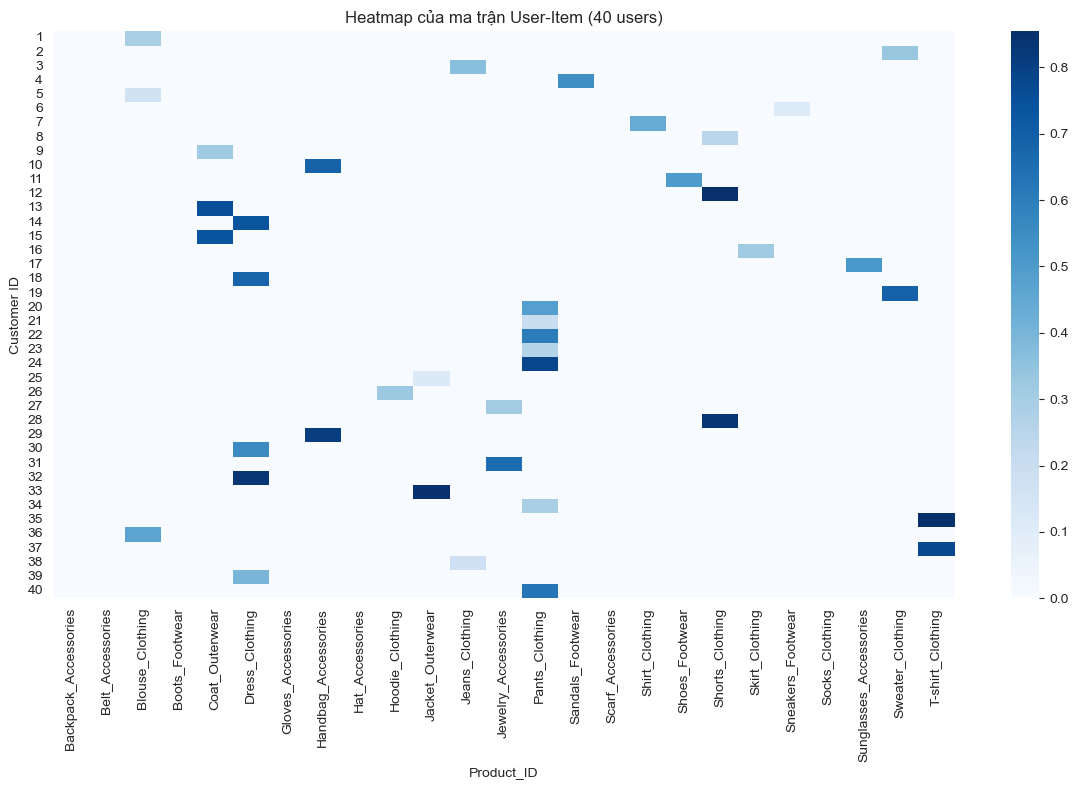

In [124]:
top_N = 40
plt.figure(figsize=(12, 8))
sns.heatmap(user_item_matrix.iloc[:top_N], cmap='Blues', cbar=True)
plt.title(f'Heatmap của ma trận User-Item ({top_N} users)')
plt.xlabel('Product_ID')
plt.ylabel('Customer ID')

plt.tight_layout()
save_path = os.path.join(new_features_dir, "Heatmap_User_Item_Matrix.png")
plt.savefig(save_path)
plt.show()


##### Tạo tập tin chứa ma trận `User-Item`  và lưu trong **Data_dir**

In [125]:
matrix_file_path = os.path.join(data_dir, "user_item_matrix.csv")
try:
    user_item_matrix.to_csv(matrix_file_path)
    print(f"Đã lưu ma trận User-Item: [ {matrix_file_path} ] vào Data_dir: [ {data_dir} ]")
except Exception as e:
    print(f"Lỗi khi lưu file: {e}")


Đã lưu ma trận User-Item: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data\user_item_matrix.csv ] vào Data_dir: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data ]


## [4.4] - Loại bỏ đặc trưng **không cần thiết** hoặc **dư thừa**

### **Lưu ý**

In [126]:
unnecessary_features_dropping_dir = os.path.join(feature_engineering_dir, "unnecessary_features_dropping")
print(f"Unnecessary_features_dropping path: [ {unnecessary_features_dropping_dir} ]")

os.makedirs(unnecessary_features_dropping_dir, exist_ok=True)
print(f"Created Unnecessary Features Dropping dir [ {unnecessary_features_dropping_dir} ] successfully!")


Unnecessary_features_dropping path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\unnecessary_features_dropping ]
Created Unnecessary Features Dropping dir [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\unnecessary_features_dropping ] successfully!


### 4.4.1) Loại bỏ các cột không cần thiết

In [127]:
cols_to_drop = [
    'Promo Code Used',
    'Gender', 'Category', 'Location', 'Size', 'Color',
    'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied',
    'Frequency of Purchases', 'Frequency_score', 'Product_ID', 'Purchase Amount (USD)',
    'Season'
]

cols_to_drop_existing = [col for col in cols_to_drop if col in df_processed.columns]
print("Các cột không cần thiết cần loại bỏ:")
for i, col in enumerate(cols_to_drop_existing):
    print(f"{i + 1}. [{col}]")
    
df_final_features = df_processed.drop(columns=cols_to_drop_existing)
print(f"Đã loại bỏ {len(cols_to_drop_existing)} cột.")


Các cột không cần thiết cần loại bỏ:
1. [Promo Code Used]
2. [Location]
3. [Size]
4. [Color]
5. [Subscription Status]
6. [Payment Method]
7. [Shipping Type]
8. [Discount Applied]
9. [Frequency of Purchases]
10. [Frequency_score]
11. [Product_ID]
12. [Purchase Amount (USD)]
13. [Season]
Đã loại bỏ 13 cột.


### 4.4.2) Các còn lại sau khi loại

In [128]:
print("Các cột còn lại:")
for final_col in df_final_features.columns.tolist():
    print(f"[{final_col}]")
print(f"Số cột còn lại sau khi loại bỏ: {len(df_final_features.columns)}")
display(df_final_features.head())


Các cột còn lại:
[Customer ID]
[Age]
[Item Purchased]
[Review Rating]
[Previous Purchases]
[Gender_Female]
[Category_Accessories]
[Category_Clothing]
[Category_Footwear]
[Category_Outerwear]
[Location_encoded]
[Size_encoded]
[Color_encoded]
[Subscription Status_encoded]
[Shipping Type_encoded]
[Discount Applied_encoded]
[Payment Method_encoded]
[Category_reconstructed]
[Product_Category]
[Dominant_Season_Fall]
[Dominant_Season_Spring]
[Dominant_Season_Summer]
[Dominant_Season_Winter]
[Customer_Loyalty_Score]
[Interaction_Score]
Số cột còn lại sau khi loại bỏ: 25


Customer ID       Age Item Purchased  Review Rating  Previous Purchases  \
0            1  0.711538         Blouse           0.24            0.265306   
1            2  0.019231        Sweater           0.24            0.020408   
2            3  0.615385          Jeans           0.24            0.448980   
3            4  0.057692        Sandals           0.40            0.979592   
4            5  0.519231         Blouse           0.08            0.612245   

   Gender_Female  Category_Accessories  Category_Clothing  Category_Footwear  \
0              0                     0                  1                  0   
1              0                     0                  1                  0   
2              0                     0                  1                  0   
3              0                     0                  0                  1   
4              0                     0                  1                  0   

   Category_Outerwear  Location_encoded  Size_encoded  Color_encoded  \
0                   0                16             0              7   
1                   0                18             0             12   
2                   0                20             2             12   
3                   0                38             1             12   
4                   0                36             1             21   

   Subscription Status_encoded  Shipping Type_encoded  \
0                            1                      1   
1                            1                      1   
2                            1                      2   
3                            1                      3   
4                            1                      2   

   Discount Applied_encoded  Payment Method_encoded Category_reconstructed  \
0                         1                       5               Clothing   
1                         1                       1               Clothing   
2                         1                       2               Clothing   
3                         1                       4               Footwear   
4                         1                       4               Clothing   

   Product_Category  Dominant_Season_Fall  Dominant_Season_Spring  \
0   Blouse_Clothing                     0                       1   
1  Sweater_Clothing                     0                       1   
2    Jeans_Clothing                     1                       0   
3  Sandals_Footwear                     1                       0   
4   Blouse_Clothing                     0                       1   

   Dominant_Season_Summer  Dominant_Season_Winter  Customer_Loyalty_Score  \
0                       0                       0                0.546122   
1                       0                       0                0.448163   
2                       0                       0                0.699592   
3                       0                       0                0.911837   
4                       0                       0                0.444898   

   Interaction_Score  
0            0.29175  
1            0.33300  
2            0.36675  
3            0.54250  
4            0.16475

### 4.4.3) Kiểm tra các đặc trưng có phương sai cao (High Variance)

- Các đặc trưng có phương sai thấp (gần như hằng số) không cung cấp nhiều thông tin hữu ích cho mô hình và có thể bị loại bỏ.

In [129]:
numeric_features = df_final_features.select_dtypes(include=['int32', 'int64', 'float64'])
display(numeric_features)


Customer ID       Age  Review Rating  Previous Purchases  Gender_Female  \
0               1  0.711538           0.24            0.265306              0   
1               2  0.019231           0.24            0.020408              0   
2               3  0.615385           0.24            0.448980              0   
3               4  0.057692           0.40            0.979592              0   
4               5  0.519231           0.08            0.612245              0   
...           ...       ...            ...                 ...            ...   
3895         3896  0.423077           0.68            0.632653              1   
3896         3897  0.653846           0.80            0.816327              1   
3897         3898  0.538462           0.16            0.469388              1   
3898         3899  0.500000           0.52            0.469388              1   
3899         3900  0.653846           0.24            0.653061              1   

      Category_Accessories  Category_Clothing  Category_Footwear  \
0                        0                  1                  0   
1                        0                  1                  0   
2                        0                  1                  0   
3                        0                  0                  1   
4                        0                  1                  0   
...                    ...                ...                ...   
3895                     0                  1                  0   
3896                     1                  0                  0   
3897                     1                  0                  0   
3898                     0                  0                  1   
3899                     1                  0                  0   

      Category_Outerwear  Location_encoded  Size_encoded  Color_encoded  \
0                      0                16             0              7   
1                      0                18             0             12   
2                      0                20             2             12   
3                      0                38             1             12   
4                      0                36             1             21   
...                  ...               ...           ...            ...   
3895                   0                45             0             21   
3896                   0                14             0             23   
3897                   0                29             0              8   
3898                   0                22             2              3   
3899                   0                 4             1              0   

      Subscription Status_encoded  Shipping Type_encoded  \
0                               1                      1   
1                               1                      1   
2                               1                      2   
3                               1                      3   
4                               1                      2   
...                           ...                    ...   
3895                            0                      0   
3896                            0                      5   
3897                            0                      4   
3898                            0                      1   
3899                            0                      5   

      Discount Applied_encoded  Payment Method_encoded  Dominant_Season_Fall  \
0                            1                       5                     0   
1                            1                       1                     0   
2                            1                       2                     1   
3                            1                       4                     1   
4                            1                       4                     0   
...                        ...                     ...                   ...   
3895                         0    

In [130]:
variances = numeric_features.var()
display(variances)


Customer ID                    1.267825e+06
Age                            8.552913e-02
Review Rating                  8.207602e-02
Previous Purchases             8.693021e-02
Gender_Female                  2.176558e-01
Category_Accessories           2.169129e-01
Category_Clothing              2.470805e-01
Category_Footwear              1.300333e-01
Category_Outerwear             7.619469e-02
Location_encoded               2.057302e+02
Size_encoded                   8.658220e-01
Color_encoded                  5.215138e+01
Subscription Status_encoded    1.971506e-01
Shipping Type_encoded          2.881815e+00
Discount Applied_encoded       2.451629e-01
Payment Method_encoded         2.858274e+00
Dominant_Season_Fall           2.161617e-01
Dominant_Season_Spring         2.005166e-01
Dominant_Season_Summer         1.611150e-01
Dominant_Season_Winter         1.629411e-01
Customer_Loyalty_Score         4.020746e-02
Interaction_Score              4.920266e-02
dtype: float64

In [131]:
variances_df = pd.DataFrame({'Feature': variances.index, 'Variance': variances.values})
display(variances_df)


Feature      Variance
0                   Customer ID  1.267825e+06
1                           Age  8.552913e-02
2                 Review Rating  8.207602e-02
3            Previous Purchases  8.693021e-02
4                 Gender_Female  2.176558e-01
5          Category_Accessories  2.169129e-01
6             Category_Clothing  2.470805e-01
7             Category_Footwear  1.300333e-01
8            Category_Outerwear  7.619469e-02
9              Location_encoded  2.057302e+02
10                 Size_encoded  8.658220e-01
11                Color_encoded  5.215138e+01
12  Subscription Status_encoded  1.971506e-01
13        Shipping Type_encoded  2.881815e+00
14     Discount Applied_encoded  2.451629e-01
15       Payment Method_encoded  2.858274e+00
16         Dominant_Season_Fall  2.161617e-01
17       Dominant_Season_Spring  2.005166e-01
18       Dominant_Season_Summer  1.611150e-01
19       Dominant_Season_Winter  1.629411e-01
20       Customer_Loyalty_Score  4.020746e-02
21            Interaction_Score  4.920266e-02

#### 10 đặc trưng có phương sai cao nhất

In [132]:
variances_df = variances_df.sort_values('Variance', ascending=False)
print("10 đặc trưng có phương sai cao nhất trong df_final_features:")
display(variances_df)


10 đặc trưng có phương sai cao nhất trong df_final_features:


Feature      Variance
0                   Customer ID  1.267825e+06
9              Location_encoded  2.057302e+02
11                Color_encoded  5.215138e+01
13        Shipping Type_encoded  2.881815e+00
15       Payment Method_encoded  2.858274e+00
10                 Size_encoded  8.658220e-01
6             Category_Clothing  2.470805e-01
14     Discount Applied_encoded  2.451629e-01
4                 Gender_Female  2.176558e-01
5          Category_Accessories  2.169129e-01
16         Dominant_Season_Fall  2.161617e-01
17       Dominant_Season_Spring  2.005166e-01
12  Subscription Status_encoded  1.971506e-01
19       Dominant_Season_Winter  1.629411e-01
18       Dominant_Season_Summer  1.611150e-01
7             Category_Footwear  1.300333e-01
3            Previous Purchases  8.693021e-02
1                           Age  8.552913e-02
2                 Review Rating  8.207602e-02
8            Category_Outerwear  7.619469e-02
21            Interaction_Score  4.920266e-02
20       Customer_Loyalty_Score  4.020746e-02

#### Ngưỡng phương sai

In [133]:
# Loại bỏ các đặc trưng có phương sai cao nhưng giữ lại Customer ID
high_variance_threshold = 1
high_variance_features = variances_df[
    (variances_df["Variance"] > high_variance_threshold)  
]["Feature"].tolist()

print(f"\nCác đặc trưng có phương sai > {high_variance_threshold}:")
print(high_variance_features)



Các đặc trưng có phương sai > 1:
['Customer ID', 'Location_encoded', 'Color_encoded', 'Shipping Type_encoded', 'Payment Method_encoded']


**Nhận xét:**
- Phân tích phương sai giúp xác định các đặc trưng có ít sự biến thiên.
- Các đặc trưng có phương sai thấp như `Category_*` có thể do chúng là biến one-hot.
- Cẩn thận với các biến one-hot vì độ phổ biến thấp không đồng nghĩa với không quan trọng.

#### Phân phối của các đặc trưng có phương sai cao

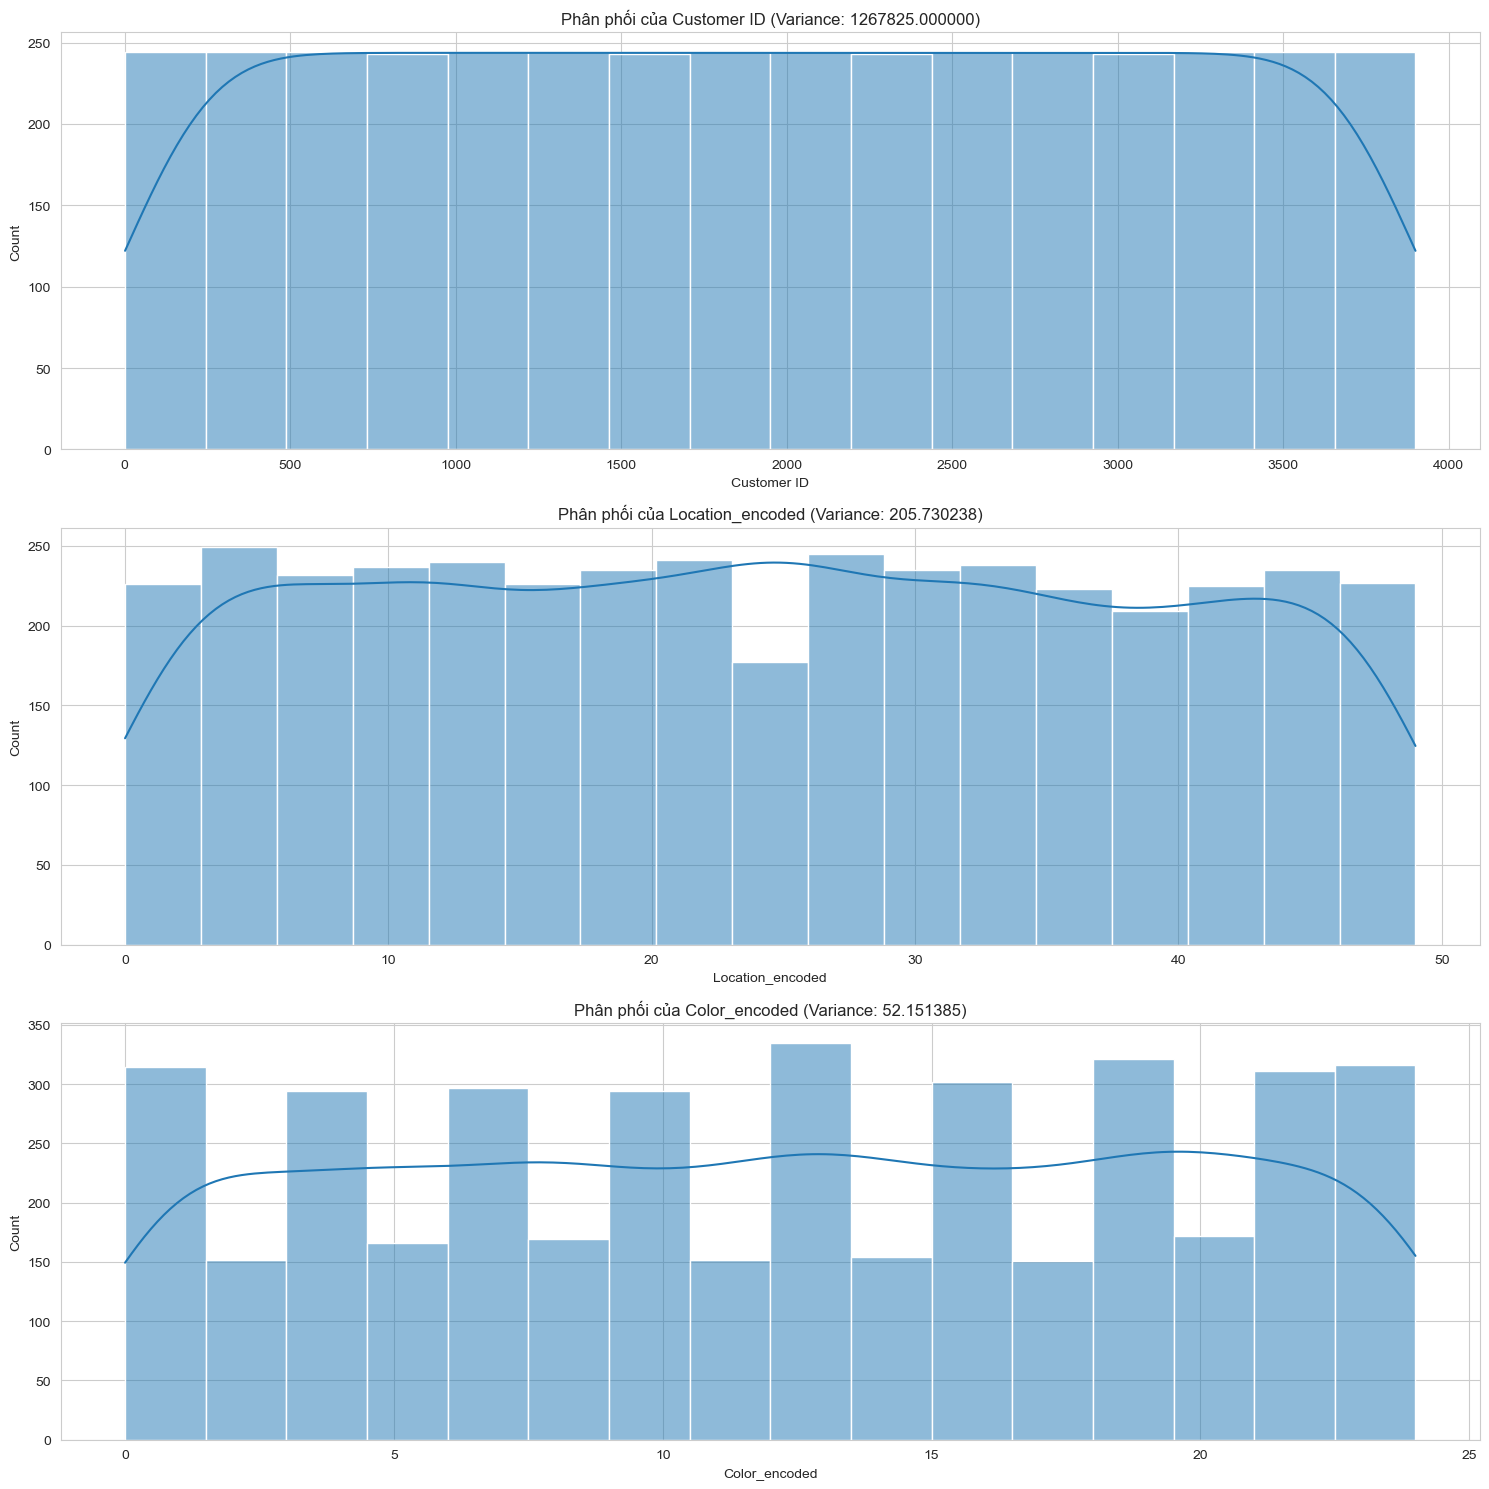

In [134]:
if high_variance_features:
    plt.figure(figsize=(15, 5 * min(3, len(high_variance_features))))
    for i, feature in enumerate(high_variance_features[:3]):
        plt.subplot(min(3, len(high_variance_features)), 1, i+1)
        sns.histplot(df_processed[feature], kde=True)
        plt.title(f'Phân phối của {feature} (Variance: {variances[feature]:.6f})')
    plt.tight_layout()
    save_path = os.path.join(unnecessary_features_dropping_dir, "features_with_high_variaces")
    plt.savefig(save_path)
    plt.show()
else:
    print("Không có đặc trưng nào có phương sai cao hơn ngưỡng.")


**Nhận xét:**
- Phân tích phương sai giúp chúng ta xác định các đặc trưng có rất ít sự biến thiên (gần như hằng số).
- Các đặc trưng có phương sai thấp như `Category_*` có thể do chúng là biến one-hot, chỉ nhận giá trị 0 hoặc 1, và sự phân bố không đồng đều giữa các danh mục.
- Nếu có bất kỳ đặc trưng nào có phương sai gần như bằng 0, chúng ta nên cân nhắc loại bỏ vì chúng không cung cấp thông tin phân biệt.
- Tuy nhiên, cần cẩn thận với các biến one-hot vì độ phổ biến thấp của một danh mục không đồng nghĩa với việc nó không quan trọng.

#### Kiểm tra đặc trưng nhị phân trong df_final_features

In [135]:
binary_features = [col for col in df_final_features.columns if set(df_final_features[col].unique()).issubset({0, 1})]
print("\nCác đặc trưng nhị phân trong df_final_features:", binary_features)

# Tỷ lệ giá trị phổ biến nhất trong các đặc trưng nhị phân
print("\nTỷ lệ giá trị phổ biến nhất trong các đặc trưng nhị phân:")
for col in binary_features:
    value_counts = df_final_features[col].value_counts(normalize=True)
    most_common_value = value_counts.index[0]
    most_common_ratio = value_counts.iloc[0]
    print(f"{col}: {most_common_value} ({most_common_ratio:.2%})")



Các đặc trưng nhị phân trong df_final_features: ['Gender_Female', 'Category_Accessories', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Subscription Status_encoded', 'Discount Applied_encoded', 'Dominant_Season_Fall', 'Dominant_Season_Spring', 'Dominant_Season_Summer', 'Dominant_Season_Winter']

Tỷ lệ giá trị phổ biến nhất trong các đặc trưng nhị phân:
Gender_Female: 0 (68.00%)
Category_Accessories: 0 (68.21%)
Category_Clothing: 0 (55.46%)
Category_Footwear: 0 (84.64%)
Category_Outerwear: 0 (91.69%)
Subscription Status_encoded: 0 (73.00%)
Discount Applied_encoded: 0 (57.00%)
Dominant_Season_Fall: 0 (68.41%)
Dominant_Season_Spring: 0 (72.26%)
Dominant_Season_Summer: 0 (79.82%)
Dominant_Season_Winter: 0 (79.51%)


#### Loại bỏ các đặc trưng có phương sai cao (bảo vệ đặc trưng Category_*)

In [136]:
additional_cols_to_drop = [col for col in high_variance_features if not col.startswith('Category_') and col in df_final_features.columns]

print(f"\nĐặc trưng đề xuất loại bỏ (phương sai cao) (ngoại trừ Category_*): {additional_cols_to_drop}")

if additional_cols_to_drop:
    df_final_features = df_final_features.drop(columns=additional_cols_to_drop)
    print(f"Đã loại bỏ thêm {len(additional_cols_to_drop)} đặc trưng. Số đặc trưng còn lại: {len(df_final_features.columns)}")
else:
    print("Không có đặc trưng nào được đề xuất loại bỏ thêm.")

# Hiển thị các cột còn lại
print("\nCác cột còn lại trong df_final_features:")
for final_col in df_final_features.columns.tolist():
    print(f"[{final_col}]")
print(f"Số cột còn lại sau khi loại bỏ: {len(df_final_features.columns)}")



Đặc trưng đề xuất loại bỏ (phương sai cao) (ngoại trừ Category_*): ['Customer ID', 'Location_encoded', 'Color_encoded', 'Shipping Type_encoded', 'Payment Method_encoded']
Đã loại bỏ thêm 5 đặc trưng. Số đặc trưng còn lại: 20

Các cột còn lại trong df_final_features:
[Age]
[Item Purchased]
[Review Rating]
[Previous Purchases]
[Gender_Female]
[Category_Accessories]
[Category_Clothing]
[Category_Footwear]
[Category_Outerwear]
[Size_encoded]
[Subscription Status_encoded]
[Discount Applied_encoded]
[Category_reconstructed]
[Product_Category]
[Dominant_Season_Fall]
[Dominant_Season_Spring]
[Dominant_Season_Summer]
[Dominant_Season_Winter]
[Customer_Loyalty_Score]
[Interaction_Score]
Số cột còn lại sau khi loại bỏ: 20


## [4.5] - Lựa chọn đặc trưng (Feature Selection)

In [137]:
features_selection_dir = os.path.join(feature_engineering_dir, "features_selection")
print(f"Features_selection path: [ {features_selection_dir} ]")

os.makedirs(features_selection_dir, exist_ok=True)
print(f"Created Features Selection dir [ {features_selection_dir} ] successfully!")


Features_selection path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\features_selection ]
Created Features Selection dir [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\features_selection ] successfully!


### 4.5.1) Dựa vào Ma trận tương quan (Correlation Matrix) giữa các biến cuối cùng

Age  Review Rating  Previous Purchases  \
Age                          1.000000      -0.021949            0.040445   
Review Rating               -0.021949       1.000000            0.004229   
Previous Purchases           0.040445       0.004229            1.000000   
Gender_Female               -0.002763      -0.008164           -0.035873   
Category_Accessories         0.006993       0.017810            0.017690   
Category_Clothing           -0.016826      -0.033543           -0.009451   
Category_Footwear            0.010476       0.024211           -0.003524   
Category_Outerwear           0.004816      -0.001276           -0.008226   
Size_encoded                -0.023654       0.027603           -0.011152   
Subscription Status_encoded  0.006492      -0.006368            0.030859   
Discount Applied_encoded     0.004366      -0.012486            0.023537   
Dominant_Season_Fall         0.010833       0.018380           -0.056630   
Dominant_Season_Spring      -0.021094       0.006762            0.035428   
Dominant_Season_Summer       0.027316      -0.005361            0.033761   
Dominant_Season_Winter      -0.016240      -0.023339           -0.007647   
Customer_Loyalty_Score       0.015201      -0.009155            0.600200   
Interaction_Score           -0.024018       0.916414            0.007052   

                             Gender_Female  Category_Accessories  \
Age                              -0.002763              0.006993   
Review Rating                    -0.008164              0.017810   
Previous Purchases               -0.035873              0.017690   
Gender_Female                     1.000000             -0.005666   
Category_Accessories             -0.005666              1.000000   
Category_Clothing                 0.000177             -0.611845   
Category_Footwear                 0.011160             -0.290844   
Category_Outerwear               -0.005337             -0.205515   
Size_encoded                     -0.018764              0.033260   
Subscription Status_encoded      -0.417197             -0.000992   
Discount Applied_encoded         -0.595823              0.010899   
Dominant_Season_Fall              0.023365              0.090358   
Dominant_Season_Spring           -0.007661             -0.250901   
Dominant_Season_Summer           -0.024434              0.302890   
Dominant_Season_Winter            0.005883             -0.126930   
Customer_Loyalty_Score           -0.198054              0.009216   
Interaction_Score                -0.001757              0.016960   

                             Category_Clothing  Category_Footwear  \
Age                                  -0.016826           0.010476   
Review Rating                        -0.033543           0.024211   
Previous Purchases                   -0.009451          -0.003524   
Gender_Female                         0.000177           0.011160   
Category_Accessories                 -0.611845          -0.290844   
Category_Clothing                     1.000000          -0.381735   
Category_Footwear                    -0.381735           1.000000   
Category_Outerwear                   -0.269740          -0.128223   
Size_encoded                         -0.009671          -0.012903   
Subscription Status_encoded          -0.013933           0.014849   
Discount Applied_encoded             -0.016579           0.002054   
Dominant_Season_Fall                 -0.119539          -0.044704   
Dominant_Season_Spring                0.011631           0.195074   
Dominant_Season_Summer               -0.237191           0.051608   
Dominant_Season_Winter                0.360639          -0.216229   
Customer_Loyalty_Score               -0.012557           0.007347   
Interaction_Score                    -0.026372           0.025426   

                             Category_Outerwear  Size_encoded  \
Age                                    0.004816     -0.023654   
Review Rating                         -0.001276      0.027603   
Pr

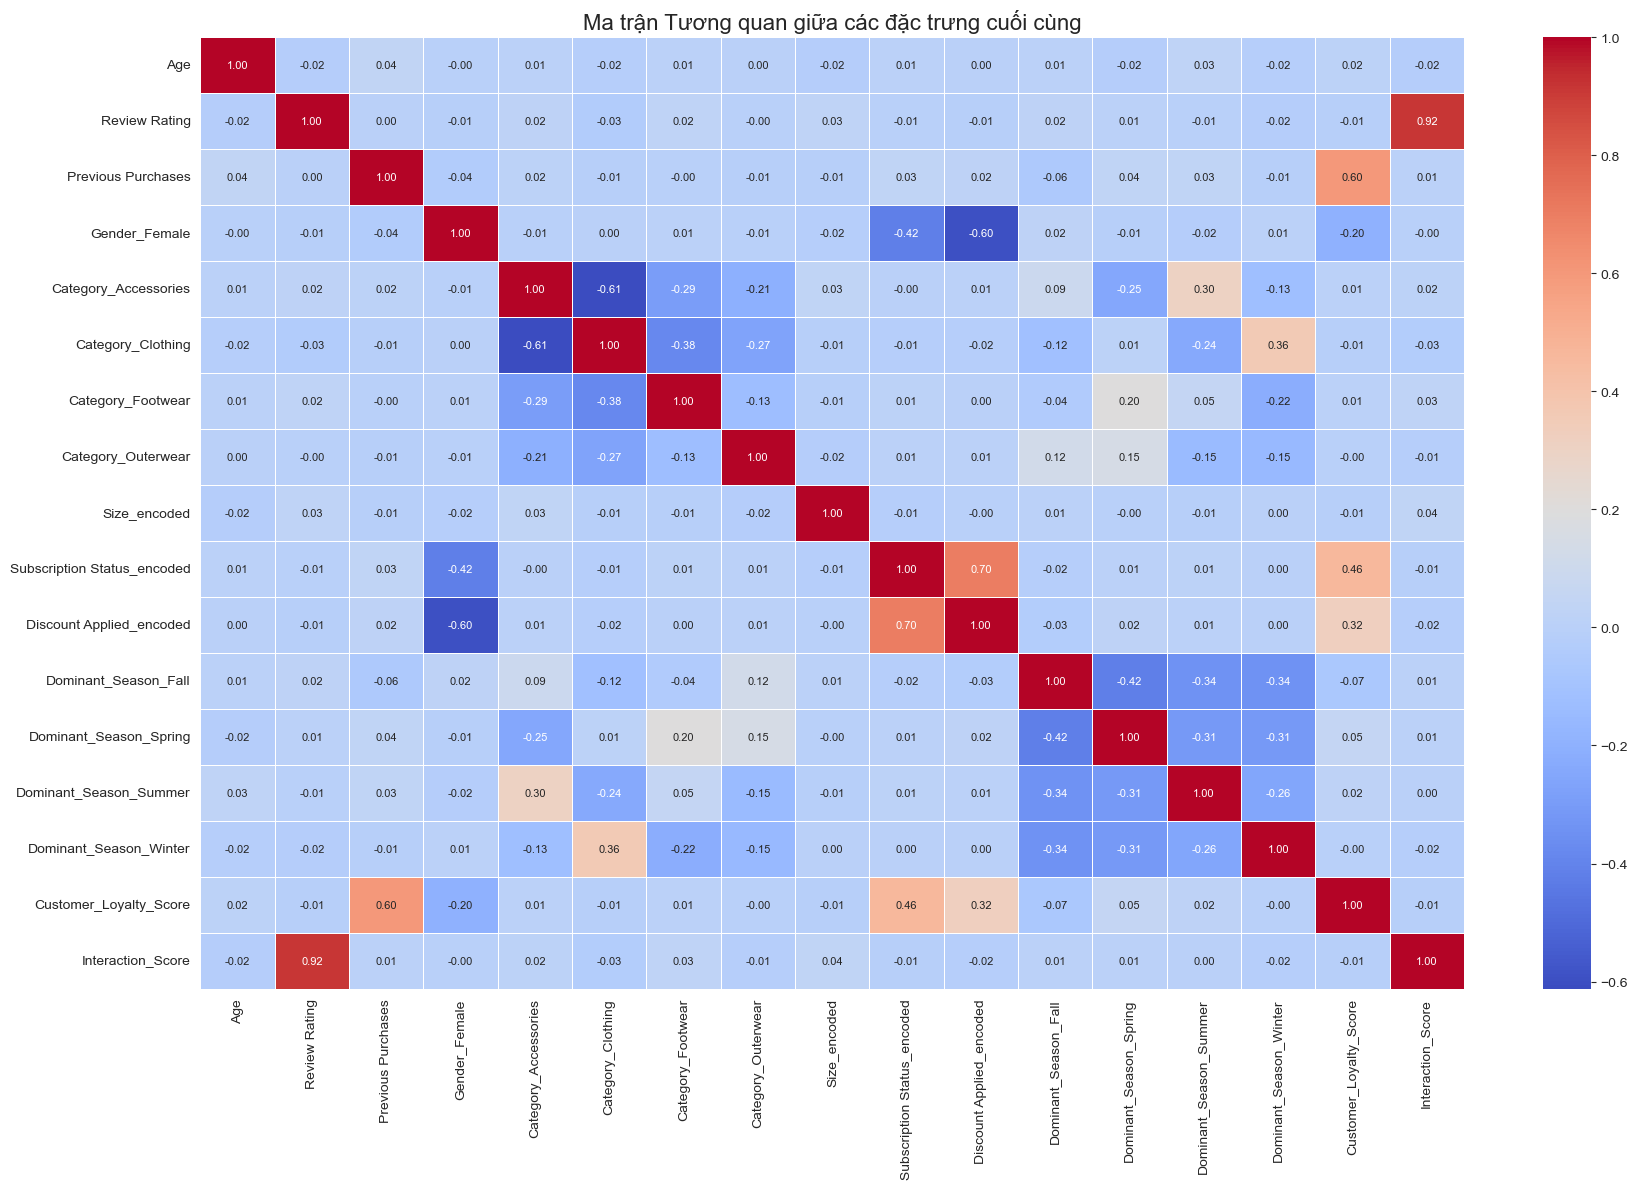

In [138]:
plt.figure(figsize=(18, 12))
correlation_matrix_final = df_final_features.corr(numeric_only=True)
display(correlation_matrix_final)
sns.heatmap(
    correlation_matrix_final,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8},
)

plt.title("Ma trận Tương quan giữa các đặc trưng cuối cùng", fontsize=16)
plt.yticks(rotation=0)

correlation_matrix_dir = os.path.join(features_selection_dir, "Correlation_Matrix")

os.makedirs(correlation_matrix_dir, exist_ok=True)

save_path = os.path.join(
    correlation_matrix_dir, "Heapmap_correlation_final_features_plot.png"
)
plt.savefig(save_path)

plt.tight_layout()
plt.show()


#### Tìm các cặp tương quan cao

In [139]:
# Đặt ngưỡng tương quan
threshold = 0.8
corr_pairs = correlation_matrix_final.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]

# Lấy giá trị tuyệt đối của ma trận tương quan
corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
strong_corr_pairs = corr_pairs[corr_pairs['Abs Correlation'] > threshold].sort_values(by='Abs Correlation', ascending=False)
strong_corr_pairs = strong_corr_pairs.drop_duplicates(subset=['Abs Correlation'])

# Hiển thị các cặp có tương quan cao
print(f"Các cặp tương quan mạnh (theo giá trị tuyệt đối, threshold = {threshold}):")
print(strong_corr_pairs[['Feature 1', 'Feature 2', 'Correlation']])


Các cặp tương quan mạnh (theo giá trị tuyệt đối, threshold = 0.8):
        Feature 1          Feature 2  Correlation
33  Review Rating  Interaction_Score     0.916414


#### Tìm các cặp độ tương quan thấp (tham khảo)

In [140]:
low_threshold = 0.3  # Chỉ để kiểm tra, không dùng để loại bỏ
low_corr_pairs = corr_pairs[(corr_pairs['Abs Correlation'] < low_threshold) & (corr_pairs['Abs Correlation'] > 0)].sort_values(by='Abs Correlation')
low_corr_pairs = low_corr_pairs.drop_duplicates(subset=['Abs Correlation'])
print(f"\nCác cặp tương quan thấp (theo giá trị tuyệt đối, threshold < {low_threshold}):")
print(low_corr_pairs[['Feature 1', 'Feature 2', 'Correlation']])



Các cặp tương quan thấp (theo giá trị tuyệt đối, threshold < 0.3):
                  Feature 1                    Feature 2  Correlation
88        Category_Clothing                Gender_Female     0.000177
247  Dominant_Season_Winter  Subscription Status_encoded     0.000386
77     Category_Accessories  Subscription Status_encoded    -0.000992
269  Customer_Loyalty_Score       Dominant_Season_Winter    -0.001215
120      Category_Outerwear                Review Rating    -0.001276
..                      ...                          ...          ...
226  Dominant_Season_Summer            Category_Clothing    -0.237191
80     Category_Accessories       Dominant_Season_Spring    -0.250901
235  Dominant_Season_Summer       Dominant_Season_Winter    -0.255223
124      Category_Outerwear            Category_Clothing    -0.269740
106       Category_Footwear         Category_Accessories    -0.290844

[120 rows x 3 columns]


#### Quyết định loại bỏ đặc trưng (chỉ loại bỏ tương quan cao)

In [141]:
cols_to_drop_corr = []
for _, row in strong_corr_pairs.iterrows():
    feature1, feature2 = row["Feature 1"], row["Feature 2"]
    # Giữ Interaction_Score vì là đặc trưng tổng hợp
    if feature1 == "Interaction_Score":
        cols_to_drop_corr.append(feature2)
    elif feature2 == "Interaction_Score":
        cols_to_drop_corr.append(feature1)

cols_to_drop_corr = list(set(cols_to_drop_corr))
print(f"\nĐặc trưng đề xuất loại bỏ (tương quan cao): {cols_to_drop_corr}")



Đặc trưng đề xuất loại bỏ (tương quan cao): ['Review Rating']


In [142]:
if cols_to_drop_corr:
    df_final_features = df_final_features.drop(columns=cols_to_drop_corr)
    print(f"Đã loại bỏ {len(cols_to_drop_corr)} đặc trưng do tương quan cao. Số đặc trưng còn lại: {len(df_final_features.columns)}")
else:
    print("Không có đặc trưng nào được đề xuất loại bỏ do tương quan cao.")

print("\nCác cột còn lại trong df_final_features:")
for final_col in df_final_features.columns.tolist():
    print(f"[{final_col}]")
print(f"Số cột còn lại sau khi loại bỏ: {len(df_final_features.columns)}")


Đã loại bỏ 1 đặc trưng do tương quan cao. Số đặc trưng còn lại: 19

Các cột còn lại trong df_final_features:
[Age]
[Item Purchased]
[Previous Purchases]
[Gender_Female]
[Category_Accessories]
[Category_Clothing]
[Category_Footwear]
[Category_Outerwear]
[Size_encoded]
[Subscription Status_encoded]
[Discount Applied_encoded]
[Category_reconstructed]
[Product_Category]
[Dominant_Season_Fall]
[Dominant_Season_Spring]
[Dominant_Season_Summer]
[Dominant_Season_Winter]
[Customer_Loyalty_Score]
[Interaction_Score]
Số cột còn lại sau khi loại bỏ: 19


"**Nhận xét:**
- Ma trận tương quan cho thấy hầu hết các đặc trưng có độ tương quan thấp với nhau, với ngưỡng tương quan cao (> 0.8) chỉ xuất hiện giữa `Interaction_Score` và `Review Rating`, dẫn đến việc loại bỏ `Review Rating` để tránh đa cộng tuyến vì `Interaction_Score` được xây dựng một phần dựa trên `Review Rating`.


- Không có cặp tương quan nghịch đảo hoàn hảo (như `Gender_Female` và `Gender_Male`) cần xử lý thêm, vì `Gender_Male` đã được loại bỏ ở các bước trước.

- Các đặc trưng như `Purchase Amount (USD)` và `Customer_Loyalty_Score` có tương quan rất thấp (gần 0), cho thấy chúng mang thông tin độc lập và hữu ích.

- `Interaction_Score` không cho thấy tương quan mạnh với các đặc trưng khác ngoài `Review Rating`, điều này phù hợp vì nó được tổng hợp từ nhiều yếu tố, trong đó `Review Rating` là thành phần chính.

- Nhìn chung, không có dấu hiệu rõ ràng về đa cộng tuyến nghiêm trọng sau khi loại bỏ `Review Rating`, và các đặc trưng còn lại có thể được giữ lại cho các bước phân tích tiếp theo."

### 4.5.2) Dựa vào Model-Based Methods (Feature Importance)

- Sử dụng RandomForestRegressor để đánh giá tầm quan trọng của các đặc trưng trong việc dự đoán `Interaction_Score` (một proxy cho mức độ yêu thích sản phẩm).

In [143]:
feature_importances_dir = os.path.join(features_selection_dir, "Feature_importances")

os.makedirs(feature_importances_dir, exist_ok=True)


#### Chuẩn hóa tên cột trong df_final_features để khớp với X_model

In [144]:
df_final_features.columns = df_final_features.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)


#### Kiểm tra các cột sau khi đồng bộ

In [145]:
print("Các cột trong df_final_features sau khi đồng bộ:")
for col in df_final_features.columns.tolist():
    print(f"[{col}]")
print(f"Số cột trong df_final_features: {len(df_final_features.columns)}")
display(df_final_features)


Các cột trong df_final_features sau khi đồng bộ:
[Age]
[ItemPurchased]
[PreviousPurchases]
[Gender_Female]
[Category_Accessories]
[Category_Clothing]
[Category_Footwear]
[Category_Outerwear]
[Size_encoded]
[SubscriptionStatus_encoded]
[DiscountApplied_encoded]
[Category_reconstructed]
[Product_Category]
[Dominant_Season_Fall]
[Dominant_Season_Spring]
[Dominant_Season_Summer]
[Dominant_Season_Winter]
[Customer_Loyalty_Score]
[Interaction_Score]
Số cột trong df_final_features: 19


Age ItemPurchased  PreviousPurchases  Gender_Female  \
0     0.711538        Blouse           0.265306              0   
1     0.019231       Sweater           0.020408              0   
2     0.615385         Jeans           0.448980              0   
3     0.057692       Sandals           0.979592              0   
4     0.519231        Blouse           0.612245              0   
...        ...           ...                ...            ...   
3895  0.423077        Hoodie           0.632653              1   
3896  0.653846      Backpack           0.816327              1   
3897  0.538462          Belt           0.469388              1   
3898  0.500000         Shoes           0.469388              1   
3899  0.653846       Handbag           0.653061              1   

      Category_Accessories  Category_Clothing  Category_Footwear  \
0                        0                  1                  0   
1                        0                  1                  0   
2                        0                  1                  0   
3                        0                  0                  1   
4                        0                  1                  0   
...                    ...                ...                ...   
3895                     0                  1                  0   
3896                     1                  0                  0   
3897                     1                  0                  0   
3898                     0                  0                  1   
3899                     1                  0                  0   

      Category_Outerwear  Size_encoded  SubscriptionStatus_encoded  \
0                      0             0                           1   
1                      0             0                           1   
2                      0             2                           1   
3                      0             1                           1   
4                      0             1                           1   
...                  ...           ...                         ...   
3895                   0             0                           0   
3896                   0             0                           0   
3897                   0             0                           0   
3898                   0             2                           0   
3899                   0             1                           0   

      DiscountApplied_encoded Category_reconstructed      Product_Category  \
0                           1               Clothing       Blouse_Clothing   
1                           1               Clothing      Sweater_Clothing   
2                           1               Clothing        Jeans_Clothing   
3                           1               Footwear      Sandals_Footwear   
4                           1               Clothing       Blouse_Clothing   
...                       ...                    ...                   ...   
3895                        0               Clothing       Hoodie_Clothing   
3896                        0            Accessories  Backpack_Accessories   
3897                        0            Accessories      Belt_Accessories   
3898                        0               Footwear        Shoes_Footwear   
3899                        0            Accessories   Handbag_Accessories   

      Dominant_Season_Fall  Dominant_Season_Spring  Dominant_Season_Summer  \
0                        0                       1                       0   
1                        0                       1                       0   
2                        1                       0                       0   
3                        1                       0                       0   
4                        0                       1                       0   
...                    ...                     ...                     ...   
3895                     0                       0                       0   

#### Loại bỏ các cột string và các cột không dùng cho model

##### Xác định các cột có kiểu dữ liệu object (chuỗi) trong df_final_features

In [146]:
string_columns = [col for col in df_final_features.columns if df_final_features[col].dtype == 'object']
print("Các cột string tự động phát hiện:", string_columns)


Các cột string tự động phát hiện: ['ItemPurchased', 'Category_reconstructed', 'Product_Category']


##### Loại bỏ hoặc thêm các cột string cố định nếu cần (nếu bạn muốn giữ một số cột cụ thể)

In [147]:
string_columns = list(set(string_columns))  # Loại bỏ trùng lặp
string_columns = [col for col in string_columns if col in df_final_features.columns]
print("Các cột string sẽ loại bỏ:", string_columns)


Các cột string sẽ loại bỏ: ['Product_Category', 'Category_reconstructed', 'ItemPurchased']


#### Chọn các đặc trưng cho mô hình (loại bỏ Interaction_Score để tránh rò rỉ dữ liệu)

In [148]:
model_features = [col for col in df_final_features.columns if col not in string_columns and col != 'Interaction_Score']
print("Các đặc trưng được chọn cho mô hình:", model_features)


Các đặc trưng được chọn cho mô hình: ['Age', 'PreviousPurchases', 'Gender_Female', 'Category_Accessories', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Size_encoded', 'SubscriptionStatus_encoded', 'DiscountApplied_encoded', 'Dominant_Season_Fall', 'Dominant_Season_Spring', 'Dominant_Season_Summer', 'Dominant_Season_Winter', 'Customer_Loyalty_Score']


#### Tạo X_model từ df_final_features đã đồng bộ

In [149]:
X_model = df_final_features[model_features]
print("Các cột trong X_model:", list(X_model.columns))


Các cột trong X_model: ['Age', 'PreviousPurchases', 'Gender_Female', 'Category_Accessories', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Size_encoded', 'SubscriptionStatus_encoded', 'DiscountApplied_encoded', 'Dominant_Season_Fall', 'Dominant_Season_Spring', 'Dominant_Season_Summer', 'Dominant_Season_Winter', 'Customer_Loyalty_Score']


#### Kiểm tra kiểu dữ liệu của X_model để đảm bảo không còn chuỗi

In [150]:
print("Kiểu dữ liệu của các cột trong X_model:")
print(X_model.dtypes)


Kiểu dữ liệu của các cột trong X_model:
Age                           float64
PreviousPurchases             float64
Gender_Female                   int64
Category_Accessories            int64
Category_Clothing               int64
Category_Footwear               int64
Category_Outerwear              int64
Size_encoded                    int64
SubscriptionStatus_encoded      int64
DiscountApplied_encoded         int64
Dominant_Season_Fall            int32
Dominant_Season_Spring          int32
Dominant_Season_Summer          int32
Dominant_Season_Winter          int32
Customer_Loyalty_Score        float64
dtype: object


#### Chọn biến mục tiêu

In [151]:
y = df_final_features['Interaction_Score']
print("\nBiến mục tiêu (Interaction_Score) - 10 dòng đầu tiên:")
print(y.head(10))



Biến mục tiêu (Interaction_Score) - 10 dòng đầu tiên:
0    0.29175
1    0.33300
2    0.36675
3    0.54250
4    0.16475
5    0.11200
6    0.43975
7    0.24850
8    0.31675
9    0.68525
Name: Interaction_Score, dtype: float64


#### Random Forest đánh giá tầm quan trọng của các đặc trưng trong việc dự đoán `Interaction_Score`

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("Mô hình Random Forest đã được huấn luyện.")
rf.fit(X_model, y)


Mô hình Random Forest đã được huấn luyện.


RandomForestRegressor(n_jobs=-1, random_state=42)

#### Lấy tầm quan trọng của các đặc trưng

In [153]:
importances = rf.feature_importances_
feature_names = X_model.columns


#### Tạo DataFrame cho Feature Importance

In [154]:
feature_importances_df = pd.DataFrame({'Features': feature_names, 'Importances': importances})
print("Trước khi sắp xếp:")
print(feature_importances_df)



Trước khi sắp xếp:
                      Features  Importances
0                          Age     0.228928
1            PreviousPurchases     0.192575
2                Gender_Female     0.030340
3         Category_Accessories     0.022415
4            Category_Clothing     0.022102
5            Category_Footwear     0.019460
6           Category_Outerwear     0.014154
7                 Size_encoded     0.068471
8   SubscriptionStatus_encoded     0.014832
9      DiscountApplied_encoded     0.024329
10        Dominant_Season_Fall     0.025668
11      Dominant_Season_Spring     0.023833
12      Dominant_Season_Summer     0.021673
13      Dominant_Season_Winter     0.022950
14      Customer_Loyalty_Score     0.268270


In [155]:
feature_importances_df = feature_importances_df.sort_values(by='Importances', ascending=False)
print("Sau khi sắp xếp giảm dần:")
print(feature_importances_df)


Sau khi sắp xếp giảm dần:
                      Features  Importances
14      Customer_Loyalty_Score     0.268270
0                          Age     0.228928
1            PreviousPurchases     0.192575
7                 Size_encoded     0.068471
2                Gender_Female     0.030340
10        Dominant_Season_Fall     0.025668
9      DiscountApplied_encoded     0.024329
11      Dominant_Season_Spring     0.023833
13      Dominant_Season_Winter     0.022950
3         Category_Accessories     0.022415
4            Category_Clothing     0.022102
12      Dominant_Season_Summer     0.021673
5            Category_Footwear     0.019460
8   SubscriptionStatus_encoded     0.014832
6           Category_Outerwear     0.014154


#### Hiển thị Top 10 đặc trưng quan trọng trong việc dự đoán `Interaction_Score`

In [156]:
print("\nTop 10 đặc trưng quan trọng nhất trong dự đoán Interaction Score:")
print(feature_importances_df.head(10))



Top 10 đặc trưng quan trọng nhất trong dự đoán Interaction Score:
                   Features  Importances
14   Customer_Loyalty_Score     0.268270
0                       Age     0.228928
1         PreviousPurchases     0.192575
7              Size_encoded     0.068471
2             Gender_Female     0.030340
10     Dominant_Season_Fall     0.025668
9   DiscountApplied_encoded     0.024329
11   Dominant_Season_Spring     0.023833
13   Dominant_Season_Winter     0.022950
3      Category_Accessories     0.022415


#### Biểu đồ Top 10 Feature Importance

Đã lưu biểu đồ vào: d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\features_selection\Feature_importances\Top10_Feature_Importances_plot.png


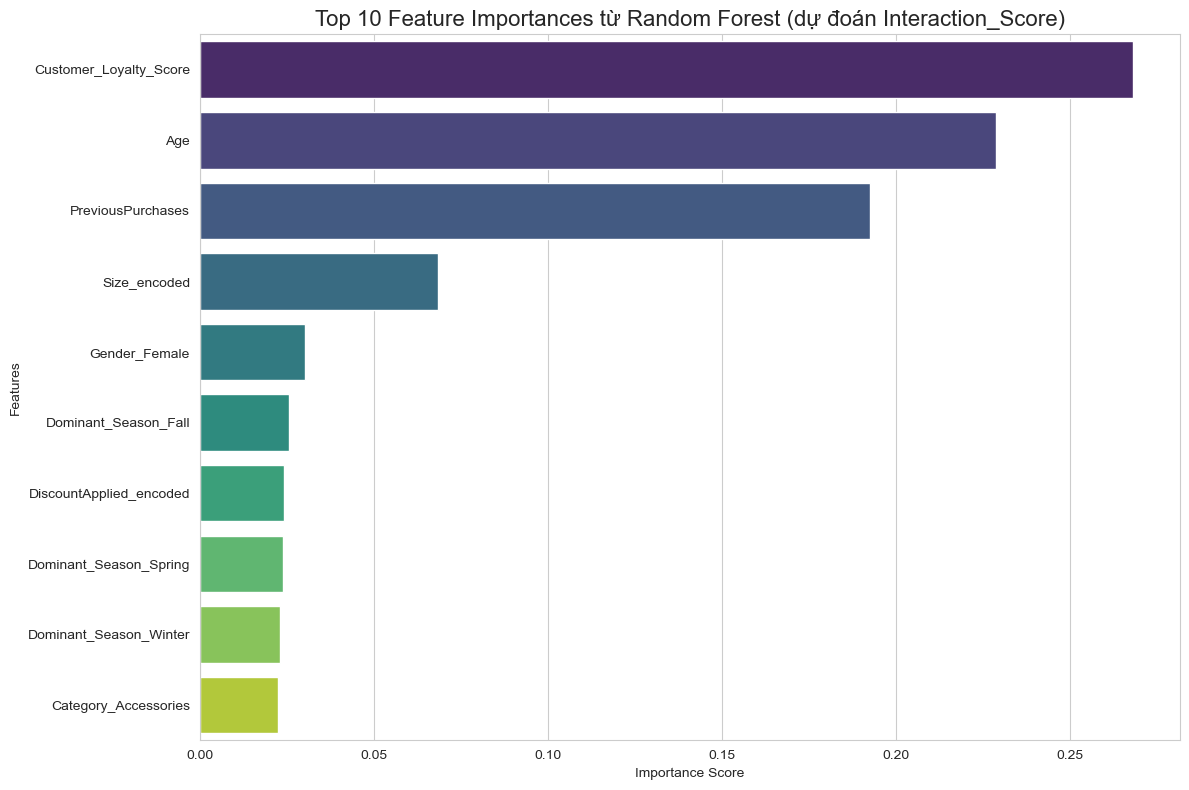

In [157]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Importances",
    y="Features",
    data=feature_importances_df.head(10),
    palette="viridis",
    hue="Features",
    legend=False,
)
plt.title(
    "Top 10 Feature Importances từ Random Forest (dự đoán Interaction_Score)",
    fontsize=16,
)
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.tight_layout()
# Lưu biểu đồ
save_path = os.path.join(feature_importances_dir, "Top10_Feature_Importances_plot.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Đã lưu biểu đồ vào: {save_path}")

plt.show()


#### Cải thiện biểu diễn Feature Importance (theo phần trăm)

In [158]:
# Tính tầm quan trọng theo phần trăm
importances_pct = importances / np.sum(importances) * 100
feature_importances_pct = pd.DataFrame(
    {"Features": feature_names, "Importances (%)": importances_pct}
)

feature_importances_pct = feature_importances_pct.sort_values(
    by="Importances (%)", ascending=False
)
display(feature_importances_pct)


Features  Importances (%)
14      Customer_Loyalty_Score        26.826972
0                          Age        22.892780
1            PreviousPurchases        19.257496
7                 Size_encoded         6.847086
2                Gender_Female         3.033959
10        Dominant_Season_Fall         2.566830
9      DiscountApplied_encoded         2.432896
11      Dominant_Season_Spring         2.383314
13      Dominant_Season_Winter         2.295023
3         Category_Accessories         2.241509
4            Category_Clothing         2.210226
12      Dominant_Season_Summer         2.167266
5            Category_Footwear         1.946049
8   SubscriptionStatus_encoded         1.483230
6           Category_Outerwear         1.415364

#### Vẽ biểu đồ Top 10 đặc trưng quan trọng nhất (theo %)

Đã lưu biểu đồ vào: d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Feature_Engineering\features_selection\Feature_importances\Top10_Feature_Importances_Percentage_plot.png


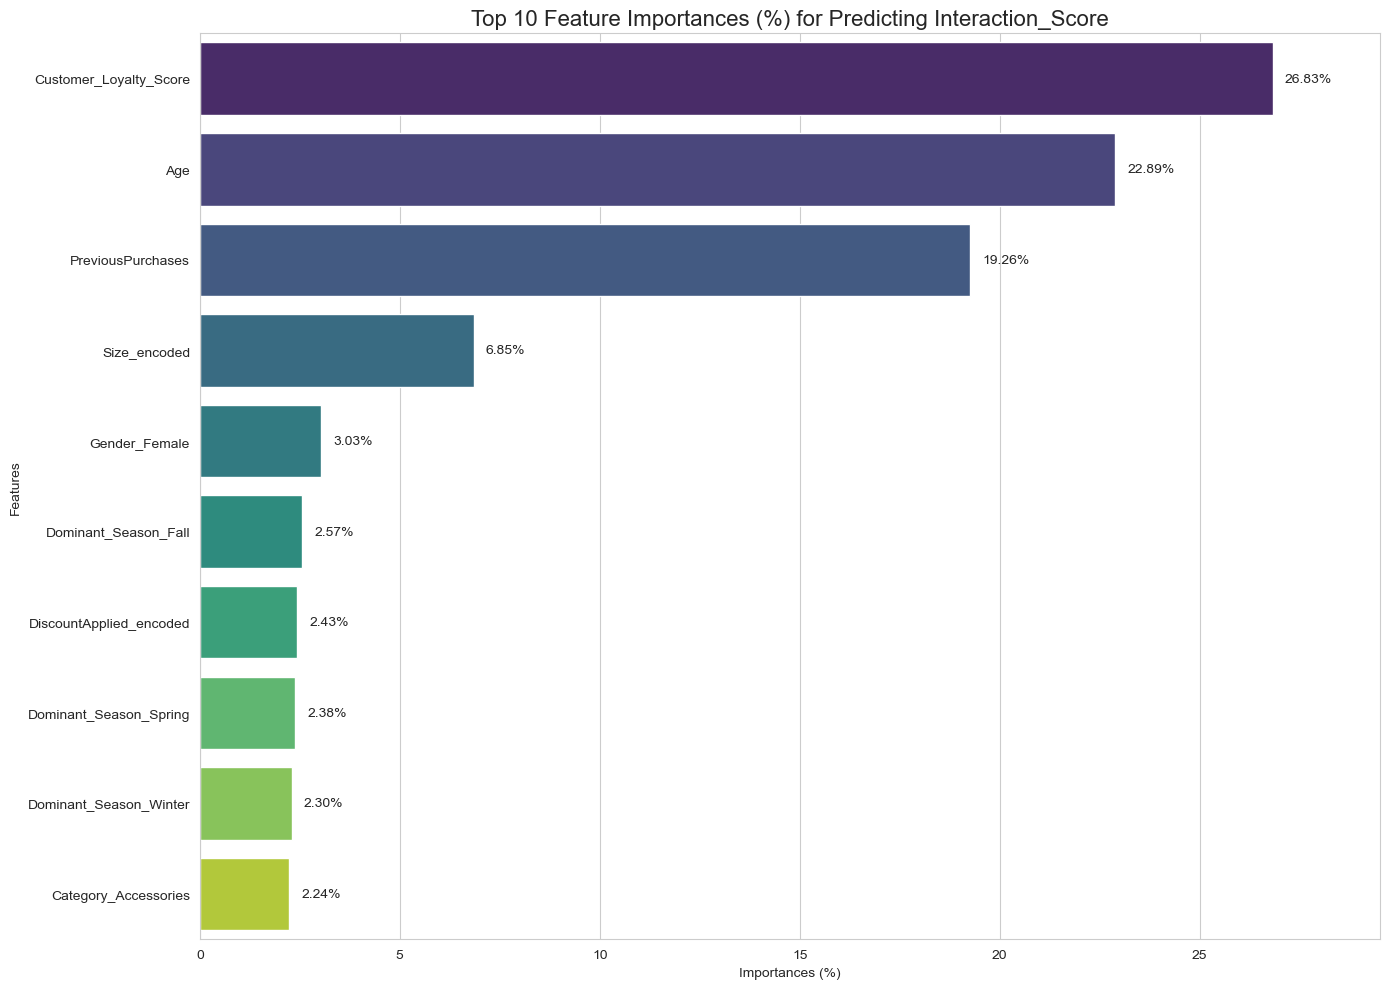

In [159]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    x="Importances (%)",
    y="Features",
    data=feature_importances_pct.head(10),
    palette="viridis",
    hue="Features",
    legend=False,
)
for i, v in enumerate(feature_importances_pct.head(10)["Importances (%)"]):
    if v >= 0.1:
        ax.text(v + 0.3, i, f"{v:.2f}%", va="center")
plt.title(
    "Top 10 Feature Importances (%) for Predicting Interaction_Score", fontsize=16
)
plt.xlabel("Importances (%)")
plt.ylabel("Features")
plt.xlim(0, max(importances_pct) * 1.1)

plt.tight_layout()
# Lưu biểu đồ
save_path = os.path.join(
    feature_importances_dir, "Top10_Feature_Importances_Percentage_plot.png"
)
plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"Đã lưu biểu đồ vào: {save_path}")

plt.show()


#### Tính tầm quan trọng tích lũy

In [160]:
feature_importances_pct["Cumulative Importances (%)"] = feature_importances_pct[
    "Importances (%)"
].cumsum()

features_for_95pct = len(
    feature_importances_pct[feature_importances_pct["Cumulative Importances (%)"] <= 95]
)

print(
    f"\nChỉ cần {features_for_95pct + 1} đặc trưng hàng đầu là đủ để giải thích 95% độ quan trọng tổng cộng."
)

print(f"\nTop {features_for_95pct + 1} đặc trưng quan trọng nhất:")
print(feature_importances_pct.head(features_for_95pct + 1))



Chỉ cần 12 đặc trưng hàng đầu là đủ để giải thích 95% độ quan trọng tổng cộng.

Top 12 đặc trưng quan trọng nhất:
                   Features  Importances (%)  Cumulative Importances (%)
14   Customer_Loyalty_Score        26.826972                   26.826972
0                       Age        22.892780                   49.719752
1         PreviousPurchases        19.257496                   68.977248
7              Size_encoded         6.847086                   75.824334
2             Gender_Female         3.033959                   78.858293
10     Dominant_Season_Fall         2.566830                   81.425123
9   DiscountApplied_encoded         2.432896                   83.858019
11   Dominant_Season_Spring         2.383314                   86.241333
13   Dominant_Season_Winter         2.295023                   88.536356
3      Category_Accessories         2.241509                   90.777865
4         Category_Clothing         2.210226                   92.988091
12   Domi

#### Lưu kết quả cuối cùng

In [161]:
rf_features = feature_importances_pct.head(12)['Features'].tolist()
print(rf_features)


['Customer_Loyalty_Score', 'Age', 'PreviousPurchases', 'Size_encoded', 'Gender_Female', 'Dominant_Season_Fall', 'DiscountApplied_encoded', 'Dominant_Season_Spring', 'Dominant_Season_Winter', 'Category_Accessories', 'Category_Clothing', 'Dominant_Season_Summer']


**Nhận xét:**
- Random Forest xác định `Customer_Loyalty_Score`, `Age`, và `PreviousPurchases` là ba đặc trưng quan trọng nhất để dự đoán `Interaction_Score`, cho thấy các yếu tố về lòng trung thành khách hàng và lịch sử mua sắm đóng vai trò quan trọng trong mức độ tương tác của khách hàng.

- Các đặc trưng khác như `Size_encoded`, `Dominant_Season_Fall`, và `DiscountApplied_encoded` có đóng góp đáng kể (trên 2%), nhưng mức độ quan trọng giảm dần, trong khi các đặc trưng như `Category_Outerwear` và `SubscriptionStatus_encoded` có mức độ ảnh hưởng thấp hơn (dưới 1.5%).

- Đặc biệt, các đặc trưng one-hot của `Category` và `Gender_Female` có tầm quan trọng tương đối thấp, có thể do chúng không trực tiếp ảnh hưởng tuyến tính đến `Interaction_Score`, nhưng vẫn có thể hữu ích trong các mô hình khuyến nghị dựa trên ngữ cảnh.

- Với 12 đặc trưng hàng đầu giải thích 95% độ quan trọng tổng cộng, mô hình có thể được đơn giản hóa bằng cách loại bỏ các đặc trưng có tầm quan trọng rất thấp (như `Category_Outerwear`), nhưng trong bài toán Recommendation, việc giữ lại các đặc trưng ngữ cảnh (như mùa, danh mục) là cần thiết để tăng độ chính xác.

### 4.5.3) Dựa vào Statistical Tests (ANOVA F-test)


Sử dụng ANOVA F-test để kiểm tra mối quan hệ thống kê giữa từng đặc trưng đầu vào (số hoặc đã mã hóa, bao gồm cả `Season` nếu đã mã hóa) và biến mục tiêu `Interaction_Score`.

In [162]:
anova_f_test_dir = os.path.join(features_selection_dir, "ANOVA_F_test")
os.makedirs(anova_f_test_dir, exist_ok=True)


#### Chọn các đặc trưng số từ X_model cho ANOVA F-test

In [163]:
X_numeric = X_model.select_dtypes(include=['float64']) #  # Chỉ chọn các cột số học
display(X_numeric)


Age  PreviousPurchases  Customer_Loyalty_Score
0     0.711538           0.265306                0.546122
1     0.019231           0.020408                0.448163
2     0.615385           0.448980                0.699592
3     0.057692           0.979592                0.911837
4     0.519231           0.612245                0.444898
...        ...                ...                     ...
3895  0.423077           0.632653                0.573061
3896  0.653846           0.816327                0.726531
3897  0.538462           0.469388                0.267755
3898  0.500000           0.469388                0.507755
3899  0.653846           0.653061                0.341224

[3900 rows x 3 columns]

In [164]:
print("Các cột số học trong X_numeric:", X_numeric.columns.tolist())


Các cột số học trong X_numeric: ['Age', 'PreviousPurchases', 'Customer_Loyalty_Score']


#### Tạo dữ liệu thực hiện

In [165]:
X = X_numeric
y = df_final_features['Interaction_Score']


#### Thực hiện ANOVA F-Test

In [166]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)


#### Tạo DataFrame cho kết quả

In [167]:
anova_results = pd.DataFrame({
    "Features": X.columns,
    "F-Values": f_values, 
    "p-values": p_values
})

anova_results = anova_results.sort_values(by="F-Values", ascending=False)
print("\nKết quả ANOVA F-Test:")
print(anova_results)



Kết quả ANOVA F-Test:
                 Features  F-Values  p-values
0                     Age  2.249891  0.133705
2  Customer_Loyalty_Score  0.279351  0.597157
1       PreviousPurchases  0.193874  0.659736


#### Vẽ biểu đồ F-Score

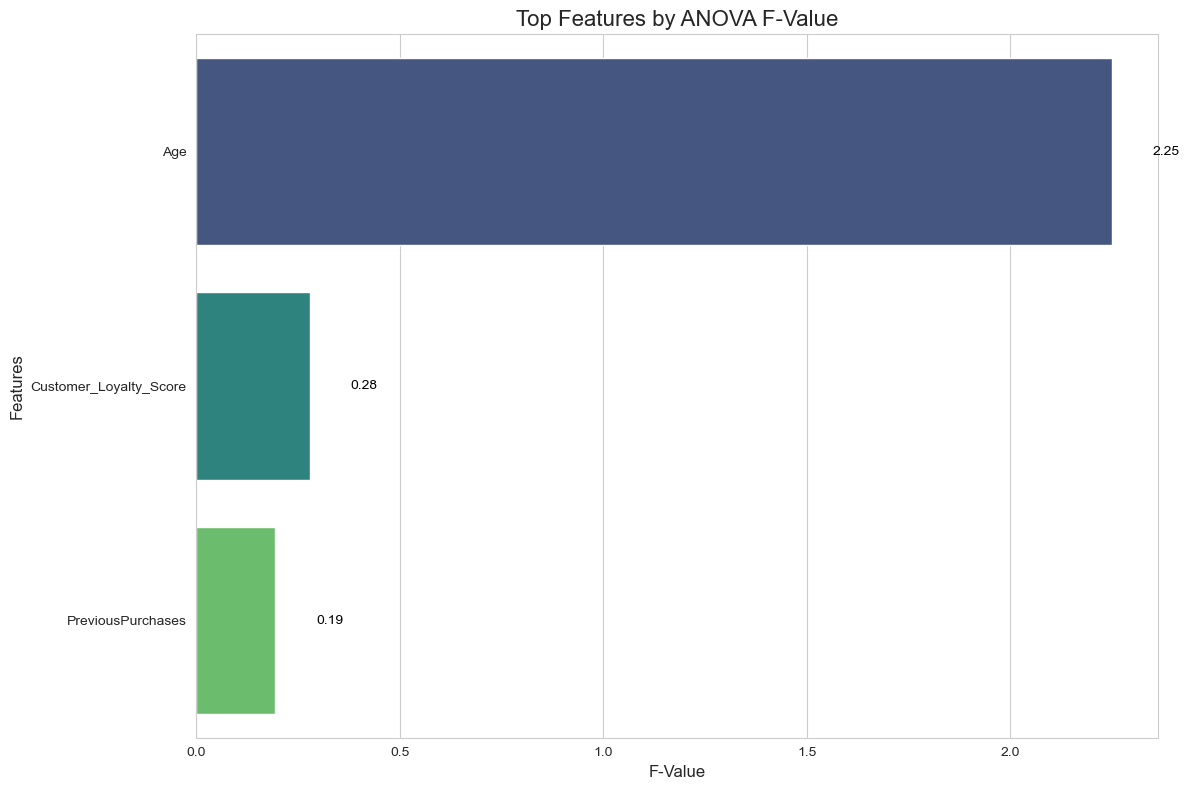

In [168]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x="F-Values",
    y="Features",
    data=anova_results,
    palette="viridis",
    hue="Features",
    legend=False,
)
plt.title("Top Features by ANOVA F-Value", fontsize=16)
plt.xlabel("F-Value", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Thêm nhãn giá trị F-values
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(
        width + 0.1,
        p.get_y() + p.get_height() / 2,
        f"{width:.2f}",
        ha="left",
        va="center",
        fontsize=10,
        color="black",
    )

plt.tight_layout()
save_path = os.path.join(anova_f_test_dir, "Top_ANOVA_F_Value_plot.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()


#### Lọc các đặc trưng có ý nghĩa thống kê `(p-value < 0.1)`

In [169]:
significant_features_anova = anova_results[anova_results['p-values'] < 0.1]['Features'].tolist()

if (significant_features_anova):
    print("\nCác đặc trưng có ý nghĩa thống kê (p-value < 0.1) với Interaction_Score:")
    print(significant_features_anova)
else:
    print("Không có đặc trưng nào thỏa (p < 0.1) với đặc trưng Interaction_Score")



Không có đặc trưng nào thỏa (p < 0.1) với đặc trưng Interaction_Score


#### Biểu đồ các đặc trưng sau khi lọc `(p < 0.1)`

In [170]:
if len(anova_results[anova_results['p-values'] < 0.1]) > 0:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='p-values', y='Features', data=anova_results[anova_results['p-values'] < 0.1], 
                palette='viridis', hue='Features', legend=False)
    plt.title('Top Features by ANOVA (p-values < 0.1)', fontsize=16)
    plt.xlabel('p-values', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    save_path = os.path.join(anova_f_test_dir, "Top_ANOVA_p_values_plot.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("Không vẽ biểu đồ p-values vì không có đặc trưng nào thỏa mãn p < 0.1.")


Không vẽ biểu đồ p-values vì không có đặc trưng nào thỏa mãn p < 0.1.


**Nhận xét:**
- Kết quả ANOVA F-test cho thấy không có đặc trưng số học nào (`Age`, `PreviousPurchases`, `Customer_Loyalty_Score`) có mối quan hệ tuyến tính có ý nghĩa thống kê với `Interaction_Score` ở ngưỡng p-value < 0.1, với giá trị p cao nhất là 0.133705 (`Age`). Điều này có thể phản ánh rằng mối quan hệ giữa các đặc trưng này và `Interaction_Score` không phải là tuyến tính đơn giản.

- So với Feature Importance từ Random Forest, `Customer_Loyalty_Score` và `Age` có tầm quan trọng cao, nhưng ANOVA không xác nhận ý nghĩa thống kê, gợi ý rằng chúng có thể ảnh hưởng thông qua các tương tác phức tạp hơn.

- Các đặc trưng phân loại (như `Gender_Female`, `Category_*`) không được đánh giá trong ANOVA vì chúng đã được mã hóa one-hot và không thuộc nhóm số học, nhưng có thể được kiểm tra bằng Chi-square Test ở bước tiếp theo.

- Kết quả này bổ sung cho Feature Importance, nhấn mạnh rằng các phương pháp thống kê khác (như Chi-square) cần được kết hợp để đánh giá đầy đủ các đặc trưng phân loại.

### 4.5.4) - Dựa vào Chi-square Test

Sử dụng **Chi-square test** để đánh giá mối quan hệ giữa các đặc trưng phân loại và biến mục tiêu, ở đây chúng ta sẽ dùng `Dominant_Season_` làm biến mục tiêu để dữ đoán

In [171]:
import os
chi_square_test_dir = os.path.join(features_selection_dir, "Chi_Square_Test")
os.makedirs(chi_square_test_dir, exist_ok=True)


#### Sử dụng `Dominant_Season_` đã phân loại từ 4.6.4 (nếu có) hoặc tạo mới

In [172]:
from scipy.stats import chi2_contingency


#### Định nghĩa các đặc trưng phân loại

In [173]:
X_categories = X_model.select_dtypes(include=['int64', 'int32']) 
print(X_categories.columns.tolist())


['Gender_Female', 'Category_Accessories', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Size_encoded', 'SubscriptionStatus_encoded', 'DiscountApplied_encoded', 'Dominant_Season_Fall', 'Dominant_Season_Spring', 'Dominant_Season_Summer', 'Dominant_Season_Winter']


In [174]:
categorical_features = [
    col
    for col in X_categories.columns
    if not col.startswith('Dominant_Season_')
]

print("\nCác đặc trưng phân loại (không bao gồm Dominant_season_*):", categorical_features)



Các đặc trưng phân loại (không bao gồm Dominant_season_*): ['Gender_Female', 'Category_Accessories', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Size_encoded', 'SubscriptionStatus_encoded', 'DiscountApplied_encoded']


#### Sử dụng Dominant_season làm biến mục tiêu (lấy giá trị max từ one-hot)

In [175]:
dominant_season_features = [
    col for col in X_categories.columns 
    if col.startswith("Dominant_Season_")
]

dominant_season_target = df_final_features[dominant_season_features].idxmax(axis=1).str.replace('Dominant_Season_', '')
print("Phân phối Dominant_season_target:")
print(dominant_season_target.value_counts())


Phân phối Dominant_season_target:
Fall      1232
Spring    1082
Winter     799
Summer     787
Name: count, dtype: int64


#### Thực hiện Chi-square Test và phân tích kết quả

In [176]:
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df_final_features[feature], dominant_season_target) # Tạo bảng chéo
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = {"chi2": chi2_stat, "p-value": p_val}


#### Tạo DataFrame cho kết quả Chi-square

In [177]:
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient="index")
chi2_results_df = chi2_results_df.sort_values("chi2", ascending=False)


In [178]:
print("\nKết quả Chi-square Test:")
display(chi2_results_df)



Kết quả Chi-square Test:


chi2        p-value
Category_Clothing           616.959955  2.121381e-133
Category_Accessories        534.734264  1.414976e-115
Category_Footwear           265.845192   2.445283e-57
Category_Outerwear          244.244824   1.149557e-52
Gender_Female                 3.587671   3.095682e-01
DiscountApplied_encoded       3.553530   3.138856e-01
Size_encoded                  2.550286   9.795004e-01
SubscriptionStatus_encoded    1.695340   6.379702e-01

#### Hiển thị kết quả

In [179]:
print("\nKết quả Chi-square Test (top 10):")
display(chi2_results_df.head(10))



Kết quả Chi-square Test (top 10):


chi2        p-value
Category_Clothing           616.959955  2.121381e-133
Category_Accessories        534.734264  1.414976e-115
Category_Footwear           265.845192   2.445283e-57
Category_Outerwear          244.244824   1.149557e-52
Gender_Female                 3.587671   3.095682e-01
DiscountApplied_encoded       3.553530   3.138856e-01
Size_encoded                  2.550286   9.795004e-01
SubscriptionStatus_encoded    1.695340   6.379702e-01

In [180]:
p_value_threshold = 0.1
significant_features_chi2 = chi2_results_df[chi2_results_df['p-value'] < p_value_threshold].index.tolist()
print(f"\nĐặc trưng có ý nghĩa thống kê (p < 0.1): {len(significant_features_chi2)} features")
for feature in significant_features_chi2:
    print(f"- {feature}")



Đặc trưng có ý nghĩa thống kê (p < 0.1): 4 features
- Category_Clothing
- Category_Accessories
- Category_Footwear
- Category_Outerwear


#### Vẽ biểu đồ Chi-square Values (giới hạn top 10)

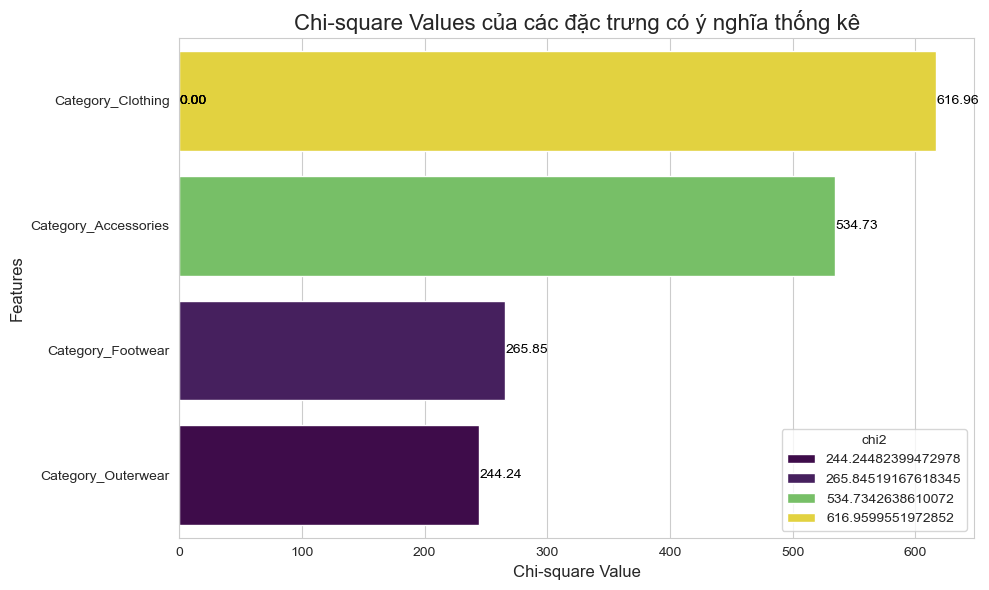


Đã vẽ biểu đồ cho 4 đặc trưng có ý nghĩa thống kê (p < 0.1):
- Category_Clothing
- Category_Accessories
- Category_Footwear
- Category_Outerwear


In [181]:
if not significant_features_chi2:
        print("Không có đặc trưng nào thỏa mãn ngưỡng p-value. Biểu đồ sẽ không được vẽ.")
else:
    filtered_data = chi2_results_df.loc[significant_features_chi2].sort_values("chi2", ascending=False)

    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(
        x="chi2",
        y=filtered_data.index,
        hue="chi2",
        data=filtered_data.reset_index(),
        palette="viridis",
    )
    plt.title("Chi-square Values của các đặc trưng có ý nghĩa thống kê", fontsize=16)
    plt.xlabel("Chi-square Value", fontsize=12)
    plt.ylabel("Features", fontsize=12)

    for p in bar_plot.patches:
        width = p.get_width()
        plt.text(
            width + 0.1,
            p.get_y() + p.get_height() / 2,
            f"{width:.2f}",
            ha="left",
            va="center",
            fontsize=10,
            color="black",
        )

    plt.tight_layout()
    save_path = os.path.join(chi_square_test_dir, "Chi2_vs_SignificantFeatures_plot.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

    print(f"\nĐã vẽ biểu đồ cho {len(significant_features_chi2)} đặc trưng có ý nghĩa thống kê (p < {p_value_threshold}):")
    for feature in significant_features_chi2:
        print(f"- {feature}")

if len(significant_features_chi2) == 0:
    print("Gợi ý: Không có đặc trưng nào thỏa mãn ngưỡng. Cân nhắc tăng ngưỡng p-value (ví dụ: 0.15).")
elif len(significant_features_chi2) > 20:
    print("Gợi ý: Số lượng đặc trưng quá lớn. Cân nhắc giảm ngưỡng p-value (ví dụ: 0.05).")


#### **Nhận xét:**


**Nhận xét:**

- **Chi-square Test** đã xác định 4 đặc trưng phân loại có mối quan hệ ý nghĩa thống kê với `Dominant_Season` ở ngưỡng **(p-value < 0.1)**: `Category_Clothing`, `Category_Accessories`, `Category_Footwear`, và `Category_Outerwear`, với giá trị Chi-square rất cao (từ 244.24 đến 616.96), cho thấy tác động mạnh mẽ của các danh mục sản phẩm đến mùa mua sắm.

- Các đặc trưng như `Gender_Female`, `DiscountApplied_encoded`, `Size_encoded`, và `SubscriptionStatus_encoded` có **(p-value > 0.3)**, cho thấy không có mối quan hệ thống kê đáng kể với `Dominant_Season`, và có thể được xem xét loại bỏ để giảm kích thước dữ liệu.

- Kết quả này bổ sung cho các phương pháp trước, đặc biệt là ANOVA (chỉ tập trung vào đặc trưng số học), và nhấn mạnh vai trò của các đặc trưng phân loại trong việc dự đoán ngữ cảnh mua sắm (mùa).

- Kết hợp với Correlation và Feature Importance, danh sách đặc trưng cuối cùng nên bao gồm cả các đặc trưng số quan trọng (từ Random Forest) và phân loại có ý nghĩa (từ Chi-square) để tối ưu hóa mô hình Recommendation.

## [4.6] - Xác định tập đặc trưng cuối cùng

### 4.6.1) Danh sách các đặc trưng cuối cùng

In [182]:

final_features = list(set(rf_features + significant_features_anova + significant_features_chi2))
if 'Interaction_Score' not in final_features:

    final_features.append('Interaction_Score')


### 4.6.2) In kết quả

In [183]:
print("\nDanh sách đặc trưng cuối cùng sau khi tổng hợp:")
print(final_features)
print(f"Số đặc trưng cuối cùng: {len(final_features)}")



Danh sách đặc trưng cuối cùng sau khi tổng hợp:
['DiscountApplied_encoded', 'Age', 'Dominant_Season_Fall', 'Category_Clothing', 'Category_Outerwear', 'Dominant_Season_Summer', 'PreviousPurchases', 'Category_Footwear', 'Category_Accessories', 'Customer_Loyalty_Score', 'Dominant_Season_Spring', 'Gender_Female', 'Dominant_Season_Winter', 'Size_encoded', 'Interaction_Score']
Số đặc trưng cuối cùng: 15


### 4.6.3) Tạo DataFrame

In [184]:
df_final_features = df_final_features[final_features]
print("\nDữ liệu sau khi giữ lại các đặc trưng cuối cùng:")
display(df_final_features.head())




Dữ liệu sau khi giữ lại các đặc trưng cuối cùng:


DiscountApplied_encoded       Age  Dominant_Season_Fall  Category_Clothing  \
0                        1  0.711538                     0                  1   
1                        1  0.019231                     0                  1   
2                        1  0.615385                     1                  1   
3                        1  0.057692                     1                  0   
4                        1  0.519231                     0                  1   

   Category_Outerwear  Dominant_Season_Summer  PreviousPurchases  \
0                   0                       0           0.265306   
1                   0                       0           0.020408   
2                   0                       0           0.448980   
3                   0                       0           0.979592   
4                   0                       0           0.612245   

   Category_Footwear  Category_Accessories  Customer_Loyalty_Score  \
0                  0                     0                0.546122   
1                  0                     0                0.448163   
2                  0                     0                0.699592   
3                  1                     0                0.911837   
4                  0                     0                0.444898   

   Dominant_Season_Spring  Gender_Female  Dominant_Season_Winter  \
0                       1              0                       0   
1                       1              0                       0   
2                       0              0                       0   
3                       0              0                       0   
4                       1              0                       0   

   Size_encoded  Interaction_Score  
0             0            0.29175  
1             0            0.33300  
2             2            0.36675  
3             1            0.54250  
4             1            0.16475

### 4.6.4) Lưu các đặc trưng cuối cùng dưới dạng để sử dụng cho Bước 5

In [185]:
filename = 'shopping_behavior_final_features.csv'
save_path = os.path.join(data_dir, filename)
df_final_features.to_csv(save_path, index=False)
print(f"Đã lưu DataFrame với các đặc trưng cuối cùng vào [ {save_path} ]")


Đã lưu DataFrame với các đặc trưng cuối cùng vào [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Data\shopping_behavior_final_features.csv ]


**Nhận xét:**

- Kết hợp từ các phương pháp (Correlation, Random Forest, ANOVA F-test, Chi-square Test) cho ra danh sách **{len(final_features)} đặc trưng cuối cùng**, bao gồm các đặc trưng số quan trọng (`Customer_Loyalty_Score`, `Age`, `PreviousPurchases`) và các đặc trưng phân loại có ý nghĩa thống kê (`Category_Clothing`, `Category_Accessories`, v.v.).

- Phương pháp loại bỏ `Review Rating` từ Correlation giúp tránh đa cộng tuyến, trong khi Random Forest xác định các đặc trưng đóng góp lớn vào `Interaction_Score`. ANOVA không tìm thấy mối quan hệ tuyến tính mạnh, nhưng Chi-square xác nhận vai trò của các đặc trưng phân loại liên quan đến mùa.

- Số lượng đặc trưng ({len(final_features)}) là hợp lý để xây dựng mô hình Recommendation, cân bằng giữa độ chính xác và độ phức tạp. Các đặc trưng như `Gender_Female`, `Size_encoded` có thể được loại bỏ nếu cần tinh giản thêm, dựa trên kết quả Chi-square.

- Danh sách này sẽ được sử dụng làm đầu vào cho các bước tiếp theo (như xây dựng mô hình Item-Item CF, Content-Based, KNN CF, Hybrid) để tối ưu hóa khuyến nghị sản phẩm.

## [4.7] - Tổng kết quá trình tạo đặc trưng (Feature Engineering)

- Đã tiến hành phân tích, lựa chọn và tổng hợp các đặc trưng từ dữ liệu hành vi mua sắm của khách hàng.
- Sử dụng nhiều phương pháp khác nhau như: thống kê mô tả, phân tích tương quan, lựa chọn đặc trưng dựa trên mô hình (Random Forest), kiểm định ANOVA và kiểm định Chi-squared.
- Đã xây dựng các đặc trưng mới như: Customer_Loyalty_Score, Dominant_Season, Category, Size_encoded, DiscountApplied_encoded, v.v.
- Đặc biệt, đã bổ sung đặc trưng Interaction_Score để phản ánh tổng mức độ tương tác của khách hàng với sản phẩm.
- Kết quả, đã chọn ra danh sách các đặc trưng cuối cùng phục vụ cho bước huấn luyện mô hình ở Bước 5.

## [4.8] - Tổng kết và đánh giá các bước Feature Engineering

## [4.8] - Tóm tắt quyết định Feature Engineering (CHƯA CHỈNH)

Dựa trên tất cả các phân tích trên, chúng ta đã thực hiện các quyết định sau trong quá trình Feature Engineering:

### 4.11.1) **Loại bỏ đặc trưng**

- Đã loại bỏ các đặc trưng định danh không có giá trị dự đoán (`Customer ID`).
- Đã loại bỏ các đặc trưng dư thừa (`Promo Code Used` ~ `Discount Applied`).
- Đã loại bỏ các cột gốc đã được mã hóa (ngoại trừ `Item Purchased` được giữ lại cho mục đích đề xuất sản phẩm).
- Đã loại bỏ các đặc trưng trung gian dùng để tính toán.
- Đã xác định và cân nhắc loại bỏ các đặc trưng có phương sai cực thấp.

=> **Đã loại bỏ `Season_sin`, `Season_cos` để giữ nguyên đặc trưng `Season`.**

### 4.11.2) **Tạo đặc trưng mới**

- Đã tạo `Product_ID` bằng cách kết hợp thông tin sản phẩm.
- Đã tạo `Customer_Loyalty_Score` từ các chỉ số hành vi mua hàng.
- Đã tạo `Interaction_Score` là mục tiêu tiềm năng cho mô hình.

### 4.11.3) **Lựa chọn phương pháp mã hóa**

- Sử dụng One-hot encoding cho `Gender` và `Category`.
- Sử dụng Label encoding cho các biến phân loại còn lại.
- Chuẩn hóa các biến số với `StandardScaler`.
- Giữ nguyên biến `Item Purchased` để phục vụ cho việc đề xuất sản phẩm cụ thể.

=> **Giữ nguyên đặc trưng `Season` (không mã hóa tuần hoàn, không dùng Season_sin/cos).**

### 4.11.4) **Phương pháp chọn lọc đặc trưng**

- Sử dụng ma trận tương quan để phát hiện đa cộng tuyến.
- Sử dụng **Random Forest Feature Importance** để xác định đặc trưng quan trọng.
- Sử dụng **ANOVA F-test** và **Chi-square test** để đánh giá ý nghĩa thống kê.
- Phân tích phương sai để xác định đặc trưng không có giá trị phân biệt.
- `Loại trừ` các đặc trưng chuỗi như `Item Purchased` khỏi các phân tích số học nhưng giữ lại trong bộ dữ liệu cuối cùng.

# Bước 5: Huấn luyện, đánh giá và tinh chỉnh mô hình


**Mục tiêu:** Kết hợp Collaborative Filtering và Content-Based Filtering để đề xuất sản phẩm cá nhân hóa, tận dụng cả lịch sử tương tác và đặc trưng sản phẩm/người dùng.

## File sử dụng:
- `shopping_behavior_final_features.csv` (dữ liệu đặc trưng đã xử lý)
- `user_item_matrix.csv` (ma trận tiện ích User-Item)

## [5.1] - Import Thư viện

In [186]:
import os
import time
import psutil
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, ndcg_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from scipy import sparse
from sklearn.model_selection import KFold
import optuna

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


training_dir = os.path.join(figures_dir, "Training")
os.makedirs(training_dir, exist_ok=True)
print(f"Training_dir path: [ {training_dir} ]")


Training_dir path: [ d:\UIT\FILE_UIT_KHMT2023.2\Nam_02\HK2\CS116\Project\Project_Final\project_temp\Figures\Training ]


In [187]:
def load_data():

    final_features_csv = os.path.join(data_dir, "shopping_behavior_final_features.csv")
    user_item_matrix_csv = os.path.join(data_dir, "user_item_matrix.csv")
    processed_features_csv = os.path.join(data_dir, "shopping_behavior_processed.csv")

    features_df = pd.read_csv(final_features_csv)
    user_item_matrix = pd.read_csv(user_item_matrix_csv, index_col=0)
    processed_features_df = pd.read_csv(processed_features_csv)
    return features_df, user_item_matrix, processed_features_df

# Gọi hàm để tải dữ liệu
features_df, user_item_matrix, processed_features_df = load_data()


In [188]:
# In thông tin cơ bản về user_item_matrix để kiểm tra
print("user_item_matrix shape:", user_item_matrix.shape)
print("Số user:", user_item_matrix.shape[0])
print("Số item (features):", user_item_matrix.shape[1])

# Kiểm tra tính duy nhất của Customer ID trong user_item_matrix
unique_customer_ids = user_item_matrix.index.nunique()
print("Số lượng Customer ID unique:", unique_customer_ids)
num_rows = user_item_matrix.shape[0]
print("Số lượng dòng (rows):", num_rows)

# So sánh để phát hiện trùng lặp Customer ID
if unique_customer_ids == num_rows:
    print("OK: Mỗi dòng là một Customer ID unique.")
else:
    print(f"Cảnh báo: Có {num_rows - unique_customer_ids} dòng bị trùng Customer ID!")


user_item_matrix shape: (3900, 25)
Số user: 3900
Số item (features): 25
Số lượng Customer ID unique: 3900
Số lượng dòng (rows): 3900
OK: Mỗi dòng là một Customer ID unique.


In [ ]:
print(user_item_matrix.columns.tolist())


['Backpack_Accessories', 'Belt_Accessories', 'Blouse_Clothing', 'Boots_Footwear', 'Coat_Outerwear', 'Dress_Clothing', 'Gloves_Accessories', 'Handbag_Accessories', 'Hat_Accessories', 'Hoodie_Clothing', 'Jacket_Outerwear', 'Jeans_Clothing', 'Jewelry_Accessories', 'Pants_Clothing', 'Sandals_Footwear', 'Scarf_Accessories', 'Shirt_Clothing', 'Shoes_Footwear', 'Shorts_Clothing', 'Skirt_Clothing', 'Sneakers_Footwear', 'Socks_Clothing', 'Sunglasses_Accessories', 'Sweater_Clothing', 'T-shirt_Clothing']


In [190]:
# Danh sách các cột bắt buộc phải có trong features_df
required_cols = [
    'PreviousPurchases', 'Gender_Female', 'Customer_Loyalty_Score', 'Size_encoded',
    'Dominant_Season_Spring', 'Category_Footwear', 'Age', 'Dominant_Season_Winter',
    'Dominant_Season_Summer', 'DiscountApplied_encoded', 'Dominant_Season_Fall',
    'Category_Clothing', 'Category_Outerwear', 'Category_Accessories', 'Interaction_Score'
]

# Kiểm tra xem các cột bắt buộc có tồn tại không
if not all(col in features_df.columns for col in required_cols):
    raise ValueError(f"Thiếu cột: {set(required_cols) - set(features_df.columns)}")

# Danh sách các cột số cần kiểm tra
numerical_cols = ['Age', 'PreviousPurchases', 'Customer_Loyalty_Score']
if not all(col in features_df.columns for col in numerical_cols):
    raise ValueError(f"Thiếu cột số: {set(numerical_cols) - set(features_df.columns)}")

# Kiểm tra sự tồn tại của cột Interaction_Score
if 'Interaction_Score' not in features_df.columns:
    raise ValueError("Thiếu cột 'Interaction_Score' trong features_df")

# Xử lý và đồng bộ cột Customer ID giữa các DataFrame
customer_id_col = 'Customer ID'
if 'Customer ID' not in processed_features_df.columns:
    if 'Customer_ID' in processed_features_df.columns:
        customer_id_col = 'Customer_ID'
    else:
        raise ValueError("processed_features_df không có cột 'Customer ID' hoặc 'Customer_ID'")

# Thêm cột Customer ID vào features_df nếu chưa có
if 'Customer ID' not in features_df.columns:
    features_df.insert(0, 'Customer ID', processed_features_df[customer_id_col].iloc[:len(features_df)])

# Đảm bảo kiểu dữ liệu đồng nhất cho cột Customer ID
features_df['Customer ID'] = features_df['Customer ID'].astype(int)
user_item_matrix.index = user_item_matrix.index.astype(int)

# Lưu file features_df đã cập nhật
updated_features_path = os.path.join(data_dir, 'shopping_behavior_final_features_with_customer_id.csv')
features_df.to_csv(updated_features_path, index=False)


## [5.1] - train_test_split

In [191]:
train_df, test_df = train_test_split(features_df, test_size=0.2, random_state=42, shuffle=True)
print(f"train_df.shape: {train_df.shape}")
display(train_df.head())
print(f"test_df.shape: {test_df.shape}")
display(test_df.head())


train_df.shape: (3120, 16)


Customer ID  DiscountApplied_encoded       Age  Dominant_Season_Fall  \
247           248                        1  0.211538                     0   
2591         2592                        0  0.423077                     1   
1822         1823                        0  0.923077                     0   
3483         3484                        0  0.019231                     0   
2771         2772                        0  0.769231                     1   

      Category_Clothing  Category_Outerwear  Dominant_Season_Summer  \
247                   1                   0                       0   
2591                  0                   1                       0   
1822                  1                   0                       0   
3483                  1                   0                       0   
2771                  0                   1                       0   

      PreviousPurchases  Category_Footwear  Category_Accessories  \
247            0.265306                  0                     0   
2591           0.795918                  0                     0   
1822           0.061224                  0                     0   
3483           0.408163                  0                     0   
2771           0.224490                  0                     0   

      Customer_Loyalty_Score  Dominant_Season_Spring  Gender_Female  \
247                 0.626122                       1              0   
2591                0.398367                       0              0   
1822                0.024490                       0              0   
3483                0.243265                       0              1   
2771                0.329796                       0              1   

      Dominant_Season_Winter  Size_encoded  Interaction_Score  
247                        0             3            0.70450  
2591                       0             2            0.37775  
1822                       1             2            0.77575  
3483                       1             0            0.45575  
2771                       0             2            0.28800

test_df.shape: (780, 16)


Customer ID  DiscountApplied_encoded       Age  Dominant_Season_Fall  \
839           840                        1  0.576923                     0   
1717         1718                        0  0.211538                     0   
321           322                        1  0.442308                     0   
3187         3188                        0  0.942308                     0   
2269         2270                        0  0.596154                     1   

      Category_Clothing  Category_Outerwear  Dominant_Season_Summer  \
839                   1                   0                       0   
1717                  1                   0                       0   
321                   0                   0                       0   
3187                  1                   0                       0   
2269                  1                   0                       0   

      PreviousPurchases  Category_Footwear  Category_Accessories  \
839            0.183673                  0                     0   
1717           0.306122                  0                     0   
321            0.959184                  1                     0   
3187           0.551020                  0                     0   
2269           0.530612                  0                     0   

      Customer_Loyalty_Score  Dominant_Season_Spring  Gender_Female  \
839                 0.353469                       0              0   
1717                0.522449                       0              0   
321                 0.663673                       1              0   
3187                0.540408                       1              1   
2269                0.212245                       0              0   

      Dominant_Season_Winter  Size_encoded  Interaction_Score  
839                        1             0            0.06925  
1717                       1             0            0.22450  
321                        0             0            0.67600  
3187                       0             0            0.39100  
2269                       0             1            0.59950

## [5.2] - User_profiles_featuers

In [ ]:
# Định nghĩa các nhóm cột đặc trưng để sử dụng trong mô hình
category_cols = [col for col in features_df.columns if col.startswith("Category_")]
season_cols = [col for col in features_df.columns if col.startswith("Dominant_Season_")]
size_encoded_col = "Size_encoded"
discount_encoded_col = "DiscountApplied_encoded"
gender_female_col = "Gender_Female"
age_col = "Age"
previous_purchases_col = "PreviousPurchases"
loyalty_score_col = "Customer_Loyalty_Score"
interaction_score_col = "Interaction_Score"

# Tạo danh sách đặc trưng cho profile user
user_profile_features = (
    category_cols
    + season_cols
    + [size_encoded_col, discount_encoded_col, gender_female_col, age_col, previous_purchases_col, loyalty_score_col]
)

print(f"user_profile_features: {user_profile_features}")


user_profile_features: ['Category_Clothing', 'Category_Outerwear', 'Category_Footwear', 'Category_Accessories', 'Dominant_Season_Fall', 'Dominant_Season_Summer', 'Dominant_Season_Spring', 'Dominant_Season_Winter', 'Size_encoded', 'DiscountApplied_encoded', 'Gender_Female', 'Age', 'PreviousPurchases', 'Customer_Loyalty_Score']


## [5.3] - Item Categories

In [ ]:
# Kiểm tra tính khớp nối giữa danh mục trong user_item_matrix và features_df
items = user_item_matrix.columns.tolist()
categories = set(col.replace('Category_', '') for col in category_cols)
item_categories = set(item.split('_')[-1] for item in items)

if not categories.issuperset(item_categories):
    raise ValueError(f"Một số danh mục trong user_item_matrix không khớp Category_*: {item_categories - categories}")

print(f"Item categories: {item_categories}")


Item categories: {'Footwear', 'Accessories', 'Clothing', 'Outerwear'}


## [5.4] - Assign Item columns

In [194]:
def assign_item_column(df, user_item_matrix, features_df):
    """
    Gán cột Item cho DataFrame dựa trên Customer_Loyalty_Score để chọn nhiều item.
    
    Mục đích: Gán các item mà user đã tương tác dựa trên điểm loyalty để làm giàu dữ liệu.
    Lý do : Giúp mô hình hiểu được sở thích của user qua các item đã tương tác.
    Input: df (DataFrame cần gán), user_item_matrix (ma trận user-item), features_df (dữ liệu đặc trưng).
    Output: Danh sách các item được gán cho từng user.
    """
    items = []
    for cid in df['Customer ID']:
        if cid in user_item_matrix.index:
            user_row = user_item_matrix.loc[cid]
            interacted_items = user_row[user_row > 0].index.tolist()
            
            if not interacted_items:
                items.append([np.nan])
                # print(f"User {cid}: Không có tương tác trong user_item_matrix.")
            else:
                user_data = features_df[features_df['Customer ID'] == cid]
                
                if not user_data.empty:
                    loyalty_score = user_data['Customer_Loyalty_Score'].iloc[0]
                    item_scores = {}
                    
                    for item in interacted_items:
                        category = item.split('_')[-1]
                        category_col = f'Category_{category}'
                        
                        if category_col in user_data.columns:
                            base_score = user_row[item] if not np.isnan(user_row[item]) else 0
                            item_scores[item] = base_score * loyalty_score
                    
                    if item_scores:
                        top_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)[:3]
                        items.append([item for item, score in top_items])
                        # print(f"User {cid}: Gán {len(top_items)} item: {top_items}")
                    else:
                        items.append([np.nan])
                        # print(f"User {cid}: Không có score hợp lệ.")
                else:
                    items.append([np.nan])
                    # print(f"User {cid}: Không tìm thấy trong features_df.")
        else:
            items.append([np.nan])
            # print(f"User {cid}: Không trong user_item_matrix.")
    return items


In [195]:
# Gán cột Item cho train_df và test_df
train_df['Item'] = assign_item_column(train_df, user_item_matrix, features_df)
test_df['Item'] = assign_item_column(test_df, user_item_matrix, features_df)


### train_df

In [ ]:
print("Train_df:")
display(train_df.head())


Train_df:


Customer ID  DiscountApplied_encoded       Age  Dominant_Season_Fall  \
247           248                        1  0.211538                     0   
2591         2592                        0  0.423077                     1   
1822         1823                        0  0.923077                     0   
3483         3484                        0  0.019231                     0   
2771         2772                        0  0.769231                     1   

      Category_Clothing  Category_Outerwear  Dominant_Season_Summer  \
247                   1                   0                       0   
2591                  0                   1                       0   
1822                  1                   0                       0   
3483                  1                   0                       0   
2771                  0                   1                       0   

      PreviousPurchases  Category_Footwear  Category_Accessories  \
247            0.265306                  0                     0   
2591           0.795918                  0                     0   
1822           0.061224                  0                     0   
3483           0.408163                  0                     0   
2771           0.224490                  0                     0   

      Customer_Loyalty_Score  Dominant_Season_Spring  Gender_Female  \
247                 0.626122                       1              0   
2591                0.398367                       0              0   
1822                0.024490                       0              0   
3483                0.243265                       0              1   
2771                0.329796                       0              1   

      Dominant_Season_Winter  Size_encoded  Interaction_Score  \
247                        0             3            0.70450   
2591                       0             2            0.37775   
1822                       1             2            0.77575   
3483                       1             0            0.45575   
2771                       0             2            0.28800   

                    Item  
247   [Sweater_Clothing]  
2591  [Jacket_Outerwear]  
1822    [Shirt_Clothing]  
3483   [Hoodie_Clothing]  
2771  [Jacket_Outerwear]

### test_df

In [ ]:
print("Test_df:")
display(test_df.head())


Test_df:


Customer ID  DiscountApplied_encoded       Age  Dominant_Season_Fall  \
839           840                        1  0.576923                     0   
1717         1718                        0  0.211538                     0   
321           322                        1  0.442308                     0   
3187         3188                        0  0.942308                     0   
2269         2270                        0  0.596154                     1   

      Category_Clothing  Category_Outerwear  Dominant_Season_Summer  \
839                   1                   0                       0   
1717                  1                   0                       0   
321                   0                   0                       0   
3187                  1                   0                       0   
2269                  1                   0                       0   

      PreviousPurchases  Category_Footwear  Category_Accessories  \
839            0.183673                  0                     0   
1717           0.306122                  0                     0   
321            0.959184                  1                     0   
3187           0.551020                  0                     0   
2269           0.530612                  0                     0   

      Customer_Loyalty_Score  Dominant_Season_Spring  Gender_Female  \
839                 0.353469                       0              0   
1717                0.522449                       0              0   
321                 0.663673                       1              0   
3187                0.540408                       1              1   
2269                0.212245                       0              0   

      Dominant_Season_Winter  Size_encoded  Interaction_Score  \
839                        1             0            0.06925   
1717                       1             0            0.22450   
321                        0             0            0.67600   
3187                       0             0            0.39100   
2269                       0             1            0.59950   

                     Item  
839      [Shirt_Clothing]  
1717    [Hoodie_Clothing]  
321   [Sneakers_Footwear]  
3187    [Blouse_Clothing]  
2269     [Skirt_Clothing]

## [5.5] - Xây dựng User Profiles với trọng số `Customer_Loyalty_Score`

In [198]:
# Hàm tính profile user có trọng số
def weighted_user_profile(df, features, weight_col='Customer_Loyalty_Score'):
    """
        Tính profile của user dựa trên trung bình có trọng số của các đặc trưng.
        
        Mục đích: Xây dựng profile user dựa trên các đặc trưng có trọng số để phản ánh sở thích chính xác hơn.
        Lý do: Trọng số từ Customer_Loyalty_Score giúp ưu tiên các đặc trưng quan trọng của user.
        Input: df (DataFrame đầu vào), features (danh sách đặc trưng), weight_col (cột dùng làm trọng số).
        Output: DataFrame chứa profile user với các đặc trưng đã tính toán.
    """
    def _weighted_avg(x):
        w = x[weight_col].fillna(0)  # Xử lý NaN bằng 0
        w_sum = w.sum()  # Tính tổng trọng số
        if not np.isscalar(w_sum):
            raise ValueError(f"w_sum không phải là scalar: {w_sum}")
        if np.isclose(w_sum, 0):  # Kiểm tra tổng bằng 0 với độ chính xác số
            return x[features].mean().values
        return np.average(x[features], axis=0, weights=w)
    
    # Kiểm tra cột weight_col có tồn tại không
    if weight_col not in df.columns:
        raise ValueError(f"Cột '{weight_col}' không tồn tại trong DataFrame.")
    
    # Loại bỏ trùng lặp cột bằng set trước khi groupby
    columns_to_select = list(set(features + [weight_col]))
    result = df.groupby('Customer ID')[columns_to_select].apply(_weighted_avg)
    return pd.DataFrame(result.tolist(), index=result.index, columns=features)


In [199]:
# Tính user_profiles với trọng số Customer_Loyalty_Score
user_profiles = weighted_user_profile(features_df, user_profile_features, 'Customer_Loyalty_Score')
print("user_profiles.columns:", user_profiles.columns)
print("\nUser Profiles:")
display(user_profiles.head())


user_profiles.columns: Index(['Category_Clothing', 'Category_Outerwear', 'Category_Footwear',
       'Category_Accessories', 'Dominant_Season_Fall',
       'Dominant_Season_Summer', 'Dominant_Season_Spring',
       'Dominant_Season_Winter', 'Size_encoded', 'DiscountApplied_encoded',
       'Gender_Female', 'Age', 'PreviousPurchases', 'Customer_Loyalty_Score'],
      dtype='object')

User Profiles:


Category_Clothing  Category_Outerwear  Category_Footwear  \
Customer ID                                                             
1                          1.0                 0.0                0.0   
2                          1.0                 0.0                0.0   
3                          1.0                 0.0                0.0   
4                          0.0                 0.0                1.0   
5                          1.0                 0.0                0.0   

             Category_Accessories  Dominant_Season_Fall  \
Customer ID                                               
1                             0.0                   0.0   
2                             0.0                   0.0   
3                             0.0                   1.0   
4                             0.0                   1.0   
5                             0.0                   0.0   

             Dominant_Season_Summer  Dominant_Season_Spring  \
Customer ID                                                   
1                               0.0                     1.0   
2                               0.0                     1.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
5                               0.0                     1.0   

             Dominant_Season_Winter  Size_encoded  DiscountApplied_encoded  \
Customer ID                                                                  
1                               0.0           0.0                      1.0   
2                               0.0           0.0                      1.0   
3                               0.0           2.0                      1.0   
4                               0.0           1.0                      1.0   
5                               0.0           1.0                      1.0   

             Gender_Female       Age  PreviousPurchases  \
Customer ID                                               
1                      0.0  0.711538           0.265306   
2                      0.0  0.019231           0.020408   
3                      0.0  0.615385           0.448980   
4                      0.0  0.057692           0.979592   
5                      0.0  0.519231           0.612245   

             Customer_Loyalty_Score  
Customer ID                          
1                          0.546122  
2                          0.448163  
3                          0.699592  
4                          0.911837  
5                          0.444898

## [5.6] - Item features

In [200]:
def create_item_features(df, user_item_matrix, features):
    item_features = pd.DataFrame(index=user_item_matrix.columns)
    for item in user_item_matrix.columns:
        item_mask = df['Item'].apply(lambda x: item in x if isinstance(x, list) else False)
        if item_mask.any():
            item_df = df[item_mask]
            item_features.loc[item, features] = item_df[features].mean()
        else:
            category = item.split('_')[-1]
            category_col = f'Category_{category}'
            mask = df[category_col] == 1
            if mask.any():
                item_features.loc[item, features] = df.loc[mask, features].mean()
            else:
                item_features.loc[item, features] = 0.1
    return item_features.fillna(0.1)


In [201]:
item_features = create_item_features(train_df, user_item_matrix, user_profile_features)
print("Item_features:")
display(item_features.head())


Item_features:


Category_Clothing  Category_Outerwear  \
Backpack_Accessories                0.0                 0.0   
Belt_Accessories                    0.0                 0.0   
Blouse_Clothing                     1.0                 0.0   
Boots_Footwear                      0.0                 0.0   
Coat_Outerwear                      0.0                 1.0   

                      Category_Footwear  Category_Accessories  \
Backpack_Accessories                0.0                   1.0   
Belt_Accessories                    0.0                   1.0   
Blouse_Clothing                     0.0                   0.0   
Boots_Footwear                      1.0                   0.0   
Coat_Outerwear                      0.0                   0.0   

                      Dominant_Season_Fall  Dominant_Season_Summer  \
Backpack_Accessories                   0.0                     1.0   
Belt_Accessories                       1.0                     0.0   
Blouse_Clothing                        0.0                     0.0   
Boots_Footwear                         0.0                     0.0   
Coat_Outerwear                         0.0                     0.0   

                      Dominant_Season_Spring  Dominant_Season_Winter  \
Backpack_Accessories                     0.0                     0.0   
Belt_Accessories                         0.0                     0.0   
Blouse_Clothing                          1.0                     0.0   
Boots_Footwear                           1.0                     0.0   
Coat_Outerwear                           1.0                     0.0   

                      Size_encoded  DiscountApplied_encoded  Gender_Female  \
Backpack_Accessories      1.068376                 0.452991       0.264957   
Belt_Accessories          1.247934                 0.446281       0.338843   
Blouse_Clothing           1.166667                 0.355072       0.362319   
Boots_Footwear            1.018519                 0.490741       0.351852   
Coat_Outerwear            1.076923                 0.469231       0.307692   

                           Age  PreviousPurchases  Customer_Loyalty_Score  
Backpack_Accessories  0.486193           0.446189                0.426339  
Belt_Accessories      0.465989           0.474785                0.419005  
Blouse_Clothing       0.521042           0.528098                0.419935  
Boots_Footwear        0.529915           0.521164                0.456243  
Coat_Outerwear        0.478254           0.530141                0.459133

### Lọc bỏ các dòng có Item là NaN trong train_df và test_df

In [202]:
train_df = train_df[train_df['Item'].apply(lambda x: not isinstance(x, float) or not np.isnan(x))].copy()
print("Train_df:")
display(train_df.head())
test_df = test_df[test_df['Item'].apply(lambda x: not isinstance(x, float) or not np.isnan(x))].copy()
print("Test_df:")
display(test_df.head())


Train_df:


Customer ID  DiscountApplied_encoded       Age  Dominant_Season_Fall  \
247           248                        1  0.211538                     0   
2591         2592                        0  0.423077                     1   
1822         1823                        0  0.923077                     0   
3483         3484                        0  0.019231                     0   
2771         2772                        0  0.769231                     1   

      Category_Clothing  Category_Outerwear  Dominant_Season_Summer  \
247                   1                   0                       0   
2591                  0                   1                       0   
1822                  1                   0                       0   
3483                  1                   0                       0   
2771                  0                   1                       0   

      PreviousPurchases  Category_Footwear  Category_Accessories  \
247            0.265306                  0                     0   
2591           0.795918                  0                     0   
1822           0.061224                  0                     0   
3483           0.408163                  0                     0   
2771           0.224490                  0                     0   

      Customer_Loyalty_Score  Dominant_Season_Spring  Gender_Female  \
247                 0.626122                       1              0   
2591                0.398367                       0              0   
1822                0.024490                       0              0   
3483                0.243265                       0              1   
2771                0.329796                       0              1   

      Dominant_Season_Winter  Size_encoded  Interaction_Score  \
247                        0             3            0.70450   
2591                       0             2            0.37775   
1822                       1             2            0.77575   
3483                       1             0            0.45575   
2771                       0             2            0.28800   

                    Item  
247   [Sweater_Clothing]  
2591  [Jacket_Outerwear]  
1822    [Shirt_Clothing]  
3483   [Hoodie_Clothing]  
2771  [Jacket_Outerwear]

Test_df:


Customer ID  DiscountApplied_encoded       Age  Dominant_Season_Fall  \
839           840                        1  0.576923                     0   
1717         1718                        0  0.211538                     0   
321           322                        1  0.442308                     0   
3187         3188                        0  0.942308                     0   
2269         2270                        0  0.596154                     1   

      Category_Clothing  Category_Outerwear  Dominant_Season_Summer  \
839                   1                   0                       0   
1717                  1                   0                       0   
321                   0                   0                       0   
3187                  1                   0                       0   
2269                  1                   0                       0   

      PreviousPurchases  Category_Footwear  Category_Accessories  \
839            0.183673                  0                     0   
1717           0.306122                  0                     0   
321            0.959184                  1                     0   
3187           0.551020                  0                     0   
2269           0.530612                  0                     0   

      Customer_Loyalty_Score  Dominant_Season_Spring  Gender_Female  \
839                 0.353469                       0              0   
1717                0.522449                       0              0   
321                 0.663673                       1              0   
3187                0.540408                       1              1   
2269                0.212245                       0              0   

      Dominant_Season_Winter  Size_encoded  Interaction_Score  \
839                        1             0            0.06925   
1717                       1             0            0.22450   
321                        0             0            0.67600   
3187                       0             0            0.39100   
2269                       0             1            0.59950   

                     Item  
839      [Shirt_Clothing]  
1717    [Hoodie_Clothing]  
321   [Sneakers_Footwear]  
3187    [Blouse_Clothing]  
2269     [Skirt_Clothing]

## [5.7] - User_item_matrix

In [ ]:
# Mục đích: Sử dụng trực tiếp ma trận user-item gốc cho Item-Item CF.
# Lý do: Tránh sử dụng SVD do dữ liệu 1 user - 1 item không phù hợp với làm đầy.
# Input: user_item_matrix.
# Output: user_item_matrix_cf (ma trận gốc).
user_item_matrix_cf = user_item_matrix.copy()
print("Sử dụng ma trận user-item gốc do mỗi user chỉ tương tác 1 item.")
print("user_item_matrix_cf.shape:", user_item_matrix_cf.shape)


Sử dụng ma trận user-item gốc do mỗi user chỉ tương tác 1 item.
user_item_matrix_cf.shape: (3900, 25)


In [204]:
print("Sử dụng user_item_matrix_train cho huấn luyện và user_item_matrix_test cho đánh giá.")
user_item_matrix_train = user_item_matrix.loc[train_df['Customer ID']].copy()
print(f"\nuser_item_matrix_train shape: {user_item_matrix_train.shape}")
display(user_item_matrix_train.head())


Sử dụng user_item_matrix_train cho huấn luyện và user_item_matrix_test cho đánh giá.

user_item_matrix_train shape: (3120, 25)


Backpack_Accessories  Belt_Accessories  Blouse_Clothing  \
Customer ID                                                            
248                           0.0               0.0              0.0   
2592                          0.0               0.0              0.0   
1823                          0.0               0.0              0.0   
3484                          0.0               0.0              0.0   
2772                          0.0               0.0              0.0   

             Boots_Footwear  Coat_Outerwear  Dress_Clothing  \
Customer ID                                                   
248                     0.0             0.0             0.0   
2592                    0.0             0.0             0.0   
1823                    0.0             0.0             0.0   
3484                    0.0             0.0             0.0   
2772                    0.0             0.0             0.0   

             Gloves_Accessories  Handbag_Accessories  Hat_Accessories  \
Customer ID                                                             
248                         0.0                  0.0              0.0   
2592                        0.0                  0.0              0.0   
1823                        0.0                  0.0              0.0   
3484                        0.0                  0.0              0.0   
2772                        0.0                  0.0              0.0   

             Hoodie_Clothing  Jacket_Outerwear  Jeans_Clothing  \
Customer ID                                                      
248                  0.00000           0.00000             0.0   
2592                 0.00000           0.37775             0.0   
1823                 0.00000           0.00000             0.0   
3484                 0.45575           0.00000             0.0   
2772                 0.00000           0.28800             0.0   

             Jewelry_Accessories  Pants_Clothing  Sandals_Footwear  \
Customer ID                                                          
248                          0.0             0.0               0.0   
2592                         0.0             0.0               0.0   
1823                         0.0             0.0               0.0   
3484                         0.0             0.0               0.0   
2772                         0.0             0.0               0.0   

             Scarf_Accessories  Shirt_Clothing  Shoes_Footwear  \
Customer ID                                                      
248                        0.0         0.00000             0.0   
2592                       0.0         0.00000             0.0   
1823                       0.0         0.77575             0.0   
3484                       0.0         0.00000             0.0   
2772                       0.0         0.00000             0.0   

             Shorts_Clothing  Skirt_Clothing  Sneakers_Footwear  \
Customer ID                                                       
248                      0.0             0.0                0.0   
2592                     0.0             0.0                0.0   
1823                     0.0             0.0                0.0   
3484                     0.0             0.0                0.0   
2772                     0.0             0.0                0.0   

             Socks_Clothing  Sunglasses_Accessories  Sweater_Clothing  \
Customer ID                                                             
248                     0.0                     0.0            0.7045   
2592                    0.0                     0.0            0.0000   
1823                    0.0                     0.0            0.0000   
3484                    0.0                     0.0            0.0000   
2772                    0.0                     0.0            0.0000   

             T-shirt_Clothing  
Customer ID                    
248                       0.0  
2592                      0.0  
1823                      0

In [ ]:
user_item_matrix_test = user_item_matrix.loc[test_df['Customer ID']].copy()
print(f"user_item_matrix_test shape: {user_item_matrix_test.shape}")
display(user_item_matrix_test.head())


user_item_matrix_test shape: (780, 25)


Backpack_Accessories  Belt_Accessories  Blouse_Clothing  \
Customer ID                                                            
840                           0.0               0.0            0.000   
1718                          0.0               0.0            0.000   
322                           0.0               0.0            0.000   
3188                          0.0               0.0            0.391   
2270                          0.0               0.0            0.000   

             Boots_Footwear  Coat_Outerwear  Dress_Clothing  \
Customer ID                                                   
840                     0.0             0.0             0.0   
1718                    0.0             0.0             0.0   
322                     0.0             0.0             0.0   
3188                    0.0             0.0             0.0   
2270                    0.0             0.0             0.0   

             Gloves_Accessories  Handbag_Accessories  Hat_Accessories  \
Customer ID                                                             
840                         0.0                  0.0              0.0   
1718                        0.0                  0.0              0.0   
322                         0.0                  0.0              0.0   
3188                        0.0                  0.0              0.0   
2270                        0.0                  0.0              0.0   

             Hoodie_Clothing  Jacket_Outerwear  Jeans_Clothing  \
Customer ID                                                      
840                   0.0000               0.0             0.0   
1718                  0.2245               0.0             0.0   
322                   0.0000               0.0             0.0   
3188                  0.0000               0.0             0.0   
2270                  0.0000               0.0             0.0   

             Jewelry_Accessories  Pants_Clothing  Sandals_Footwear  \
Customer ID                                                          
840                          0.0             0.0               0.0   
1718                         0.0             0.0               0.0   
322                          0.0             0.0               0.0   
3188                         0.0             0.0               0.0   
2270                         0.0             0.0               0.0   

             Scarf_Accessories  Shirt_Clothing  Shoes_Footwear  \
Customer ID                                                      
840                        0.0         0.06925             0.0   
1718                       0.0         0.00000             0.0   
322                        0.0         0.00000             0.0   
3188                       0.0         0.00000             0.0   
2270                       0.0         0.00000             0.0   

             Shorts_Clothing  Skirt_Clothing  Sneakers_Footwear  \
Customer ID                                                       
840                      0.0          0.0000              0.000   
1718                     0.0          0.0000              0.000   
322                      0.0          0.0000              0.676   
3188                     0.0          0.0000              0.000   
2270                     0.0          0.5995              0.000   

             Socks_Clothing  Sunglasses_Accessories  Sweater_Clothing  \
Customer ID                                                             
840                     0.0                     0.0               0.0   
1718                    0.0                     0.0               0.0   
322                     0.0                     0.0               0.0   
3188                    0.0                     0.0               0.0   
2270                    0.0                     0.0               0.0   

             T-shirt_Clothing  
Customer ID                    
840                       0.0  
1718                      0.0  
322                       0

## [5.8] - CB Score

In [206]:
def predict_cb_score(user_id, item_id, user_profiles, item_features, min_similarity=0.15):
    if user_id not in user_profiles.index:
        category = item_id.split('_')[-1]
        category_col = f'Category_{category}'
        if category_col in train_df.columns:
            mean_score = train_df[train_df[category_col] == 1]['Customer_Loyalty_Score'].mean()
            return mean_score if not np.isnan(mean_score) else 0.1
        return 0.1
    if item_id not in item_features.index:
        return 0.1

    cat_features = category_cols + season_cols
    user_cat_vec = user_profiles.loc[user_id, cat_features].values.reshape(1, -1)
    item_cat_vec = item_features.loc[item_id, cat_features].values.reshape(1, -1)
    cat_similarity = cosine_similarity(user_cat_vec, item_cat_vec)[0][0]

    num_features = [age_col, previous_purchases_col, loyalty_score_col]
    user_num_vec = user_profiles.loc[user_id, num_features].values
    item_num_vec = item_features.loc[item_id, num_features].values
    weights = np.array([1.0, 1.5, 2.0])
    user_weighted = user_num_vec * weights
    item_weighted = item_num_vec * weights
    num_similarity = cosine_similarity(user_weighted.reshape(1, -1), item_weighted.reshape(1, -1))[0][0]

    final_similarity = cat_similarity * 0.5 + num_similarity * 0.5

    score = (final_similarity + 1) / 2
    return min(max(score, 0), 1.0) if score >= min_similarity else 0.1


### CB model

In [207]:
class CBModel:
    def __init__(self, user_profiles, item_features):
        self.user_profiles = user_profiles
        self.item_features = item_features
    def predict(self, user_id, target_items):
        preds = []
        for item_id in target_items:
            score = predict_cb_score(user_id, item_id, self.user_profiles, self.item_features)
            preds.append(score)
        return np.array(preds)


## [5.9] - Collaborative Filtering (Item-Item-CF)

In [208]:
def predict_item_cf_score(user_id, item_id, user_item_matrix_train, global_mean=None):
    if user_id not in user_item_matrix_train.index or item_id not in user_item_matrix_train.columns:
        return 0.1 if global_mean is None else float(global_mean)

    sparse_matrix = sparse.csr_matrix(user_item_matrix_train.values)
    item_item_matrix = sparse_matrix.T
    item_indices = user_item_matrix_train.columns
    item_idx = item_indices.get_loc(item_id)

    knn = NearestNeighbors(n_neighbors=len(item_indices), metric='cosine', algorithm='brute')
    knn.fit(item_item_matrix)
    item_vector = item_item_matrix[item_idx:item_idx+1]
    distances, indices = knn.kneighbors(item_vector, n_neighbors=len(item_indices))
    similarities = 1 - distances[0]
    similar_item_ids = item_indices[indices[0]]

    user_vector = user_item_matrix_train.loc[user_id].values
    interacted_items = [(item, score) for item, score in zip(user_item_matrix_train.columns, user_vector) if score > 0]

    if not interacted_items:
        return 0.1 if global_mean is None else float(global_mean)

    weighted_sum = 0
    similarity_sum = 0
    for sim_item_id, similarity in zip(similar_item_ids, similarities):
        for interacted_item_id, user_interaction in interacted_items:
            if sim_item_id == interacted_item_id:
                weighted_sum += similarity * user_interaction
                similarity_sum += abs(similarity)
                break

    if similarity_sum == 0:
        return 0.1 if global_mean is None else float(global_mean)

    score = weighted_sum / similarity_sum
    return float(np.clip(score, 0, 1))


### Item-CF Model

In [209]:
class ItemCFModel:
    def __init__(self, user_item_matrix_train):
        self.user_item_matrix_train = user_item_matrix_train
        self.global_mean = user_item_matrix_train.values.mean()
    def predict(self, user_id, target_items):
        preds = []
        for item_id in target_items:
            score = predict_item_cf_score(user_id, item_id, self.user_item_matrix_train, self.global_mean)
            preds.append(score)
        return np.array(preds)


## [5.10] - Hybrid Score

In [210]:
def hybrid_score(user_id, item_id, user_profiles, item_features, user_item_matrix_train, alpha=0.5, beta=0.5):
    cb_score = predict_cb_score(user_id, item_id, user_profiles, item_features)
    item_cf_score = predict_item_cf_score(user_id, item_id, user_item_matrix_train)
    return alpha * cb_score + beta * item_cf_score


### Hybrid Model

In [211]:
class HybridModel:
    def __init__(self, user_profiles, item_features, user_item_matrix_train, alpha=0.5, beta=0.5):
        self.user_profiles = user_profiles
        self.item_features = item_features
        self.user_item_matrix_train = user_item_matrix_train
        self.alpha = alpha
        self.beta = beta
        
    def predict(self, user_id, target_items):
        preds = []
        for item_id in target_items:
            score = hybrid_score(user_id, item_id, self.user_profiles, self.item_features, self.user_item_matrix_train, self.alpha, self.beta)
            preds.append(score)
        return np.array(preds)


## [5.11] - evaluate model function

In [213]:
def evaluate_models(user_id, test_df, user_profiles, all_items, models):
    gt_items = test_df[test_df['Customer ID'] == user_id]['Item'].iloc[0] if user_id in test_df['Customer ID'].values else []
    gt_items = gt_items if isinstance(gt_items, list) else [gt_items] if pd.notna(gt_items) else []
    summary = {'Customer ID': user_id}
    for name, model in models:
        preds = model.predict(user_id, all_items)
        gt_scores = {item_id: round(preds[all_items.index(item_id)], 4) for item_id in gt_items if item_id in all_items}
        summary[name] = (gt_items, gt_scores)
    return summary


## [5.12] - top-n-recommendation

In [214]:
def print_top_n_recommendations(user_id, test_df, user_profiles, all_items, models, top_n=5):
    print(f"\nUser {user_id}:")
    gt_items = test_df[test_df['Customer ID'] == user_id]['Item'].iloc[0] if user_id in test_df['Customer ID'].values else []
    gt_items = gt_items if isinstance(gt_items, list) else [gt_items] if pd.notna(gt_items) else []
    
    print(f"  Đã mua: {gt_items}")
    for name, model in models:
        preds = model.predict(user_id, all_items)
        top_n_idx = np.argsort(preds)[::-1][:top_n]
        top_n_items = [all_items[i] for i in top_n_idx]
        top_n_scores = [preds[i] for i in top_n_idx]
        print(f"  {name} gợi ý Top-{top_n}:")
        for rank, (item, score) in enumerate(zip(top_n_items, top_n_scores), 1):
            print(f"    {rank}. {item:25} | Score: {score:.4f}")


## [5.13] - Demo 

In [215]:
np.random.seed(42)
demo_users = test_df['Customer ID'].sample(5).tolist()
all_items = list(user_item_matrix.columns)
top_n = 5

cb_model = CBModel(user_profiles, item_features)
item_cf_model = ItemCFModel(user_item_matrix_train)
hybrid_model = HybridModel(user_profiles, item_features, user_item_matrix_train, alpha=0.7, beta=0.3)

models = [
    ('CB_Model', cb_model),
    ('Item-CF_Model', item_cf_model),
    ('Hybrid_Model', hybrid_model)
]


### Bảng 1: Đã mua và Score các item đã mua

In [ ]:
summary_results = []
for user_id in demo_users:
    result = evaluate_models(user_id, test_df, user_profiles, all_items, models)
    summary_results.append(result)
summary_df = pd.DataFrame([
    {'Customer ID': r['Customer ID'], 'Model': model, 'Đã mua': r[model][0], 'Score các item đã mua': r[model][1]}
    for r in summary_results for model in ['CB_Model', 'Item-CF_Model', 'Hybrid_Model']
])

print('\nBẢNG 1: Đã mua và điểm dự đoán của từng mô hình')
display(summary_df)



BẢNG 1: Đã mua và điểm dự đoán của từng mô hình


Customer ID          Model                    Đã mua  \
0          2574       CB_Model        [T-shirt_Clothing]   
1          2574  Item-CF_Model        [T-shirt_Clothing]   
2          2574   Hybrid_Model        [T-shirt_Clothing]   
3          2837       CB_Model          [Pants_Clothing]   
4          2837  Item-CF_Model          [Pants_Clothing]   
5          2837   Hybrid_Model          [Pants_Clothing]   
6          1583       CB_Model        [Belt_Accessories]   
7          1583  Item-CF_Model        [Belt_Accessories]   
8          1583   Hybrid_Model        [Belt_Accessories]   
9          1351       CB_Model  [Sunglasses_Accessories]   
10         1351  Item-CF_Model  [Sunglasses_Accessories]   
11         1351   Hybrid_Model  [Sunglasses_Accessories]   
12          904       CB_Model        [Jacket_Outerwear]   
13          904  Item-CF_Model        [Jacket_Outerwear]   
14          904   Hybrid_Model        [Jacket_Outerwear]   

                 Score các item đã mua  
0         {'T-shirt_Clothing': 0.8492}  
1           {'T-shirt_Clothing': 0.02}  
2         {'T-shirt_Clothing': 0.6244}  
3           {'Pants_Clothing': 0.9949}  
4             {'Pants_Clothing': 0.02}  
5           {'Pants_Clothing': 0.7264}  
6         {'Belt_Accessories': 0.9868}  
7           {'Belt_Accessories': 0.02}  
8         {'Belt_Accessories': 0.7208}  
9   {'Sunglasses_Accessories': 0.9282}  
10    {'Sunglasses_Accessories': 0.02}  
11  {'Sunglasses_Accessories': 0.6797}  
12         {'Jacket_Outerwear': 0.964}  
13          {'Jacket_Outerwear': 0.02}  
14        {'Jacket_Outerwear': 0.7048}

### Demo users

In [217]:
for user_id in demo_users:
    print_top_n_recommendations(user_id, test_df, user_profiles, all_items, models)



User 2574:
  Đã mua: ['T-shirt_Clothing']
  CB_Model gợi ý Top-5:
    1. Hoodie_Clothing           | Score: 0.8518
    2. Pants_Clothing            | Score: 0.8512
    3. T-shirt_Clothing          | Score: 0.8492
    4. Shirt_Clothing            | Score: 0.8398
    5. Socks_Clothing            | Score: 0.7363
  Item-CF_Model gợi ý Top-5:
    1. T-shirt_Clothing          | Score: 0.0200
    2. Jeans_Clothing            | Score: 0.0200
    3. Belt_Accessories          | Score: 0.0200
    4. Blouse_Clothing           | Score: 0.0200
    5. Boots_Footwear            | Score: 0.0200
  Hybrid_Model gợi ý Top-5:
    1. Hoodie_Clothing           | Score: 0.6263
    2. Pants_Clothing            | Score: 0.6259
    3. T-shirt_Clothing          | Score: 0.6244
    4. Shirt_Clothing            | Score: 0.6178
    5. Socks_Clothing            | Score: 0.5454

User 2837:
  Đã mua: ['Pants_Clothing']
  CB_Model gợi ý Top-5:
    1. Hoodie_Clothing           | Score: 0.9965
    2. Pants_Clothing      

## [5.14] - ML features and training

In [ ]:
# Sao chép danh sách đặc trưng để sử dụng trong mô hình ML
ml_features = user_profile_features.copy()
print(f"\nml_features: {ml_features}")



ml_features: ['Category_Clothing', 'Category_Outerwear', 'Category_Footwear', 'Category_Accessories', 'Dominant_Season_Fall', 'Dominant_Season_Summer', 'Dominant_Season_Spring', 'Dominant_Season_Winter', 'Size_encoded', 'DiscountApplied_encoded', 'Gender_Female', 'Age', 'PreviousPurchases', 'Customer_Loyalty_Score']


### ML dataset

In [219]:
def create_ml_dataset(interaction_df, user_profiles, item_features, interaction_df_source, is_train=True):
    """
    Tạo tập dữ liệu đầu vào và nhãn cho mô hình ML.
    
    Mục đích: Chuẩn bị dữ liệu để huấn luyện hoặc kiểm tra mô hình ML.
    Lý do: Tích hợp profile user và item để tạo ra tập dữ liệu đầy đủ cho dự đoán.
    Input: interaction_df (dữ liệu tương tác), user_profiles, item_features, interaction_df_source (train_df/test_df), is_train (flag train/test).
    Output: X (đặc trưng), y (nhãn), và DataFrame chứa cặp user-item.
    """
    data = []
    for _, row in interaction_df.iterrows():
        user_id = row['Customer ID']
        item = row['Item'][0] if isinstance(row['Item'], list) else row['Item']
        
        # Kiểm tra user_id có trong user_profiles
        if user_id in user_profiles.index:
            user_feat = user_profiles.loc[user_id]
        else:
            user_feat = user_profiles.mean()  # Giá trị mặc định cho user mới
        
        # Kiểm tra item có trong item_features
        if item in item_features.index:
            item_feat = item_features.loc[item]
        else:
            item_feat = pd.Series(0, index=item_features.columns)  # Giá trị mặc định cho item mới
        
        # Lấy Interaction_Score từ interaction_df_source để tránh rò rỉ
        interaction_score = interaction_df_source[interaction_df_source['Customer ID'] == user_id]['Interaction_Score'].iloc[0] if user_id in interaction_df_source['Customer ID'].values else 0
        
        # Kết hợp đặc trưng user và item
        combined = pd.concat([user_feat.rename(lambda x: f"{x}_user"), item_feat.rename(lambda x: f"{x}_item")])
        combined['Customer ID'] = user_id
        combined['Item'] = item
        combined['Interaction_Score'] = interaction_score
        data.append(combined)
    
    merged = pd.DataFrame(data)
    
    # Điền giá trị mặc định cho NaN
    merged = merged.fillna(0)
    
    # Loại bỏ các hàng có NaN ở các cột quan trọng
    merged = merged.dropna(subset=['Customer ID', 'Item', 'Interaction_Score'])
    
    # Tạo feature_cols, loại bỏ cột không phải đặc trưng
    feature_cols = [col for col in merged.columns if col not in ['Customer ID', 'Item', 'Interaction_Score']]
    X = merged[feature_cols]
    y = merged['Interaction_Score']
    
    # Kiểm tra đồng bộ số hàng
    if len(X) != len(y) or len(X) != len(merged[['Customer ID', 'Item']]):
        raise ValueError(f"Số hàng không đồng bộ: X={len(X)}, y={len(y)}, pairs={len(merged[['Customer ID', 'Item']])}")
    
    # Kiểm tra và in thông tin để debug
    print(f"Created dataset shape: {X.shape}, NaN check: {X.isna().sum().sum()}")
    return X, y, merged[['Customer ID', 'Item']]


### train_test_split for ML

In [220]:
X_train, y_train, train_pairs = create_ml_dataset(train_df, user_profiles, item_features, train_df, is_train=True)
X_test, y_test, test_pairs = create_ml_dataset(test_df, user_profiles, item_features, test_df, is_train=False)
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")


Created dataset shape: (3120, 28), NaN check: 0
Created dataset shape: (780, 28), NaN check: 0
X_train.shape: (3120, 28)
y_train.shape: (3120,)
X_test.shape: (780, 28)
y_test.shape: (780,)


### X_train

In [ ]:
print("X_train:")
display(X_train.head())
print("\ny_train:")
display(y_train.head())
print("\ntrain_pairs head:\n", train_pairs.head())


X_train:


Category_Clothing_user  Category_Outerwear_user  Category_Footwear_user  \
0                     1.0                      0.0                     0.0   
1                     0.0                      1.0                     0.0   
2                     1.0                      0.0                     0.0   
3                     1.0                      0.0                     0.0   
4                     0.0                      1.0                     0.0   

   Category_Accessories_user  Dominant_Season_Fall_user  \
0                        0.0                        0.0   
1                        0.0                        1.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   Dominant_Season_Summer_user  Dominant_Season_Spring_user  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Dominant_Season_Winter_user  Size_encoded_user  \
0                          0.0                3.0   
1                          0.0                2.0   
2                          1.0                2.0   
3                          1.0                0.0   
4                          0.0                2.0   

   DiscountApplied_encoded_user  Gender_Female_user  Age_user  \
0                           1.0                 0.0  0.211538   
1                           0.0                 0.0  0.423077   
2                           0.0                 0.0  0.923077   
3                           0.0                 1.0  0.019231   
4                           0.0                 1.0  0.769231   

   PreviousPurchases_user  Customer_Loyalty_Score_user  \
0                0.265306                     0.626122   
1                0.795918                     0.398367   
2                0.061224                     0.024490   
3                0.408163                     0.243265   
4                0.224490                     0.329796   

   Category_Clothing_item  Category_Outerwear_item  Category_Footwear_item  \
0                     1.0                      0.0                     0.0   
1                     0.0                      1.0                     0.0   
2                     1.0                      0.0                     0.0   
3                     1.0                      0.0                     0.0   
4                     0.0                      1.0                     0.0   

   Category_Accessories_item  Dominant_Season_Fall_item  \
0                        0.0                        0.0   
1                        0.0                        1.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   Dominant_Season_Summer_item  Dominant_Season_Spring_item  \
0                          0.0                          1.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Dominant_Season_Winter_item  Size_encoded_item  \
0                          0.0           1.106061   
1                          0.0           0.938931   
2                          1.0           1.200000   
3                          1.0           1.133858   
4                          0.0           0.938931   

   DiscountApplied_encoded_item  Gender_Female_item  Age_item  \
0                      0.484848            0.303030  0.500291   
1                      0.351145            0.366412  0.516148   
2                      0


y_train:


0    0.70450
1    0.37775
2    0.77575
3    0.45575
4    0.28800
Name: Interaction_Score, dtype: float64


train_pairs head:
    Customer ID              Item
0        248.0  Sweater_Clothing
1       2592.0  Jacket_Outerwear
2       1823.0    Shirt_Clothing
3       3484.0   Hoodie_Clothing
4       2772.0  Jacket_Outerwear


### X_test

In [ ]:
print("X_test:")
display(X_test.head())
print("\ny_test:")
display(y_test.head())
print("\ntest_pairs head:\n", test_pairs.head())


X_test:


Category_Clothing_user  Category_Outerwear_user  Category_Footwear_user  \
0                     1.0                      0.0                     0.0   
1                     1.0                      0.0                     0.0   
2                     0.0                      0.0                     1.0   
3                     1.0                      0.0                     0.0   
4                     1.0                      0.0                     0.0   

   Category_Accessories_user  Dominant_Season_Fall_user  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   Dominant_Season_Summer_user  Dominant_Season_Spring_user  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          0.0                          1.0   
4                          0.0                          0.0   

   Dominant_Season_Winter_user  Size_encoded_user  \
0                          1.0                0.0   
1                          1.0                0.0   
2                          0.0                0.0   
3                          0.0                0.0   
4                          0.0                1.0   

   DiscountApplied_encoded_user  Gender_Female_user  Age_user  \
0                           1.0                 0.0  0.576923   
1                           0.0                 0.0  0.211538   
2                           1.0                 0.0  0.442308   
3                           0.0                 1.0  0.942308   
4                           0.0                 0.0  0.596154   

   PreviousPurchases_user  Customer_Loyalty_Score_user  \
0                0.183673                     0.353469   
1                0.306122                     0.522449   
2                0.959184                     0.663673   
3                0.551020                     0.540408   
4                0.530612                     0.212245   

   Category_Clothing_item  Category_Outerwear_item  Category_Footwear_item  \
0                     1.0                      0.0                     0.0   
1                     1.0                      0.0                     0.0   
2                     0.0                      0.0                     1.0   
3                     1.0                      0.0                     0.0   
4                     1.0                      0.0                     0.0   

   Category_Accessories_item  Dominant_Season_Fall_item  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   Dominant_Season_Summer_item  Dominant_Season_Spring_item  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          1.0   
3                          0.0                          1.0   
4                          0.0                          0.0   

   Dominant_Season_Winter_item  Size_encoded_item  \
0                          1.0           1.200000   
1                          1.0           1.133858   
2                          0.0           1.176991   
3                          0.0           1.166667   
4                          0.0           0.961240   

   DiscountApplied_encoded_item  Gender_Female_item  Age_item  \
0                      0.384000            0.368000  0.443231   
1                      0.472441            0.330709  0.517868   
2                      0


y_test:


0    0.06925
1    0.22450
2    0.67600
3    0.39100
4    0.59950
Name: Interaction_Score, dtype: float64


test_pairs head:
    Customer ID               Item
0        840.0     Shirt_Clothing
1       1718.0    Hoodie_Clothing
2        322.0  Sneakers_Footwear
3       3188.0    Blouse_Clothing
4       2270.0     Skirt_Clothing


## [5.15] - models

In [ ]:
cb_model = CBModel(user_profiles, item_features)
item_cf_model = ItemCFModel(user_item_matrix_train)
hybrid_model = HybridModel(user_profiles, item_features, user_item_matrix_train, alpha=0.7, beta=0.3)

ml_models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
}

all_models = {**ml_models}


## [5.16] - Utils functions

### measure_performance

In [ ]:
def measure_performance(func, *args):
    """
        Đo hiệu năng (thời gian, CPU, RAM) khi chạy một hàm bất kỳ.
    
        Args:
            func (callable): Hàm cần đo.
            *args: Tham số truyền vào hàm.
    
        Returns:
            tuple: (result, duration, cpu_avg, ram_used, ram_avg)
                - result: Kết quả trả về của hàm.
                - duration: Thời gian thực thi (giây).
                - cpu_avg: CPU trung bình (%).
                - ram_used: RAM sử dụng (MB).
                - ram_avg: RAM trung bình (MB).
    """
    
    start_time = time.time()
    process = psutil.Process()
    cpu_percentages = [psutil.cpu_percent(interval=None)]
    ram_usages = [process.memory_info().rss / 1024 / 1024]
    result = func(*args)
    cpu_percentages.append(psutil.cpu_percent(interval=None))
    ram_usages.append(process.memory_info().rss / 1024 / 1024)
    duration = time.time() - start_time
    cpu_avg = np.mean(cpu_percentages)
    ram_used = max(ram_usages) - min(ram_usages)
    ram_avg = np.mean(ram_usages)
    return result, duration, cpu_avg, ram_used, ram_avg


### get_model_size

In [ ]:
def get_model_size(model, filename='temp_model.joblib'):
    """
    Tính kích thước của model sau khi dump ra file joblib.

    Args:
        model: Model đã train.
        filename (str): Tên file tạm lưu model.

    Returns:
        float: Kích thước file (MB). Nếu lỗi trả về 0.
    """
    try:
        joblib.dump(model, filename)
        size_mb = os.path.getsize(filename) / 1024 / 1024
        os.remove(filename)
        return size_mb
    except Exception:
        return 0



### recommend_ml_top_n

In [227]:
def recommend_ml_top_n(model, user_id, items, user_profiles, item_features, N=5):
    if user_id not in user_profiles.index:
        user_feat = user_profiles.mean()  # Dùng giá trị trung bình cho user mới
    else:
        user_feat = user_profiles.loc[user_id]
    
    input_rows = []
    for item in items:
        item_feat = item_features.loc[item]
        row = pd.concat([user_feat.rename(lambda x: f"{x}_user"), item_feat.rename(lambda x: f"{x}_item")])
        input_rows.append(row)
    input_df = pd.DataFrame(input_rows)
    preds = model.predict(input_df)
    item_scores = list(zip(items, preds))
    top_n = sorted(item_scores, key=lambda x: x[1], reverse=True)[:N]
    return [item for item, score in top_n], [score for item, score in top_n]


### evaluate_ranking_vectorized

In [228]:
def evaluate_ranking_vectorized(model, test_df, items, category_cols, X_test, y_test=None, N=5):
    is_ml = hasattr(model, 'fit') and hasattr(model, 'predict') and model.__class__.__name__ not in ['CBModel', 'ItemCFModel', 'HybridModel']
    results = []
    for user_id in test_df['Customer ID'].unique():
        user_data = test_df[test_df['Customer ID'] == user_id]
        if 'Item' in user_data.columns:
            gt_items = user_data['Item'].dropna().apply(lambda x: x if not isinstance(x, list) else x[0] if x else None).dropna().unique()
            gt_items = [item for item in gt_items if item in items]
        else:
            gt_items = []
        if not gt_items:
            continue
        if is_ml:
            rec_items, rec_scores = recommend_ml_top_n(model, user_id, items, user_profiles, item_features, N)
        else:
            scores = []
            for item in items:
                score = model.predict(user_id, [item])[0]
                scores.append((item, score))
            scores = sorted(scores, key=lambda x: x[1], reverse=True)[:N]
            rec_items = [s[0] for s in scores]
        hits = len(set(rec_items) & set(gt_items))
        precision = hits / N
        recall = hits / len(gt_items) if gt_items else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        relevance = [1 if r in gt_items else 0 for r in rec_items]
        ideal = sorted(relevance, reverse=True)
        dcg = np.sum([rel / np.log2(i + 2) for i, rel in enumerate(relevance)])
        idcg = np.sum([rel / np.log2(i + 2) for i, rel in enumerate(ideal)])
        ndcg = dcg / idcg if idcg > 0 else 0
        mrr = 0
        for i, rec in enumerate(rec_items, 1):
            if rec in gt_items:
                mrr = 1 / i
                break
        hit = 1 if hits > 0 else 0
        results.append({
            'Precision@N': precision,
            'Recall@N': recall,
            'F1@N': f1,
            'NDCG@N': ndcg,
            'MRR': mrr,
            'Hit Rate': hit
        })
    metrics = pd.DataFrame(results).mean().to_dict() if results else {}
    if is_ml and y_test is not None:
        preds = model.predict(X_test)
        metrics['RMSE'] = np.sqrt(mean_squared_error(y_test, preds))
        metrics['MAE'] = mean_absolute_error(y_test, preds)
        metrics['R² Score'] = r2_score(y_test, preds)
        n = X_test.shape[0]
        p = X_test.shape[1]
        metrics['Adjusted R²'] = 1 - (1 - metrics['R² Score']) * (n - 1) / (n - p - 1)
        metrics['MAPE (%)'] = np.mean(np.abs((y_test - preds) / y_test)) * 100 if (y_test != 0).all() else np.nan
        metrics['Explained Variance'] = explained_variance_score(y_test, preds)
    return metrics


### evaluate_coverage

In [229]:
def evaluate_coverage(model, test_df, items, N=5, user_profiles=None, item_features=None, model_type="cb", ml_model=None):
    recommended_items = set()
    for user_id in test_df['Customer ID'].unique():
        if model_type == "ml":
            rec_items, _ = recommend_ml_top_n(ml_model, user_id, items, user_profiles, item_features, N)
            recommended_items.update(rec_items)
            continue
        scores = []
        for item in items:
            if model_type == "cb":
                score = model.predict(user_id, [item])[0]
            elif model_type == "itemcf":
                score = model.predict(user_id, [item])[0]
            else:
                score = 0
            if not np.isnan(score) and score > 0:
                scores.append((item, score))
        if scores:
            scores = sorted(scores, key=lambda x: x[1], reverse=True)[:N]
            recommended_items.update([s[0] for s in scores])
    return len(recommended_items) / len(items) if items else 0


### train_model

In [ ]:
def train_model(model, X_train, y_train, measure_performance):
    def _train():
        if hasattr(model, 'fit'):
            return model.fit(X_train, y_train)
        return model
    return measure_performance(_train)


### predict_model

In [ ]:
def predict_model(trained_model, X_test, test_df, items, measure_performance):
    def _predict():
        is_ml = (
            hasattr(trained_model, 'fit')
            and hasattr(trained_model, 'predict')
            and trained_model.__class__.__name__ not in ['CBModel', 'ItemCFModel', 'HybridModel']
        )
        if is_ml:
            return trained_model.predict(X_test)
        else:
            preds = []
            for idx, row in test_df.iterrows():
                user_id = row['Customer ID']
                item_id = row['Item'] if 'Item' in row else items[0]
                preds.append(trained_model.predict(user_id, [item_id])[0])
            return np.array(preds)
    return measure_performance(_predict)


### get_top_5_with_scores

In [ ]:
def get_top_5_with_scores(model, user_id, items, user_profiles, item_features, N=5):
    if model.__class__.__name__ in ['CBModel', 'ItemCFModel', 'HybridModel']:
        scores = model.predict(user_id, items)
        item_scores = list(zip(items, scores))
        top_5 = sorted(item_scores, key=lambda x: x[1], reverse=True)[:N]
        return [(item, score) for item, score in top_5]
    else:
        rec_items, rec_scores = recommend_ml_top_n(model, user_id, items, user_profiles, item_features, N)
        return list(zip(rec_items, rec_scores))


## [5.17] - CB_CF_Hybrid test

In [233]:
cb_cf_hybrid_results = []
for name, model in [('CB Model', cb_model), ('Item-CF Model', item_cf_model), ('Hybrid Model', hybrid_model)]:
    metrics = evaluate_ranking_vectorized(model, test_df, items, category_cols, X_test, y_test=None)
    coverage = evaluate_coverage(model, test_df, items, N=5, user_profiles=user_profiles, item_features=item_features, model_type="cb" if name == "CB Model" else "itemcf" if name == "Item-CF Model" else "hybrid")
    filtered_metrics = {k: v for k, v in metrics.items() if k in ['Precision@N', 'Recall@N', 'F1@N', 'NDCG@N', 'MRR', 'Hit Rate']}
    row = {'Model': name, **filtered_metrics, 'Coverage': coverage}
    cb_cf_hybrid_results.append(row)

cb_cf_hybrid_results = pd.DataFrame(cb_cf_hybrid_results)
print('\n### Kết quả CB, CF, Hybrid:')
display(cb_cf_hybrid_results)



### Kết quả CB, CF, Hybrid:


Model  Precision@N  Recall@N      F1@N    NDCG@N       MRR  \
0       CB Model     0.200000  1.000000  0.333333  0.779363  0.704380   
1  Item-CF Model     0.042564  0.212821  0.070940  0.122095  0.092564   
2   Hybrid Model     0.200000  1.000000  0.333333  0.779363  0.704380   

   Hit Rate  Coverage  
0  1.000000       1.0  
1  0.212821       0.2  
2  1.000000       0.0

## [5.18] - ML & ensemble test

In [234]:
results = []
cpu_cores = psutil.cpu_count()

missing_users = set(test_df['Customer ID'].unique()) - set(user_profiles.index)
if missing_users:
    print(f"Cảnh báo: Các user_id không có trong user_profiles: {missing_users}")

for name, model in all_models.items():
    trained_model, train_time, train_cpu_avg, train_ram_used, ram_avg = train_model(model, X_train, y_train, measure_performance)
    model_size = get_model_size(trained_model, f'temp_{name.replace(" ", "_")}.joblib')
    
    def _predict():
        return trained_model.predict(X_test)
    preds, inference_time, inference_cpu_avg, _, inference_ram_avg = measure_performance(_predict)
    
    ranking_metrics = evaluate_ranking_vectorized(trained_model, test_df, items, category_cols, X_test, y_test)
    coverage = evaluate_coverage(trained_model, test_df, items, N=5, user_profiles=user_profiles, item_features=item_features, model_type="ml", ml_model=trained_model)
    results.append({
        'Model': name,
        **ranking_metrics,
        'Coverage': coverage,
        'Train Time (s)': train_time,
        'Model Size (MB)': model_size,
        'CPU Cores': cpu_cores,
        'Train CPU Avg (%)': train_cpu_avg,
        'Train RAM Used (MB)': train_ram_used,
        'Train RAM Avg (%)': ram_avg / (psutil.virtual_memory().total / 1024 / 1024) * 100,
        'Inference Time (s)': inference_time,
        'Inference CPU Avg (%)': inference_cpu_avg,
        'Inference RAM Avg (%)': inference_ram_avg / (psutil.virtual_memory().total / 1024 / 1024) * 100,
    })

results_df = pd.DataFrame(results)
print('\nCác mô hình ML & Ensemble:')
display(results_df.head())



Các mô hình ML & Ensemble:


Model  Precision@N  Recall@N      F1@N    NDCG@N       MRR  \
0  Ridge Regression     0.040769  0.203846  0.067949  0.123252  0.097051   
1     Random Forest     0.041538  0.207692  0.069231  0.123214  0.095620   
2          LightGBM     0.042308  0.211538  0.070513  0.120418  0.090833   
3           XGBoost     0.040513  0.202564  0.067521  0.124918  0.099573   
4          CatBoost     0.039231  0.196154  0.065385  0.119032  0.093953   

   Hit Rate      RMSE       MAE  R² Score  Adjusted R²   MAPE (%)  \
0  0.203846  0.228662  0.193306  0.001658    -0.035564  73.148343   
1  0.207692  0.234262  0.197311 -0.047841    -0.086908  73.302215   
2  0.211538  0.239453  0.201214 -0.094793    -0.135610  74.009757   
3  0.202564  0.256619  0.212973 -0.257386    -0.304265  76.111062   
4  0.196154  0.242080  0.202822 -0.118946    -0.160665  74.779558   

   Explained Variance  Coverage  Train Time (s)  Model Size (MB)  CPU Cores  \
0            0.002935       0.2        0.077246         0.001788         12   
1           -0.046630       1.0        2.879007        24.056718         12   
2           -0.094387       1.0        0.398724         0.283226         12   
3           -0.257385       1.0        1.447930         0.412736         12   
4           -0.118380       1.0        3.347747         1.066406         12   

   Train CPU Avg (%)  Train RAM Used (MB)  Train RAM Avg (%)  \
0               24.7             0.382812           2.081444   
1               22.8            17.078125           2.124873   
2               32.4             2.175781           2.176163   
3               66.0           105.011719           2.442278   
4               91.6            12.484375           2.991290   

   Inference Time (s)  Inference CPU Avg (%)  Inference RAM Avg (%)  
0            0.001840                  20.00               2.082472  
1            0.021555                  26.75               2.167390  
2            0.005016                  42.30               2.181620  
3            0.009867                  50.00               2.703072  
4            0.016392                  50.00               3.023018

## [5.19] - CB_CF_Hybrid & ML_Ensemble Comparasion

In [235]:
comparison_df = pd.concat([results_df, cb_cf_hybrid_results], ignore_index=True)


desired_order = [
    'Model', 'Precision@N', 'Recall@N', 'F1@N', 'NDCG@N', 'MRR', 'Hit Rate', 'Coverage',
    'RMSE', 'MAE', 'R² Score', 'Adjusted R²', 'MAPE (%)', 'Explained Variance',
    'Train Time (s)', 'Model Size (MB)', 'CPU Cores', 'Train CPU Avg (%)',
    'Train RAM Used (MB)', 'Train RAM Avg (%)', 'Inference Time (s)',
    'Inference CPU Avg (%)', 'Inference RAM Avg (%)'
]
comparison_df = comparison_df.reindex(columns=desired_order)

print('\n=== So sánh metrics giữa CB/CF/Hybrid và các model ML training:')
display(comparison_df)



=== So sánh metrics giữa CB/CF/Hybrid và các model ML training:


Model  Precision@N  Recall@N      F1@N    NDCG@N       MRR  \
0  Ridge Regression     0.040769  0.203846  0.067949  0.123252  0.097051   
1     Random Forest     0.041538  0.207692  0.069231  0.123214  0.095620   
2          LightGBM     0.042308  0.211538  0.070513  0.120418  0.090833   
3           XGBoost     0.040513  0.202564  0.067521  0.124918  0.099573   
4          CatBoost     0.039231  0.196154  0.065385  0.119032  0.093953   
5          CB Model     0.200000  1.000000  0.333333  0.779363  0.704380   
6     Item-CF Model     0.042564  0.212821  0.070940  0.122095  0.092564   
7      Hybrid Model     0.200000  1.000000  0.333333  0.779363  0.704380   

   Hit Rate  Coverage      RMSE       MAE  R² Score  Adjusted R²   MAPE (%)  \
0  0.203846       0.2  0.228662  0.193306  0.001658    -0.035564  73.148343   
1  0.207692       1.0  0.234262  0.197311 -0.047841    -0.086908  73.302215   
2  0.211538       1.0  0.239453  0.201214 -0.094793    -0.135610  74.009757   
3  0.202564       1.0  0.256619  0.212973 -0.257386    -0.304265  76.111062   
4  0.196154       1.0  0.242080  0.202822 -0.118946    -0.160665  74.779558   
5  1.000000       1.0       NaN       NaN       NaN          NaN        NaN   
6  0.212821       0.2       NaN       NaN       NaN          NaN        NaN   
7  1.000000       0.0       NaN       NaN       NaN          NaN        NaN   

   Explained Variance  Train Time (s)  Model Size (MB)  CPU Cores  \
0            0.002935        0.077246         0.001788       12.0   
1           -0.046630        2.879007        24.056718       12.0   
2           -0.094387        0.398724         0.283226       12.0   
3           -0.257385        1.447930         0.412736       12.0   
4           -0.118380        3.347747         1.066406       12.0   
5                 NaN             NaN              NaN        NaN   
6                 NaN             NaN              NaN        NaN   
7                 NaN             NaN              NaN        NaN   

   Train CPU Avg (%)  Train RAM Used (MB)  Train RAM Avg (%)  \
0               24.7             0.382812           2.081444   
1               22.8            17.078125           2.124873   
2               32.4             2.175781           2.176163   
3               66.0           105.011719           2.442278   
4               91.6            12.484375           2.991290   
5                NaN                  NaN                NaN   
6                NaN                  NaN                NaN   
7                NaN                  NaN                NaN   

   Inference Time (s)  Inference CPU Avg (%)  Inference RAM Avg (%)  
0            0.001840                  20.00               2.082472  
1            0.021555                  26.75               2.167390  
2            0.005016                  42.30               2.181620  
3            0.009867                  50.00               2.703072  
4            0.016392                  50.00               3.023018  
5                 NaN                    NaN                    NaN  
6                 NaN                    NaN                    NaN  
7                 NaN                    NaN                    NaN

## [5.20] - Visualize Recommndation Metrics

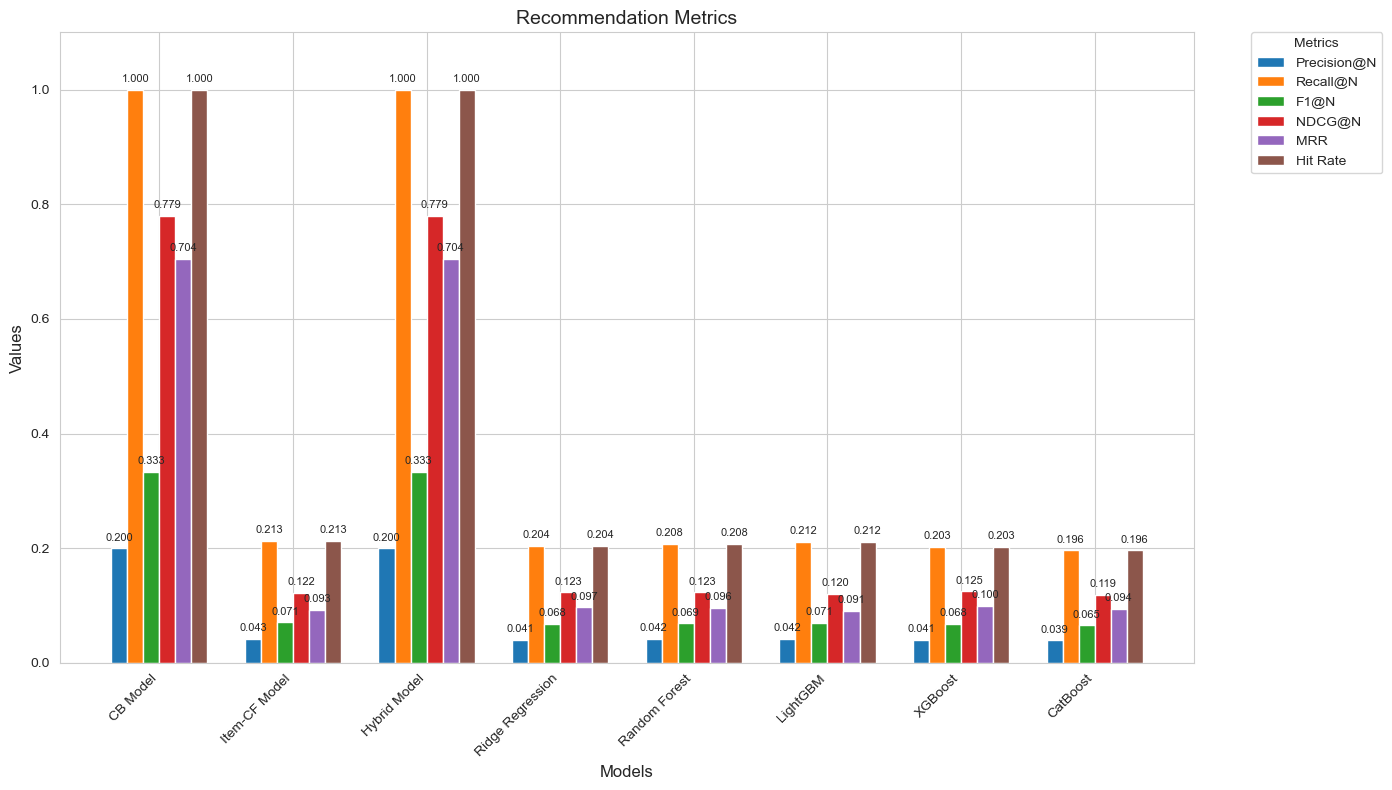

In [237]:
# Gộp dữ liệu từ cb_cf_hybrid_results và results_df
metrics = ['Precision@N', 'Recall@N', 'F1@N', 'NDCG@N', 'MRR', 'Hit Rate']
plot_data = pd.concat([cb_cf_hybrid_results[['Model'] + metrics], results_df[['Model'] + metrics]], ignore_index=True)

# Định nghĩa màu sắc cho từng độ đo
colors = {
    'Precision@N': '#1f77b4',  # Xanh dương
    'Recall@N': '#ff7f0e',     # Cam
    'F1@N': '#2ca02c',         # Xanh lá
    'NDCG@N': '#d62728',       # Đỏ
    'MRR': '#9467bd',          # Tím
    'Hit Rate': '#8c564b'      # Nâu
}

# Định nghĩa chú thích cho legend với công thức/mô tả ngắn gọn trong dấu ngoặc
labels_vn = {
    # Đo tỷ lệ item đúng trong top-N gợi ý.
    'Precision@N': 'Precision@N',
    # Đo tỷ lệ item đúng được gợi ý trong top-N trên tổng số item đúng.
    'Recall@N': 'Recall@N',
    # Trung bình điều hòa giữa Precision@N và Recall@N.
    'F1@N': 'F1@N',
    # Đánh giá chất lượng thứ tự sắp xếp các item đúng trong top-N. VD: Item đúng ở đầu danh sách sẽ được điểm cao hơn.
    'NDCG@N': 'NDCG@N',
    # Đo vị trí xuất hiện của item đúng đầu tiên. VD: Nếu item đúng đầu tiên ở vị trí 3 thì MRR = 1/3.
    'MRR': 'MRR',
    # Đo tỷ lệ có ít nhất một item đúng trong top-N gợi ý.
    'Hit Rate': 'Hit Rate'
}

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 8))

# Số mô hình và số độ đo
n_models = len(plot_data)
n_metrics = len(metrics)
bar_width = 0.12  # Độ rộng của mỗi bar
index = np.arange(n_models)  # Vị trí các mô hình trên trục x

# Vẽ bar cho từng độ đo
for i, metric in enumerate(metrics):
    bars = plt.bar(index + i * bar_width, plot_data[metric], bar_width, 
                   label=labels_vn[metric], color=colors[metric])
    
    # Hiển thị số liệu trên đầu mỗi bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, 
                 f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Thiết lập tiêu đề và nhãn
plt.xlabel('Models', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Recommendation Metrics', fontsize=14)
plt.xticks(index + bar_width * (n_metrics - 1) / 2, plot_data['Model'], rotation=45, ha='right')
plt.ylim(0, 1.1)  # Giới hạn trục y để đủ chỗ cho số liệu

# Đặt legend bên ngoài biểu đồ (bên phải)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

plt.tight_layout()
save_path = os.path.join(training_dir, 'recommendation_metrics_comparison.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


## [5.21] - Demo recommend product for user on test

In [238]:
# Demo recommendation thực tế với một số user trên test set
available_users = [uid for uid in demo_users if uid in test_df['Customer ID'].values]
if len(available_users) < len(demo_users):
    print(f"Cảnh báo: Một số user không có trong test_df: {set(demo_users) - set(available_users)}")

print("\n--- DEMO kết quả recommend (CB/CF/Hybrid + ML) trên test set ---")
for user_id in available_users:
    print(f"\nUser {user_id}:")
    gt_items = test_df[test_df['Customer ID'] == user_id]['Item'].iloc[0] if user_id in test_df['Customer ID'].values else []
    gt_items = gt_items if isinstance(gt_items, list) else [gt_items] if pd.notna(gt_items) else []
    print(f"  Đã mua: {gt_items}")
    for name, model in [('CB_Model', cb_model), ('Item-CF_Model', item_cf_model), ('Hybrid_Model', hybrid_model)] + [(name, model) for name, model in all_models.items()]:
        top_5 = get_top_5_with_scores(model, user_id, items, user_profiles, item_features, N=5)
        print(f"  {name} gợi ý Top-5:")
        for rank, (item, score) in enumerate(top_5, 1):
            print(f"    {rank}. {item:<25} | Score: {score:.4f}")



--- DEMO kết quả recommend (CB/CF/Hybrid + ML) trên test set ---

User 2574:
  Đã mua: ['T-shirt_Clothing']
  CB_Model gợi ý Top-5:
    1. Hoodie_Clothing           | Score: 0.8518
    2. Pants_Clothing            | Score: 0.8512
    3. T-shirt_Clothing          | Score: 0.8492
    4. Shirt_Clothing            | Score: 0.8398
    5. Socks_Clothing            | Score: 0.7363
  Item-CF_Model gợi ý Top-5:
    1. Backpack_Accessories      | Score: 0.0200
    2. Belt_Accessories          | Score: 0.0200
    3. Blouse_Clothing           | Score: 0.0200
    4. Boots_Footwear            | Score: 0.0200
    5. Coat_Outerwear            | Score: 0.0200
  Hybrid_Model gợi ý Top-5:
    1. Hoodie_Clothing           | Score: 0.6263
    2. Pants_Clothing            | Score: 0.6259
    3. T-shirt_Clothing          | Score: 0.6244
    4. Shirt_Clothing            | Score: 0.6178
    5. Socks_Clothing            | Score: 0.5454
  Ridge Regression gợi ý Top-5:
    1. Boots_Footwear            | Score: 0

## [5.22] - K-Fold Cross Validation

In [239]:
# K-Fold Cross-Validation chỉ cho các model ML/Ensemble
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

# all_models đã chỉ chứa ML/Ensemble (Ridge Regression, Random Forest, LightGBM, XGBoost, CatBoost)
ml_ensemble_models = all_models


In [240]:
for name, model in ml_ensemble_models.items():
    precision_scores, recall_scores, f1_scores, ndcg_scores = [], [], [], []
    mrr_scores, hit_rate_scores = [], []
    rmse_scores, mae_scores, r2_scores, adjusted_r2_scores, mape_scores, explained_variance_scores = [], [], [], [], [], []

    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        val_df = test_df.iloc[val_idx] if len(test_df) == len(X_train) else train_df.iloc[val_idx]  # Đồng bộ với test_df hoặc train_df

        # Fit model ML/ensemble
        model.fit(X_tr, y_tr)
        # Đánh giá trên validation fold
        metrics = evaluate_ranking_vectorized(model, val_df, items, category_cols, X_val, y_val)

        precision_scores.append(metrics.get('Precision@N', 0))
        recall_scores.append(metrics.get('Recall@N', 0))
        f1_scores.append(metrics.get('F1@N', 0))
        ndcg_scores.append(metrics.get('NDCG@N', 0))
        mrr_scores.append(metrics.get('MRR', 0))
        hit_rate_scores.append(metrics.get('Hit Rate', 0))
        rmse_scores.append(metrics.get('RMSE', np.nan))
        mae_scores.append(metrics.get('MAE', np.nan))
        r2_scores.append(metrics.get('R² Score', np.nan))
        adjusted_r2_scores.append(metrics.get('Adjusted R²', np.nan))
        mape_scores.append(metrics.get('MAPE (%)', np.nan))
        explained_variance_scores.append(metrics.get('Explained Variance', np.nan))

    # Tổng hợp metric cho model này
    cv_results.append({
        'Model': name,
        'Precision@N Mean': np.mean(precision_scores),
        'Precision@N Std': np.std(precision_scores),
        'Recall@N Mean': np.mean(recall_scores),
        'Recall@N Std': np.std(recall_scores),
        'F1@N Mean': np.mean(f1_scores),
        'F1@N Std': np.std(f1_scores),
        'NDCG@N Mean': np.mean(ndcg_scores),
        'NDCG@N Std': np.std(ndcg_scores),
        'MRR Mean': np.mean(mrr_scores),
        'MRR Std': np.std(mrr_scores),
        'Hit Rate Mean': np.mean(hit_rate_scores),
        'Hit Rate Std': np.std(hit_rate_scores),
        'RMSE Mean': np.nanmean(rmse_scores),
        'RMSE Std': np.nanstd(rmse_scores),
        'MAE Mean': np.nanmean(mae_scores),
        'MAE Std': np.nanstd(mae_scores),
        'R² Score Mean': np.nanmean(r2_scores),
        'R² Score Std': np.nanstd(r2_scores),
        'Adjusted R² Mean': np.nanmean(adjusted_r2_scores),
        'Adjusted R² Std': np.nanstd(adjusted_r2_scores),
        'MAPE (%) Mean': np.nanmean(mape_scores),
        'MAPE (%) Std': np.nanstd(mape_scores),
        'Explained Variance Mean': np.nanmean(explained_variance_scores),
        'Explained Variance Std': np.nanstd(explained_variance_scores)
    })


In [241]:
cv_results_df = pd.DataFrame(cv_results)
print('\nK-Fold Cross-Validation Results (ML/Ensemble Only):')
display(cv_results_df.head())
    


K-Fold Cross-Validation Results (ML/Ensemble Only):


Model  Precision@N Mean  Precision@N Std  Recall@N Mean  \
0  Ridge Regression          0.039231         0.002569       0.196154   
1     Random Forest          0.043782         0.003497       0.218910   
2          LightGBM          0.040513         0.002821       0.202564   
3           XGBoost          0.043269         0.004886       0.216346   
4          CatBoost          0.043590         0.003883       0.217949   

   Recall@N Std  F1@N Mean  F1@N Std  NDCG@N Mean  NDCG@N Std  MRR Mean  \
0      0.012845   0.065385  0.004282     0.113396    0.010575  0.086576   
1      0.017485   0.072970  0.005828     0.132294    0.014492  0.104092   
2      0.014103   0.067521  0.004701     0.119683    0.009581  0.092804   
3      0.024431   0.072115  0.008144     0.124233    0.015035  0.094370   
4      0.019417   0.072650  0.006472     0.130632    0.010501  0.102249   

    MRR Std  Hit Rate Mean  Hit Rate Std  RMSE Mean  RMSE Std  MAE Mean  \
0  0.009934       0.196154      0.012845   0.220821  0.003609  0.185777   
1  0.013438       0.218910      0.017485   0.228031  0.003432  0.190858   
2  0.008261       0.202564      0.014103   0.230875  0.004209  0.192368   
3  0.012152       0.216346      0.024431   0.248992  0.003779  0.204157   
4  0.008285       0.217949      0.019417   0.232939  0.003381  0.193784   

    MAE Std  R² Score Mean  R² Score Std  Adjusted R² Mean  Adjusted R² Std  \
0  0.003295      -0.009209      0.004941         -0.056701         0.005174   
1  0.002580      -0.076312      0.013828         -0.126962         0.014479   
2  0.003314      -0.103365      0.023063         -0.155288         0.024149   
3  0.002061      -0.283790      0.040399         -0.344204         0.042300   
4  0.002879      -0.123125      0.011676         -0.175978         0.012226   

   MAPE (%) Mean  MAPE (%) Std  Explained Variance Mean  \
0      68.334806      4.939294                -0.007693   
1      68.885631      4.587286                -0.075427   
2      69.830947      5.331764                -0.102345   
3      72.174409      5.333780                -0.282760   
4      69.705729      5.121487                -0.122027   

   Explained Variance Std  
0                0.005155  
1                0.014666  
2                0.024131  
3                0.040847  
4                0.012083

## [5.23] - Visualize K-Fold Result

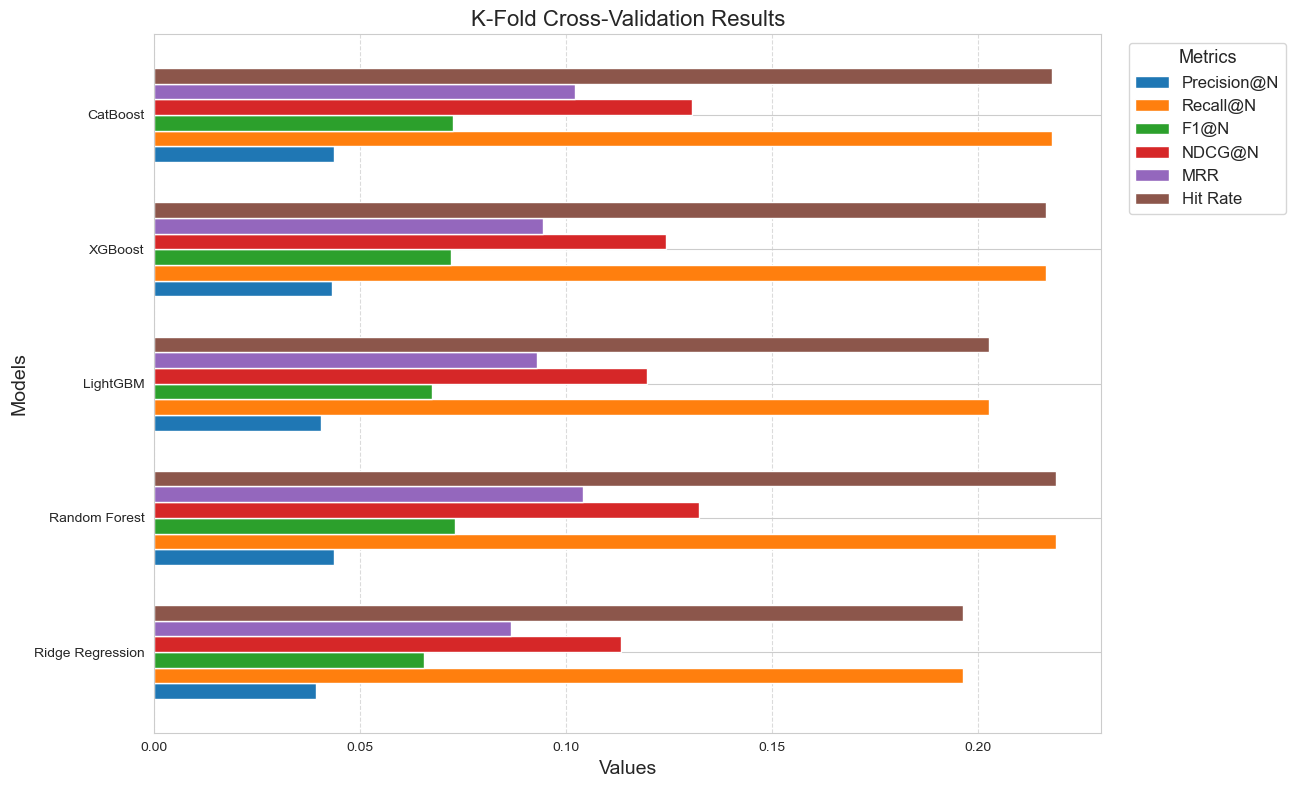

In [ ]:
def visualize_kfold_results(cv_results_df):
    # Định nghĩa mapping cho các metric mean với công thức ngắn gọn
    metric_labels_kfold = {
        # Đo tỷ lệ item đúng trong top-N gợi ý.
        'Precision@N Mean': 'Precision@N',
        # Đo tỷ lệ item đúng được gợi ý trong top-N trên tổng số item đúng.
        'Recall@N Mean': 'Recall@N',
        # Trung bình điều hòa giữa Precision@N và Recall@N.
        'F1@N Mean': 'F1@N',
        # Đánh giá chất lượng thứ tự sắp xếp các item đúng trong top-N. VD: Item đúng ở đầu danh sách sẽ được điểm cao hơn.
        'NDCG@N Mean': 'NDCG@N',
        # Đo vị trí xuất hiện của item đúng đầu tiên. VD: Nếu item đúng đầu tiên ở vị trí 3 thì MRR = 1/3.
        'MRR Mean': 'MRR',
        # Đo tỷ lệ có ít nhất một item đúng trong top-N gợi ý.
        'Hit Rate Mean': 'Hit Rate'
    }
    
    # Chỉ lấy những metric có trong df
    metrics = [m for m in metric_labels_kfold.keys() if m in cv_results_df.columns]
    plot_models = cv_results_df.set_index('Model')

    # Lấy tên mới cho legend
    new_labels = [metric_labels_kfold.get(m, m) for m in metrics]

    fig, ax = plt.subplots(figsize=(16, 8))
    # Plot với errorbar
    bars = plot_models[metrics].plot(
        kind='barh',
        yerr=plot_models[[m.replace('Mean', 'Std') for m in metrics]],
        ax=ax,
        width=0.7,
        legend=False
    )
    ax.set_title('Recommendation Metrics (K-Fold CV)', fontsize=18)
    ax.set_xlabel('Values', fontsize=14)
    ax.set_ylabel('Models', fontsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    handles, labels_ = bars.get_legend_handles_labels()
    ax.legend(
        handles, new_labels,
        title='Metrics',
        bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12, title_fontsize=13, frameon=True
    )
    plt.tight_layout(rect=[0, 0, 0.82, 1])
    save_path = os.path.join(training_dir, 'K_Fold_result.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

visualize_kfold_results(cv_results_df)


## [5.25] - Fine-tuning models

In [243]:
param_grids = {
    'Ridge Regression': {
        'alpha': [0.01, 0.1, 1.0, 10.0]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 7, -1],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 100]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}


### Demo recommendation cho các model sau tuning

In [244]:
def get_top_5_with_scores(model, user_id, items, user_profiles, item_features, N=5):
    # Hàm này giữ nguyên như phrase 2
    if model.__class__.__name__ in ['CBModel', 'ItemCFModel', 'HybridModel']:
        scores = model.predict(user_id, items)
        item_scores = list(zip(items, scores))
        top_5 = sorted(item_scores, key=lambda x: x[1], reverse=True)[:N]
        return [(item, score) for item, score in top_5]
    else:
        rec_items, rec_scores = recommend_ml_top_n(model, user_id, items, user_profiles, item_features, N)
        return list(zip(rec_items, rec_scores))


### Optuna tuning cho từng model

In [245]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

def optuna_objective_factory(name, model, X, y, param_grid):
    def objective(trial):
        params = {}
        for param, values in param_grid.items():
            params[param] = trial.suggest_categorical(param, values)
        # Always create a new model instance (fix CatBoostError)
        if name == "CatBoost":
            _model = CatBoostRegressor(verbose=0, random_state=42, **params)
        elif name == "LightGBM":
            _model = LGBMRegressor(random_state=42, verbose=-1, **params)
        elif name == "XGBoost":
            _model = XGBRegressor(random_state=42, verbosity=0, **params)
        elif name == "Random Forest":
            _model = RandomForestRegressor(random_state=45, **params)
        elif name == "Ridge Regression":
            _model = Ridge(**params)
        else:
            _model = model.__class__(**params)
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(
            _model, X, y, cv=3, scoring='neg_mean_squared_error', n_jobs=-1
        )
        return scores.mean()
    return objective


### Tuning Result

In [246]:
tuned_results = []
tuned_models = {}

for name, model in all_models.items():
    print(f"\n--- Tuning model: {name} (Optuna) ---")
    param_grid = param_grids.get(name, {})
    if param_grid:
        study = optuna.create_study(direction='maximize')
        study.optimize(
            optuna_objective_factory(name, model, X_train, y_train, param_grid),
            n_trials=30,
            show_progress_bar=True
        )
        best_params = study.best_params
        # Always fit a new instance for the best params (no set_params)
        if name == "CatBoost":
            tuned_model = CatBoostRegressor(verbose=0, random_state=42, **best_params)
        elif name == "LightGBM":
            tuned_model = LGBMRegressor(random_state=42, verbose=-1, **best_params)
        elif name == "XGBoost":
            tuned_model = XGBRegressor(random_state=42, verbosity=0, **best_params)
        elif name == "Random Forest":
            tuned_model = RandomForestRegressor(random_state=45, **best_params)
        elif name == "Ridge Regression":
            tuned_model = Ridge(**best_params)
        else:
            tuned_model = model.__class__(**best_params)
        tuned_model.fit(X_train, y_train)
    else:
        tuned_model = model
        tuned_model.fit(X_train, y_train)
        best_params = {}

    tuned_models[f'Tuned {name}'] = tuned_model

    ranking_metrics = evaluate_ranking_vectorized(
        tuned_model, test_df, items, category_cols, X_test, y_test
    )
    coverage = evaluate_coverage(
        tuned_model, test_df, items, N=5, user_profiles=user_profiles, item_features=item_features, model_type="ml", ml_model=tuned_model
    )
    tuned_results.append({
        'Model': f'Tuned {name}',
        **ranking_metrics,
        'Coverage': coverage,
        'Best Params': best_params
    })

tuned_results_df = pd.DataFrame(tuned_results)
print("\n### Kết quả sau tuning (Optuna):")
display(tuned_results_df)



--- Tuning model: Ridge Regression (Optuna) ---


  0%|          | 0/30 [00:00<?, ?it/s]


--- Tuning model: Random Forest (Optuna) ---


  0%|          | 0/30 [00:00<?, ?it/s]


--- Tuning model: LightGBM (Optuna) ---


  0%|          | 0/30 [00:00<?, ?it/s]


--- Tuning model: XGBoost (Optuna) ---


  0%|          | 0/30 [00:00<?, ?it/s]


--- Tuning model: CatBoost (Optuna) ---


  0%|          | 0/30 [00:00<?, ?it/s]


### Kết quả sau tuning (Optuna):


Model  Precision@N  Recall@N      F1@N    NDCG@N  \
0  Tuned Ridge Regression     0.039744  0.198718  0.066239  0.119504   
1     Tuned Random Forest     0.040000  0.200000  0.066667  0.117262   
2          Tuned LightGBM     0.042051  0.210256  0.070085  0.123750   
3           Tuned XGBoost     0.041282  0.206410  0.068803  0.123079   
4          Tuned CatBoost     0.041282  0.206410  0.068803  0.119561   

        MRR  Hit Rate      RMSE       MAE  R² Score  Adjusted R²   MAPE (%)  \
0  0.093953  0.198718  0.228576  0.193386  0.002410    -0.034783  73.096684   
1  0.090513  0.200000  0.229372  0.193998 -0.004553    -0.042006  73.289738   
2  0.095876  0.210256  0.228815  0.193685  0.000327    -0.036945  73.152959   
3  0.096090  0.206410  0.229099  0.193855 -0.002159    -0.039523  73.243597   
4  0.091432  0.206410  0.229065  0.193902 -0.001863    -0.039216  73.270690   

   Explained Variance  Coverage  \
0            0.003676      0.20   
1           -0.003420      0.88   
2            0.001469      0.84   
3           -0.000913      0.88   
4           -0.000656      0.80   

                                         Best Params  
0                                    {'alpha': 10.0}  
1  {'n_estimators': 300, 'max_depth': 3, 'min_sam...  
2  {'n_estimators': 50, 'max_depth': 3, 'learning...  
3  {'n_estimators': 100, 'max_depth': 3, 'learnin...  
4  {'iterations': 100, 'depth': 3, 'learning_rate...

### Comparasion models after tuning

In [247]:
cb_cf_hybrid_results['Best Params'] = [{} for _ in range(cb_cf_hybrid_results.shape[0])]
tuned_comparison_df = pd.concat([tuned_results_df, cb_cf_hybrid_results], ignore_index=True)

desired_order = [
    'Model', 'Precision@N', 'Recall@N', 'F1@N', 'NDCG@N', 'MRR', 'Hit Rate', 'Coverage'
]
tuned_comparison_df = tuned_comparison_df.reindex(columns=desired_order)

print('\n=== So sánh metrics giữa CB/CF/Hybrid và các model ML SAU tuning:')
display(tuned_comparison_df)



=== So sánh metrics giữa CB/CF/Hybrid và các model ML SAU tuning:


Model  Precision@N  Recall@N      F1@N    NDCG@N  \
0  Tuned Ridge Regression     0.039744  0.198718  0.066239  0.119504   
1     Tuned Random Forest     0.040000  0.200000  0.066667  0.117262   
2          Tuned LightGBM     0.042051  0.210256  0.070085  0.123750   
3           Tuned XGBoost     0.041282  0.206410  0.068803  0.123079   
4          Tuned CatBoost     0.041282  0.206410  0.068803  0.119561   
5                CB Model     0.200000  1.000000  0.333333  0.779363   
6           Item-CF Model     0.042564  0.212821  0.070940  0.122095   
7            Hybrid Model     0.200000  1.000000  0.333333  0.779363   

        MRR  Hit Rate  Coverage  
0  0.093953  0.198718      0.20  
1  0.090513  0.200000      0.88  
2  0.095876  0.210256      0.84  
3  0.096090  0.206410      0.88  
4  0.091432  0.206410      0.80  
5  0.704380  1.000000      1.00  
6  0.092564  0.212821      0.20  
7  0.704380  1.000000      0.00

### Visualize result after tuning


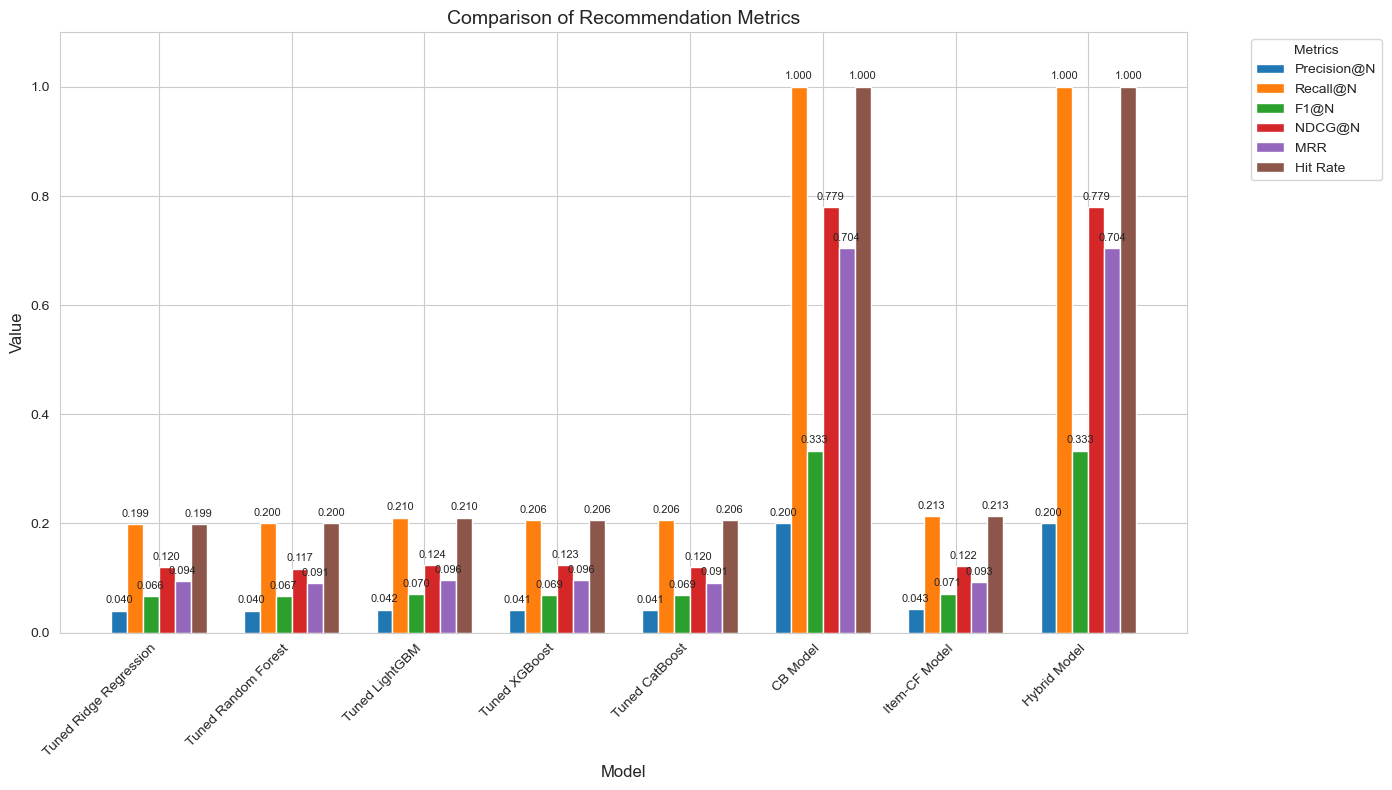

In [248]:
def visualize_tuned_results(tuned_comparison_df):
    # Các metric cần vẽ
    metrics = ['Precision@N', 'Recall@N', 'F1@N', 'NDCG@N', 'MRR', 'Hit Rate']
    # Lấy chỉ các metrics có trong DataFrame
    metrics = [m for m in metrics if m in tuned_comparison_df.columns]

    # Chuyển DataFrame về dạng dễ vẽ
    plot_data = tuned_comparison_df[['Model'] + metrics].copy()
    n_models = len(plot_data)
    n_metrics = len(metrics)

    # Thiết lập màu cho từng metric
    colors = {
        'Precision@N': '#1f77b4',
        'Recall@N':    '#ff7f0e',
        'F1@N':        '#2ca02c',
        'NDCG@N':      '#d62728',
        'MRR':         '#9467bd',
        'Hit Rate':    '#8c564b',
    }

    bar_width = 0.12
    index = np.arange(n_models)

    plt.figure(figsize=(14, 8))
    for i, metric in enumerate(metrics):
        values = plot_data[metric]
        bars = plt.bar(
            index + i * bar_width,
            values,
            bar_width,
            label=metric,
            color=colors.get(metric, '#333333')
        )
        # Ghi giá trị lên bar
        for bar in bars:
            h = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                h + 0.01,
                f'{h:.3f}',
                ha='center',
                va='bottom',
                fontsize=8
            )

    # Nhãn và tiêu đề
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.title('Comparison of Recommendation Metrics', fontsize=14)
    plt.xticks(
        index + bar_width * (n_metrics - 1) / 2,
        plot_data['Model'],
        rotation=45,
        ha='right'
    )
    plt.ylim(0, 1.1)
    plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    save_path = os.path.join(training_dir, 'Metric_models_after_fine-tuning.png')
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    
    plt.show()

visualize_tuned_results(tuned_comparison_df)


## Demo Recommned product for user after tuning

In [249]:
# Demo với các user mẫu
print("\n--- DEMO kết quả recommend (sau fine-tune Optuna) trên test set ---")
for user_id in demo_users:
    print(f"\nUser: {user_id}")
    for name, model in [('CB Model', cb_model), ('Item-CF Model', item_cf_model), ('Hybrid Model', hybrid_model)]:
        top5 = get_top_5_with_scores(model, user_id, items, user_profiles, item_features, N=5)
        print(f"{name} Top-5:")
        for rank, (item, score) in enumerate(top5, 1):
            print(f"    {rank}. {item:<25} | Score: {score:.4f}")
            
    for model_name, tuned_model in tuned_models.items():
        top5 = get_top_5_with_scores(tuned_model, user_id, items, user_profiles, item_features, N=5)
        print(f"{model_name} Top-5:")
        for rank, (item, score) in enumerate(top5, 1):
            print(f"    {rank}. {item:<25} | Score: {score:.4f}")



--- DEMO kết quả recommend (sau fine-tune Optuna) trên test set ---

User: 2574
CB Model Top-5:
    1. Hoodie_Clothing           | Score: 0.8518
    2. Pants_Clothing            | Score: 0.8512
    3. T-shirt_Clothing          | Score: 0.8492
    4. Shirt_Clothing            | Score: 0.8398
    5. Socks_Clothing            | Score: 0.7363
Item-CF Model Top-5:
    1. Backpack_Accessories      | Score: 0.0200
    2. Belt_Accessories          | Score: 0.0200
    3. Blouse_Clothing           | Score: 0.0200
    4. Boots_Footwear            | Score: 0.0200
    5. Coat_Outerwear            | Score: 0.0200
Hybrid Model Top-5:
    1. Hoodie_Clothing           | Score: 0.6263
    2. Pants_Clothing            | Score: 0.6259
    3. T-shirt_Clothing          | Score: 0.6244
    4. Shirt_Clothing            | Score: 0.6178
    5. Socks_Clothing            | Score: 0.5454
Tuned Ridge Regression Top-5:
    1. Boots_Footwear            | Score: 0.5090
    2. Skirt_Clothing            | Score: 0.5012